Exploratory Data Analysis <br><br>
**Arya.AI : Assignment - Data Scientist** <br>

**Submitted By:** <br> <br>
Amar Kumar

This is the script #1 for Exploratory Data Analysis.

**Task:**<br>
Binary Classification - Do an exploratory analysis of the dataset provided, decide on feature selection, preprocessing before training a model to classify as class ‘0’ or class ‘1’.

## Import Libraries and Load the Dataset

In [39]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics

%config InlineBackend.figure_formats = {'png', 'retina'}
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', True)
np.set_printoptions(precision=4, suppress=True)

In [40]:
# Load the dataset
df = pd.read_csv("training_set.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [41]:
# Check the shape of the data
df.shape

(3910, 58)

In [42]:
# Display the first five rows of the dataset
df.head(2)

X1    X2    X3   X4    X5    X6    X7   X8   X9   X10  X11   X12  X13  X14  X15  X16  X17   X18   X19  X20   X21  X22  X23  X24  X25  X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44   X45  X46  X47  X48  X49    X50  X51    X52  X53    X54     X55  X56  X57  Y
0  0.0  0.00  4.34  0.0  0.00  0.00  0.00  0.0  0.0  0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.00  0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.000  0.0  1.342  0.0  0.000   1.200    2   12  0
1  0.0  0.56  0.56  0.0  1.12  0.56  2.25  0.0  0.0  0.56  0.0  0.56  0.0  0.0  0.0  0.0  0.0  0.56  3.38  0.0  1.12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.56  0.0  0.0  0.0  0.0  0.083  0.0  0.503  0.0  0.083  16.304  148  375  1

In [43]:
df.describe().T

count        mean         std  min       25%      50%        75%        max
X1   3910.0    0.102990    0.296322  0.0   0.00000   0.0000    0.00000      4.340
X2   3910.0    0.206419    1.253828  0.0   0.00000   0.0000    0.00000     14.280
X3   3910.0    0.284419    0.504352  0.0   0.00000   0.0000    0.43000      4.540
X4   3910.0    0.062074    1.369361  0.0   0.00000   0.0000    0.00000     42.810
X5   3910.0    0.311309    0.656195  0.0   0.00000   0.0000    0.38750      9.090
X6   3910.0    0.095974    0.261455  0.0   0.00000   0.0000    0.00000      3.570
X7   3910.0    0.112320    0.389516  0.0   0.00000   0.0000    0.00000      7.270
X8   3910.0    0.106041    0.398694  0.0   0.00000   0.0000    0.00000     11.110
X9   3910.0    0.091146    0.271417  0.0   0.00000   0.0000    0.00000      3.230
X10  3910.0    0.244345    0.667065  0.0   0.00000   0.0000    0.17000     18.180
X11  3910.0    0.060808    0.203018  0.0   0.00000   0.0000    0.00000      2.610
X12  3910.0    0.553685    0.876412  0.0   0.00000   0.1400    0.82000      9.670
X13  3910.0    0.094113    0.303433  0.0   0.00000   0.0000    0.00000      5.550
X14  3910.0    0.057205    0.307892  0.0   0.00000   0.0000    0.00000      5.550
X15  3910.0    0.048545    0.255293  0.0   0.00000   0.0000    0.00000      4.410
X16  3910.0    0.246598    0.799327  0.0   0.00000   0.0000    0.11000     20.000
X17  3910.0    0.142780    0.444164  0.0   0.00000   0.0000    0.00000      7.140
X18  3910.0    0.185514    0.526497  0.0   0.00000   0.0000    0.00000      7.690
X19  3910.0    1.660939    1.760214  0.0   0.00000   1.3100    2.63750     18.750
X20  3910.0    0.083880    0.439199  0.0   0.00000   0.0000    0.00000      6.320
X21  3910.0    0.818253    1.210078  0.0   0.00000   0.2350    1.27000     11.110
X22  3910.0    0.112113    0.990195  0.0   0.00000   0.0000    0.00000     17.100
X23  3910.0    0.101343    0.345887  0.0   0.00000   0.0000    0.00000      5.450
X24  3910.0    0.095199    0.443482  0.0   0.00000   0.0000    0.00000     12.500
X25  3910.0    0.565790    1.733593  0.0   0.00000   0.0000    0.00000     20.830
X26  3910.0    0.266668    0.892676  0.0   0.00000   0.0000    0.00000     16.660
X27  3910.0    0.757120    3.321562  0.0   0.00000   0.0000    0.00000     33.330
X28  3910.0    0.125312    0.545827  0.0   0.00000   0.0000    0.00000      9.090
X29  3910.0    0.100320    0.608313  0.0   0.00000   0.0000    0.00000     14.280
X30  3910.0    0.105274    0.464483  0.0   0.00000   0.0000    0.00000      5.880
X31  3910.0    0.065859    0.409316  0.0   0.00000   0.0000    0.00000     12.500
X32  3910.0    0.046563    0.321900  0.0   0.00000   0.0000    0.00000      4.760
X33  3910.0    0.094281    0.538145  0.0   0.00000   0.0000    0.00000     18.180
X34  3910.0    0.047409    0.322958  0.0   0.00000   0.0000    0.00000      4.760
X35  3910.0    0.108414    0.551546  0.0   0.00000   0.0000    0.00000     20.000
X36  3910.0    0.094258    0.395220  0.0   0.00000   0.0000    0.00000      7.690
X37  3910.0    0.134980    0.409085  0.0   0.00000   0.0000    0.00000      5.050
X38  3910.0    0.013463    0.215280  0.0   0.00000   0.0000    0.00000      8.330
X39  3910.0    0.080286    0.423936  0.0   0.00000   0.0000    0.00000     11.110
X40  3910.0    0.065077    0.346739  0.0   0.00000   0.0000    0.00000      4.760
X41  3910.0    0.044959    0.375329  0.0   0.00000   0.0000    0.00000      7.140
X42  3910.0    0.139182    0.800478  0.0   0.00000   0.0000    0.00000     14.280
X43  3910.0    0.047609    0.231074  0.0   0.00000   0.0000    0.00000      3.570
X44  3910.0    0.081987    0.652636  0.0   0.00000   0.0000    0.00000     20.000
X45  3910.0    0.313151    1.063868  0.0   0.00000   0.0000    0.12000     21.420
X46  3910.0    0.182662    0.944817  0.0   0.00000   0.0000    0.00000     22.050
X47  3910.0    0.006054    0.081662  0.0   0.00000   0.0000    0.00000      2.170
X48  3910.0    0.033281    0.301611  0.0   0.00000   0.0000    0.00000

## Split the Dataset - Training + Validation

In [44]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)

# Check the distribution of missing values
print((train.isnull().sum())[(train.isnull().sum()) >0].sort_values(ascending=False))
print((train.isnull().sum()/train.shape[0])[(train.isnull().sum()) >0].sort_values(ascending=False))

(3128, 58)
(782, 58)
Series([], dtype: int64)
Series([], dtype: float64)


## Exploratory Data Analysis

### Distribution of the target variable

In [45]:
# Distribution of the target variable
train.Y.value_counts()

0    1903
1    1225
Name: Y, dtype: int64

### Analysis of missing value

In [46]:
# Check the percentage of missing value of each column
(train.isnull().sum())*100 / len(df)

X1     0.0
X2     0.0
X3     0.0
X4     0.0
X5     0.0
X6     0.0
X7     0.0
X8     0.0
X9     0.0
X10    0.0
X11    0.0
X12    0.0
X13    0.0
X14    0.0
X15    0.0
X16    0.0
X17    0.0
X18    0.0
X19    0.0
X20    0.0
X21    0.0
X22    0.0
X23    0.0
X24    0.0
X25    0.0
X26    0.0
X27    0.0
X28    0.0
X29    0.0
X30    0.0
X31    0.0
X32    0.0
X33    0.0
X34    0.0
X35    0.0
X36    0.0
X37    0.0
X38    0.0
X39    0.0
X40    0.0
X41    0.0
X42    0.0
X43    0.0
X44    0.0
X45    0.0
X46    0.0
X47    0.0
X48    0.0
X49    0.0
X50    0.0
X51    0.0
X52    0.0
X53    0.0
X54    0.0
X55    0.0
X56    0.0
X57    0.0
Y      0.0
dtype: float64

### Analysis of columns with little information for prediction

In [47]:
# Now some variables contain a large number of 0s.
# Check the percentage of non-0s in each column
percent_of_non0 = df.astype(bool).sum(axis=0)/len(df)*100
print(percent_of_non0)

X1      22.838875
X2      19.539642
X3      41.457801
X4       0.997442
X5      38.260870
X6      21.994885
X7      17.493606
X8      18.286445
X9      16.956522
X10     28.286445
X11     15.549872
X12     51.023018
X13     18.593350
X14      7.851662
X15      7.212276
X16     27.135550
X17     21.074169
X18     22.608696
X19     70.537084
X20      9.309463
X21     52.736573
X22      2.276215
X23     14.833760
X24     16.112532
X25     23.836317
X26     17.698210
X27     17.186701
X28      9.974425
X29      8.056266
X30     10.204604
X31      6.368286
X32      4.501279
X33      8.823529
X34      4.705882
X35     10.588235
X36     12.736573
X37     17.902813
X38      1.892583
X39      8.593350
X40      9.897698
X41      3.222506
X42      7.442455
X43      8.158568
X44      7.263427
X45     28.542199
X46     10.920716
X47      1.432225
X48      4.398977
X49     17.161125
X50     59.335038
X51     11.687980
X52     48.874680
X53     30.613811
X54     16.445013
X55    100.000000
X56    100

In [48]:
# Drop columns with less than 5% of non-zero values because they contain little information
less_5_non0 = []
for i in train.columns:
    if percent_of_non0[i] < 5:
        less_5_non0.append(i)
print(less_5_non0)
train = train.drop(less_5_non0, axis=1)

['X4', 'X22', 'X32', 'X34', 'X38', 'X41', 'X47', 'X48']


In [49]:
# Drop columns that has only one unique value
columns_with_1_nunique = []
for i in df.columns:
    if df[i].nunique()==1:
        columns_with_1_nunique.append(i)

print(columns_with_1_nunique)

[]


### Analysis of multi-collinearity

Text(0.5, 1, 'Multicollinearity')

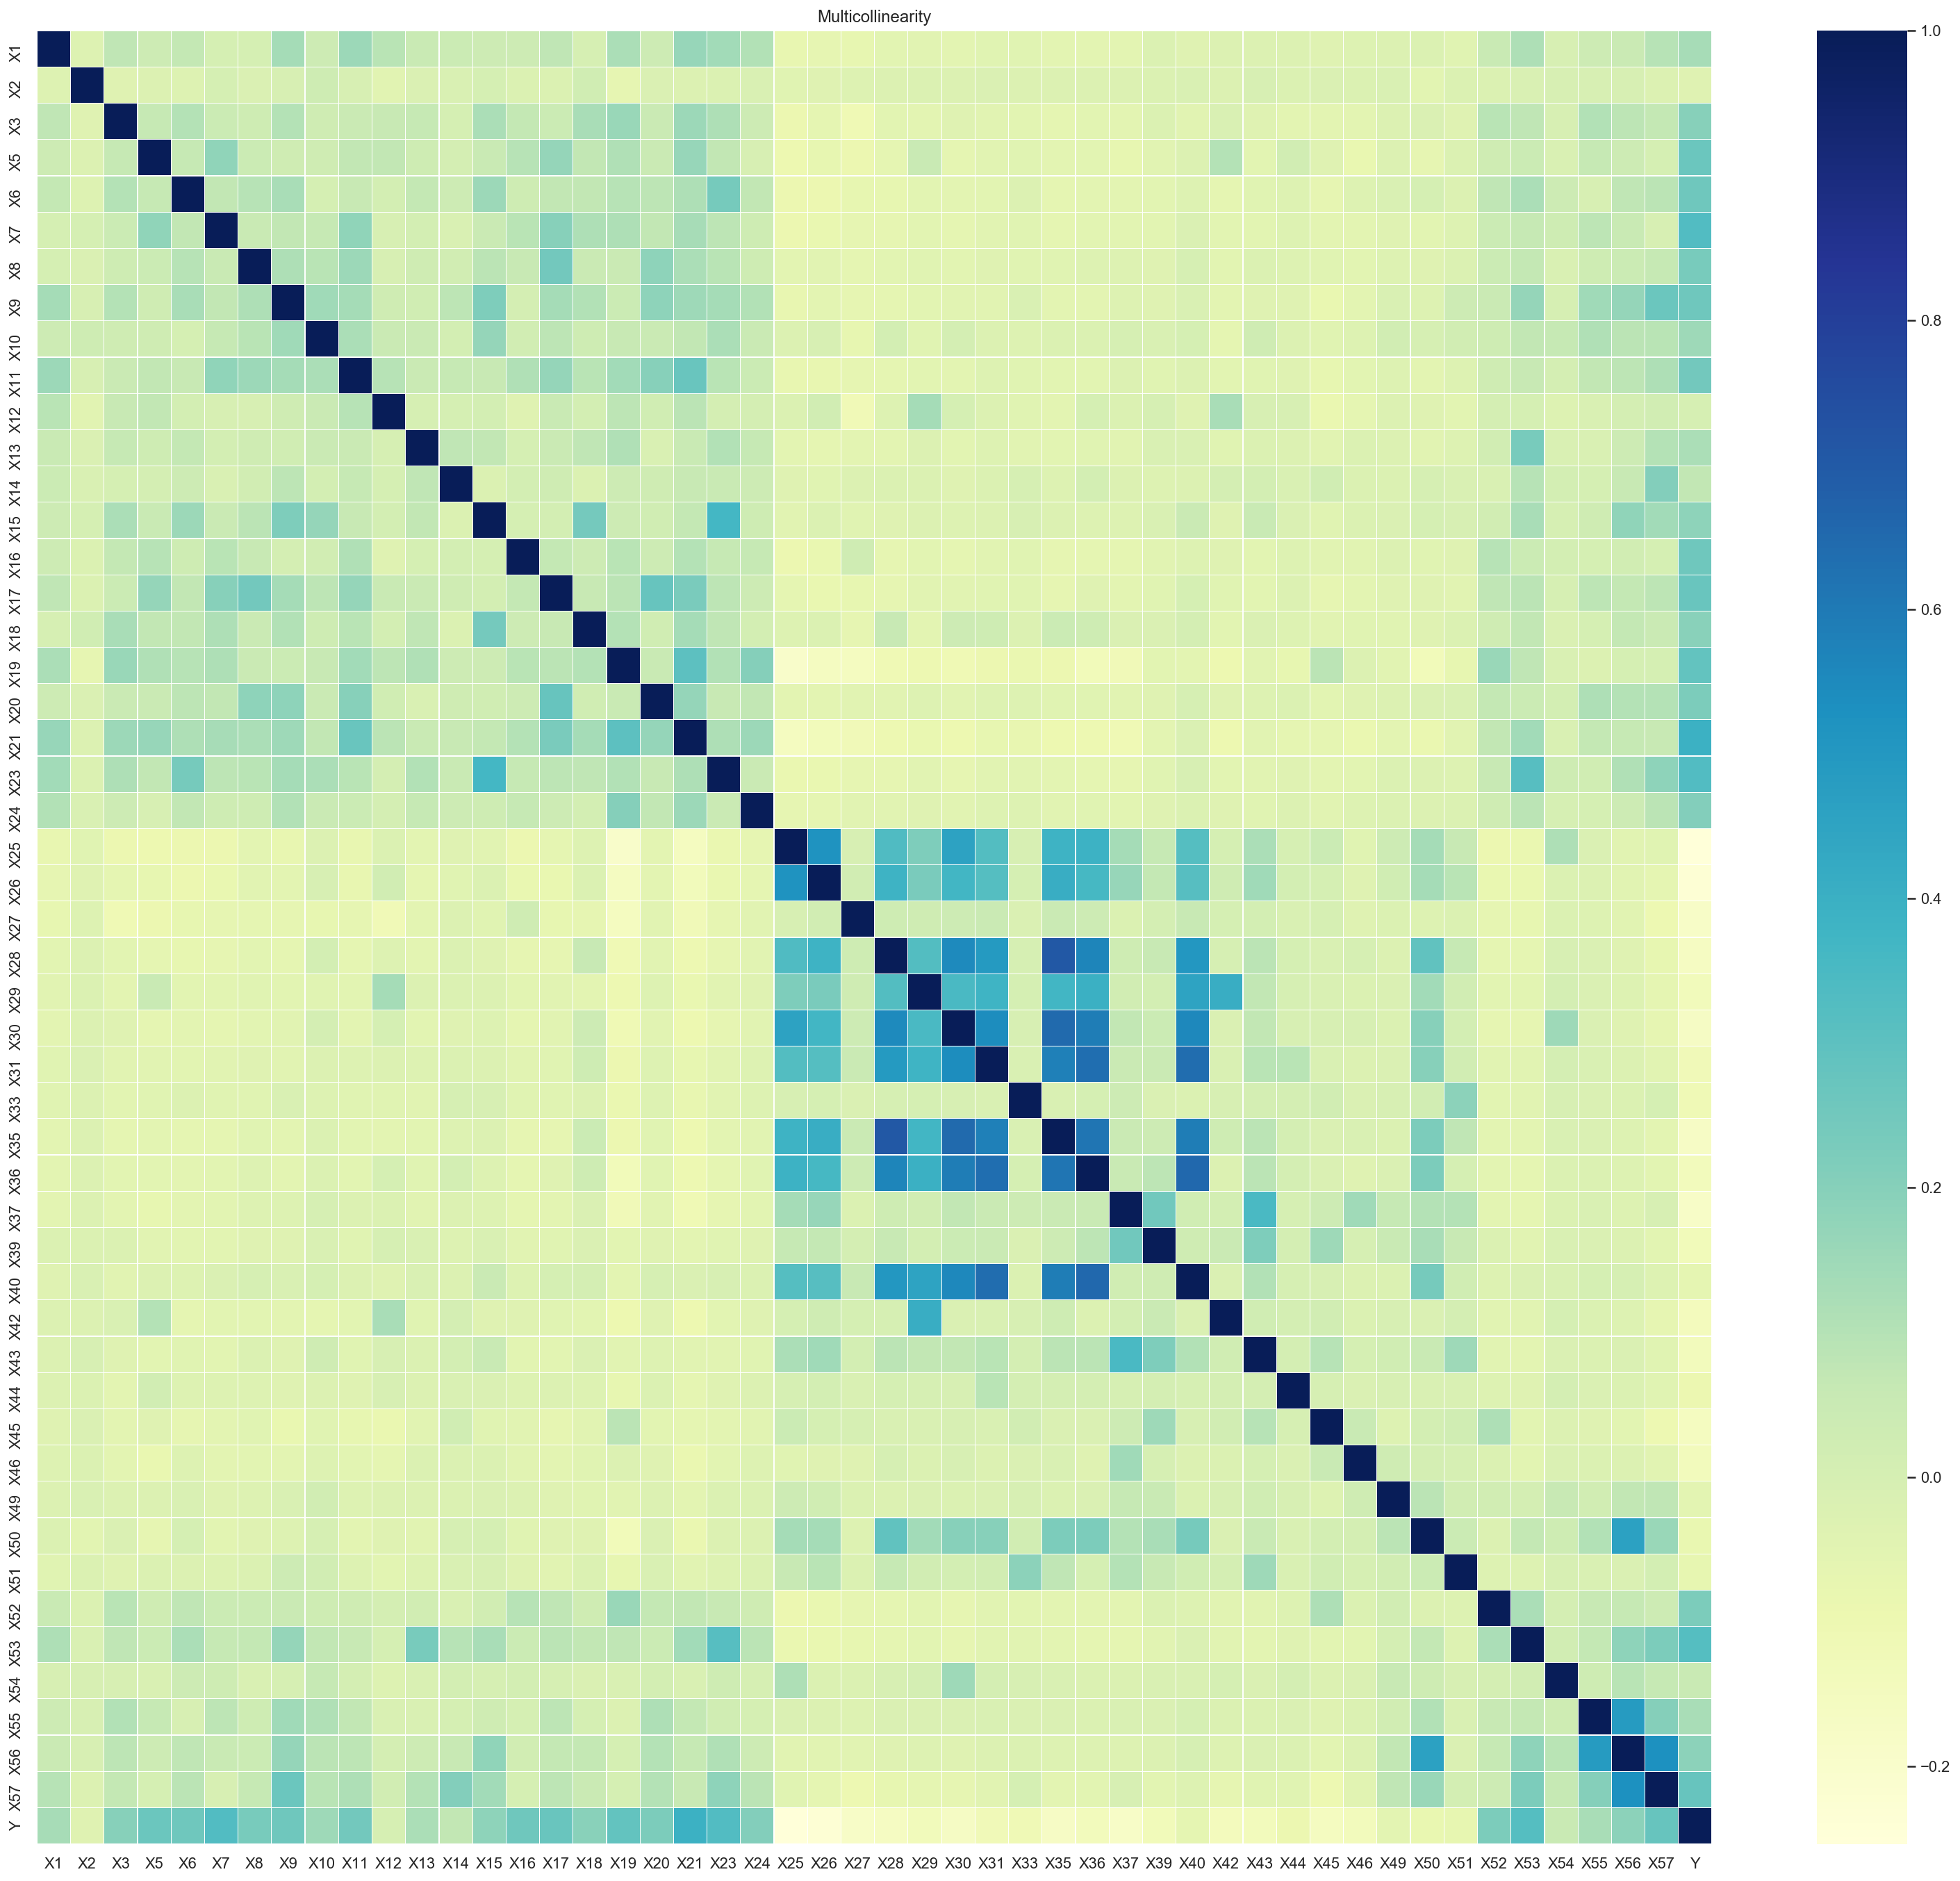

In [50]:
var_sel= list(train.nunique().index[train.nunique() > 1])


# Create correlation matrix
corrmat = train[var_sel].corr()

# Select upper triangle of correlation matrix
upper = corrmat.abs().where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
f, ax = plt.subplots(figsize =(27, 24)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
plt.title('Multicollinearity')
# plt.savefig("multi-cllinearity.png")

In [51]:
# Drop the variable having r-value with any other predictor more than 0.75 
multicol_to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(multicol_to_drop)

# Remove unwanted features
train.drop(multicol_to_drop ,axis=1, inplace=True)

[]


### Outliers Detection 

We will utilize PyOD package and PCA technique to calculate the outlier scores as the sum of the projected distance of a sample on all eigen vectors. The 99 quantile cutoff of the outlier score has been taken.

In [52]:
# Implementing PyOD for outlier detecton
from pyod.utils.data import generate_data, get_outliers_inliers
from pyod.models.pca import PCA
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from scipy import stats
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

train_od=scale.fit_transform(train)
clf = PCA()
clf.fit(train)
od_train_pred = clf.labels_
od_train_scores = clf.decision_scores_
outliers=list(train[od_train_scores > np.quantile(od_train_scores, 0.99)].index)
print(outliers, len(outliers))
stats.describe(od_train_scores)

[3546, 3469, 2974, 370, 195, 1850, 2295, 2481, 3745, 1656, 2743, 3412, 3674, 2183, 308, 213, 3489, 2643, 2400, 3614, 2190, 1855, 3744, 1673, 3482, 1428, 2737, 2733, 3191, 1819, 1016, 2135] 32


DescribeResult(nobs=3128, minmax=(7018.013023290833, 217939.11303036683), mean=21198.00249875204, variance=197180045.3120872, skewness=3.4660803452123505, kurtosis=22.9565020989324)

In [53]:
train= train[od_train_scores <= np.quantile(od_train_scores, 0.99)] 
train.shape

(3096, 50)

### Univariate Data Analysis

In [54]:
def Conti_Subplots(data,colname):
    plt.figure(figsize=(16,4))
    plt.subplot(141)
    sns.boxplot(y=data[colname])
    plt.subplot(142)
    sns.violinplot(data[colname])
    plt.subplot(143)
    plt.hist(data[colname])
    plt.subplot(144)
    sns.distplot(data[colname], kde_kws={'bw':0.1})
    plt.show()

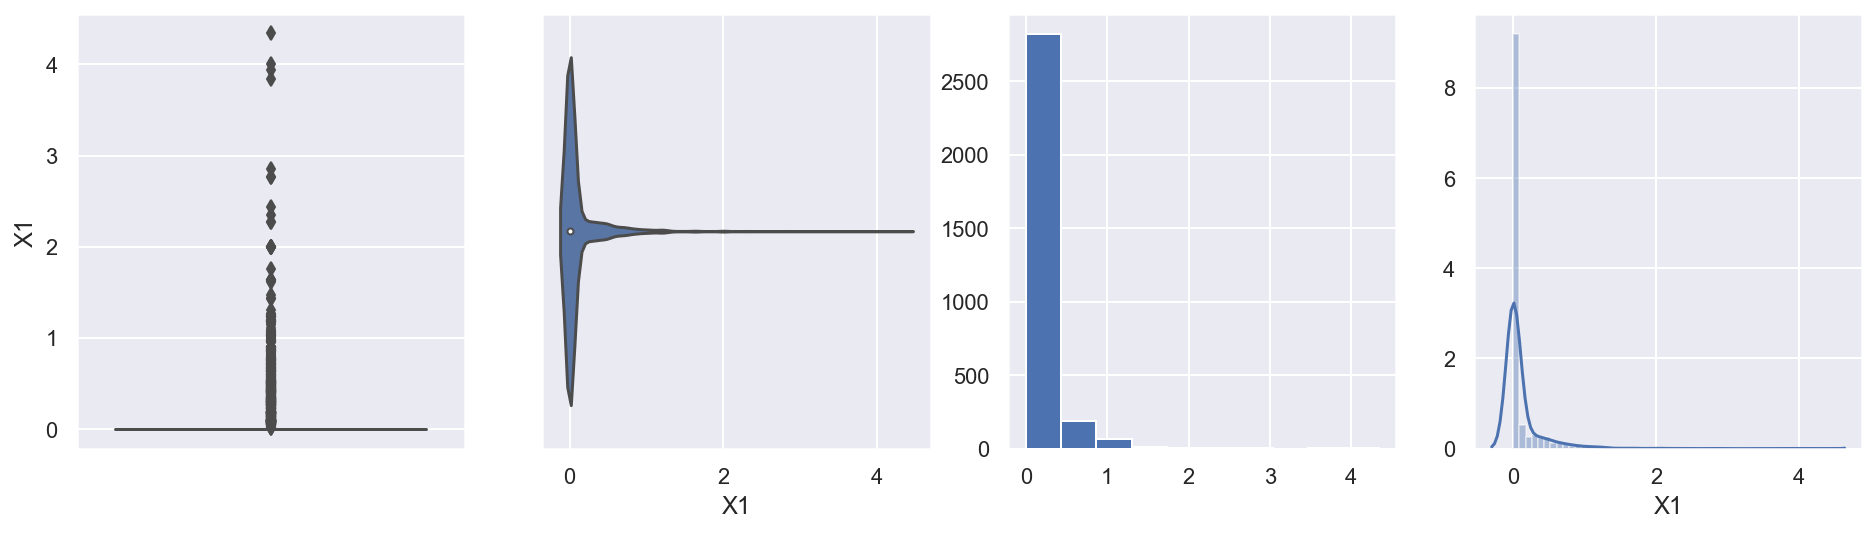

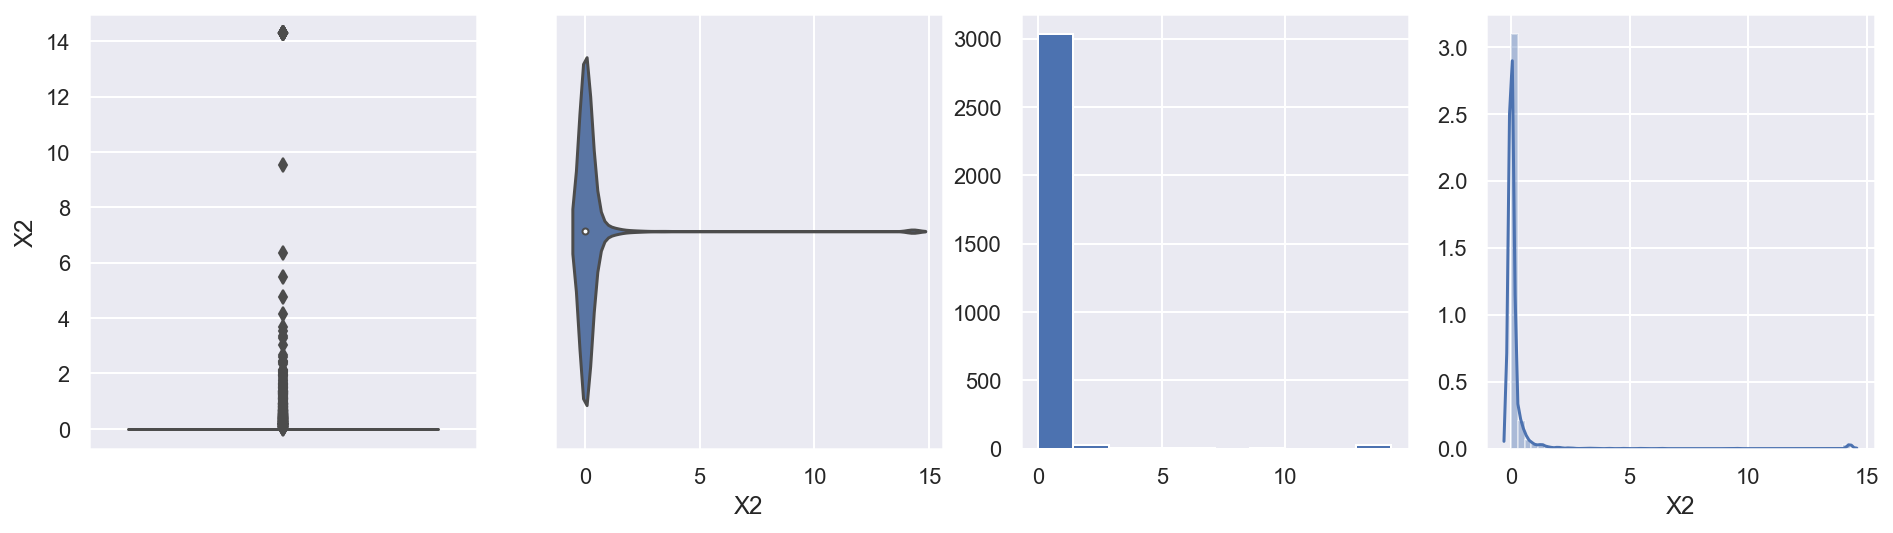

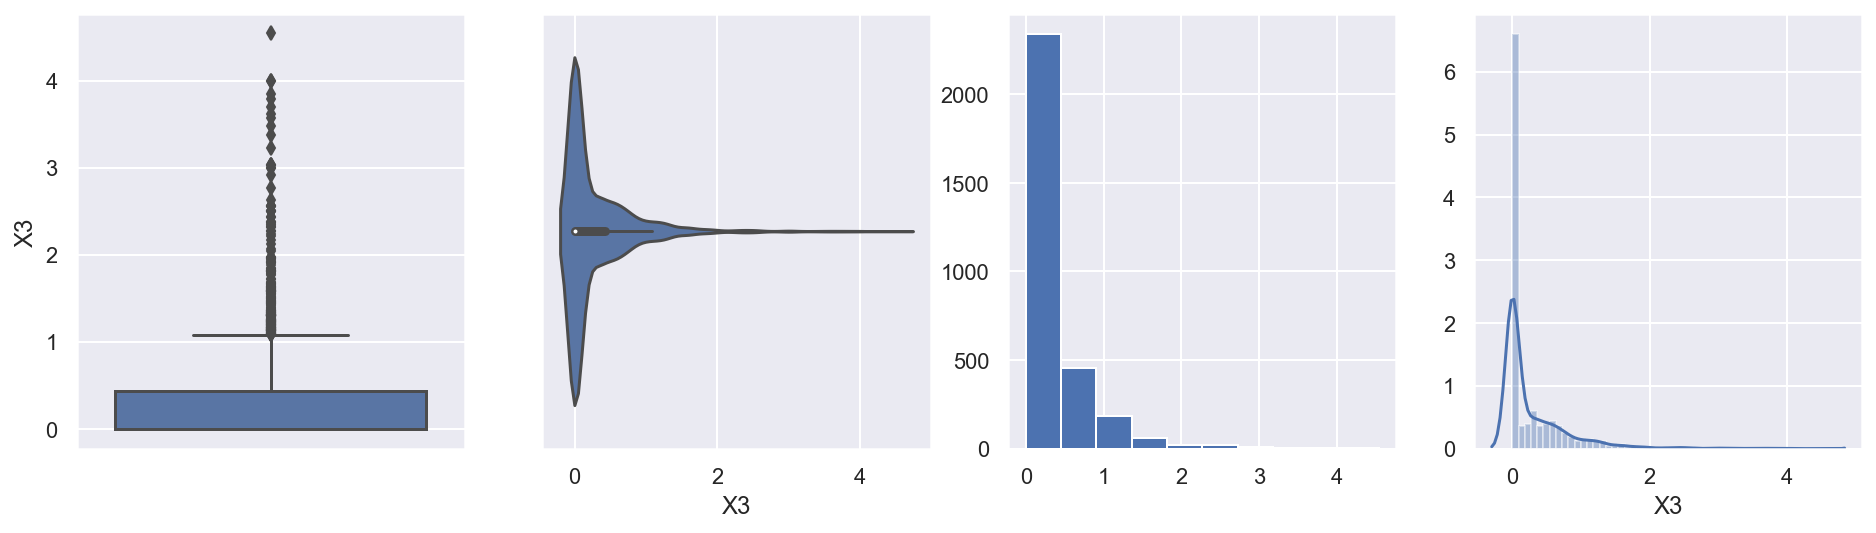

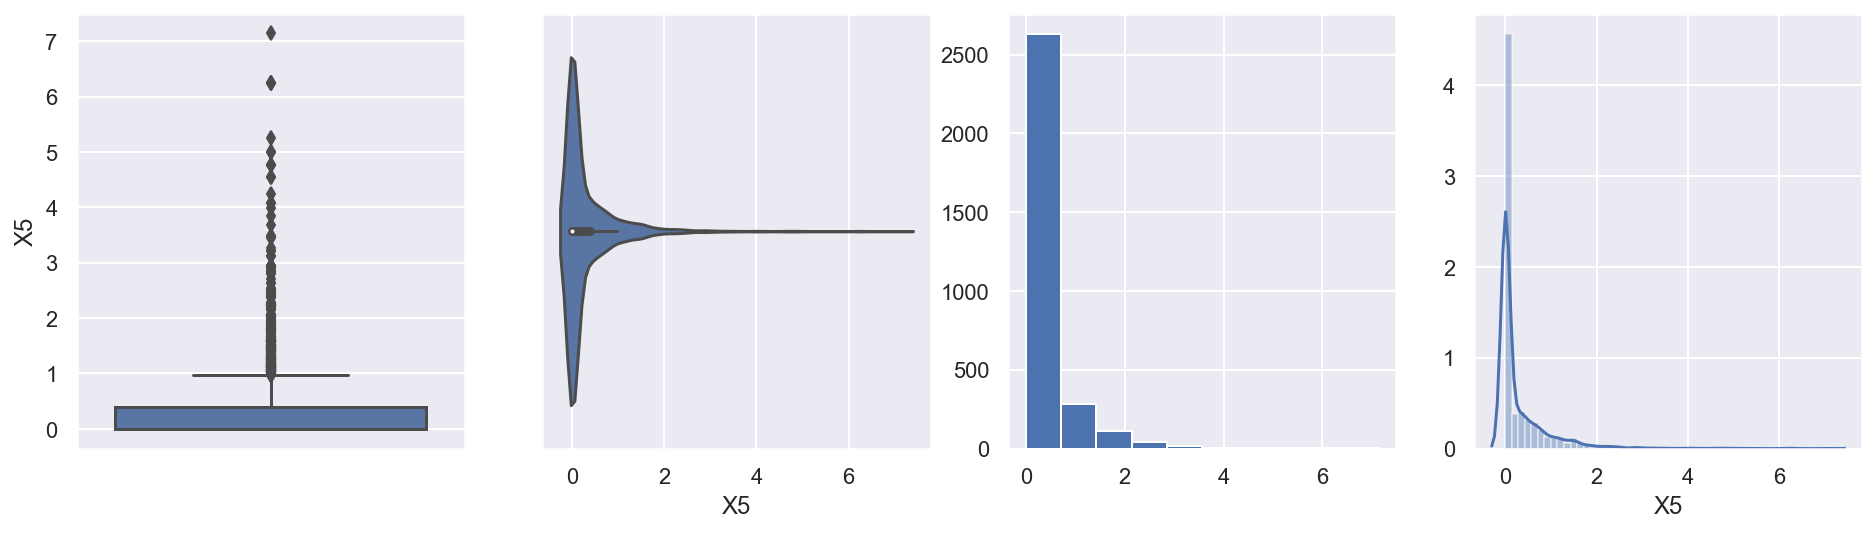

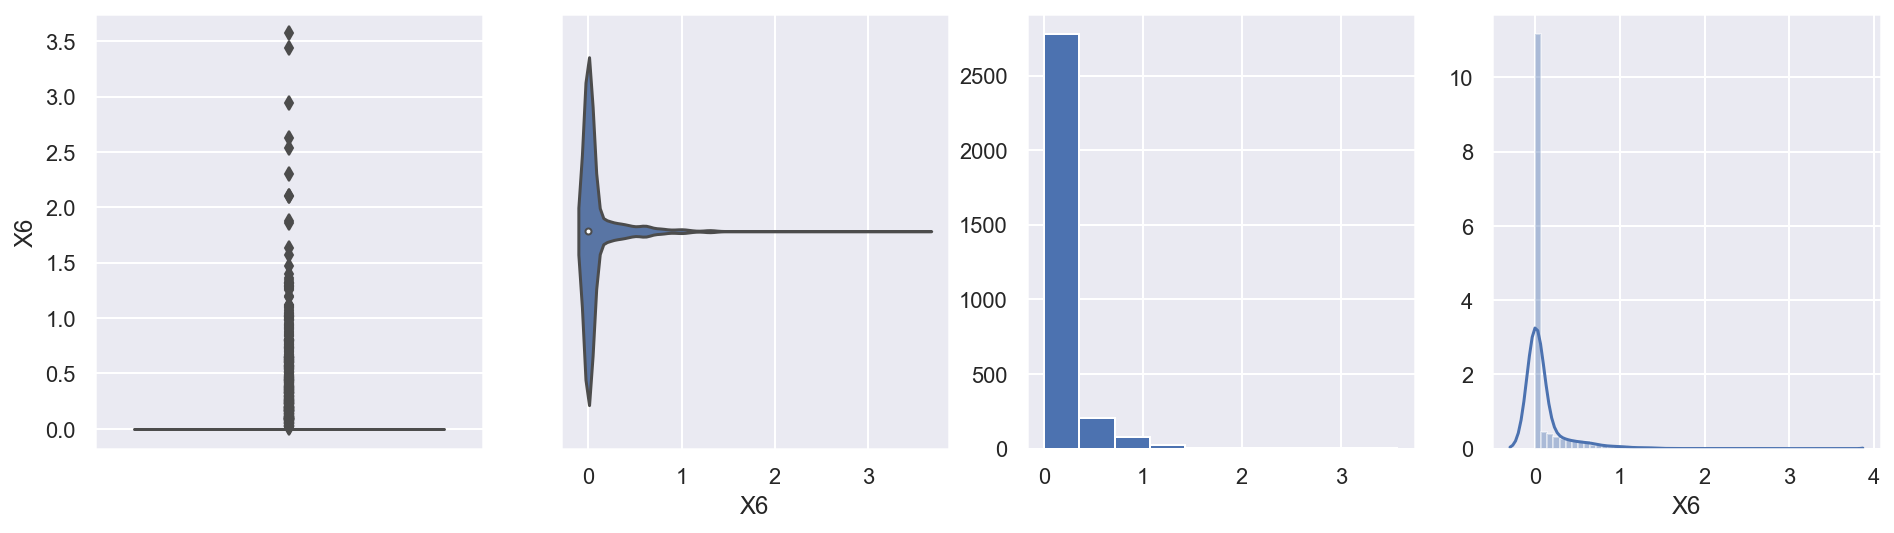

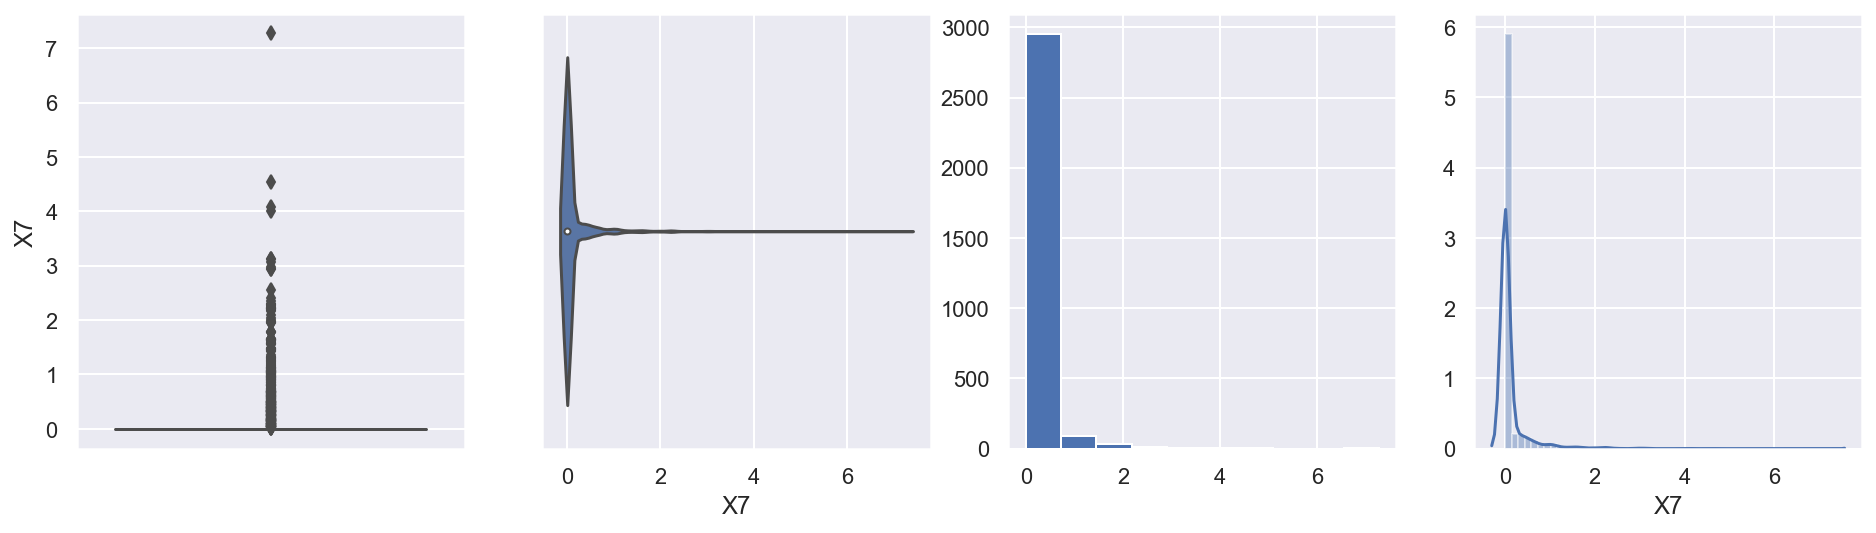

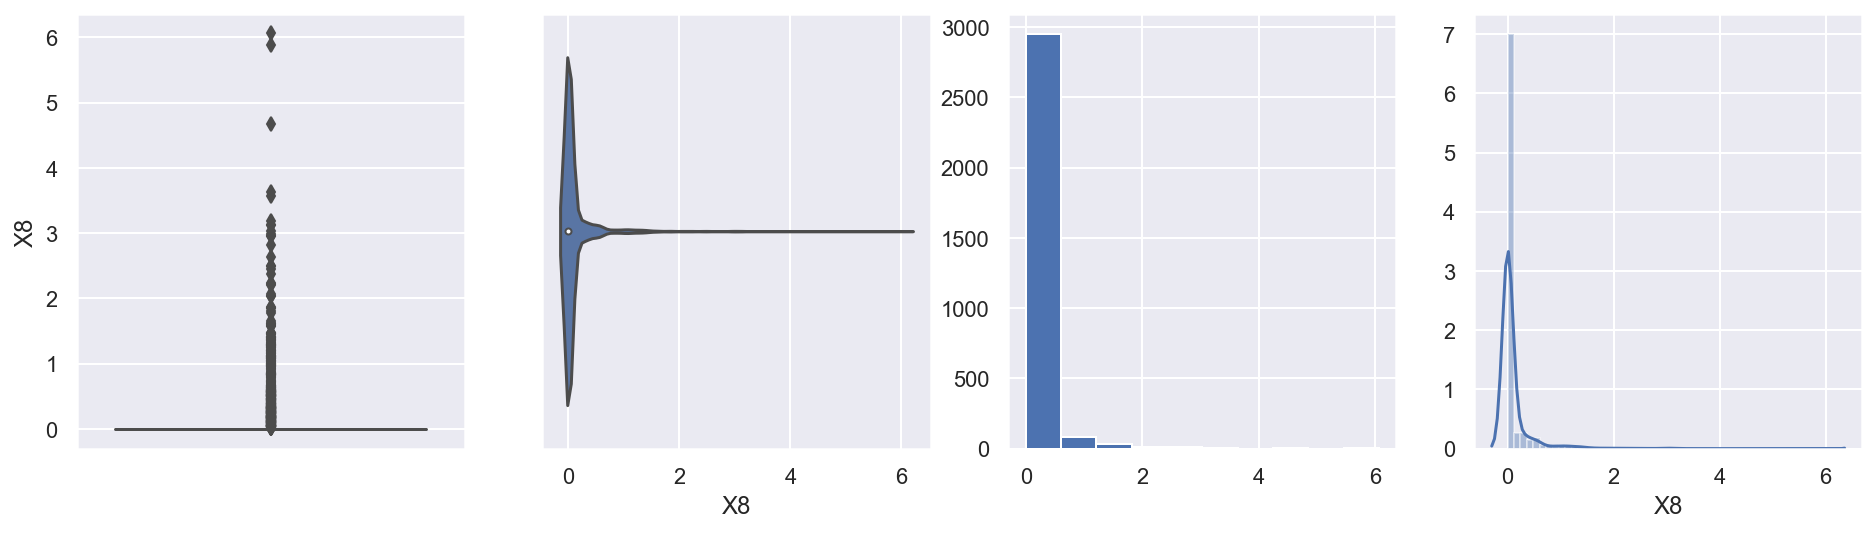

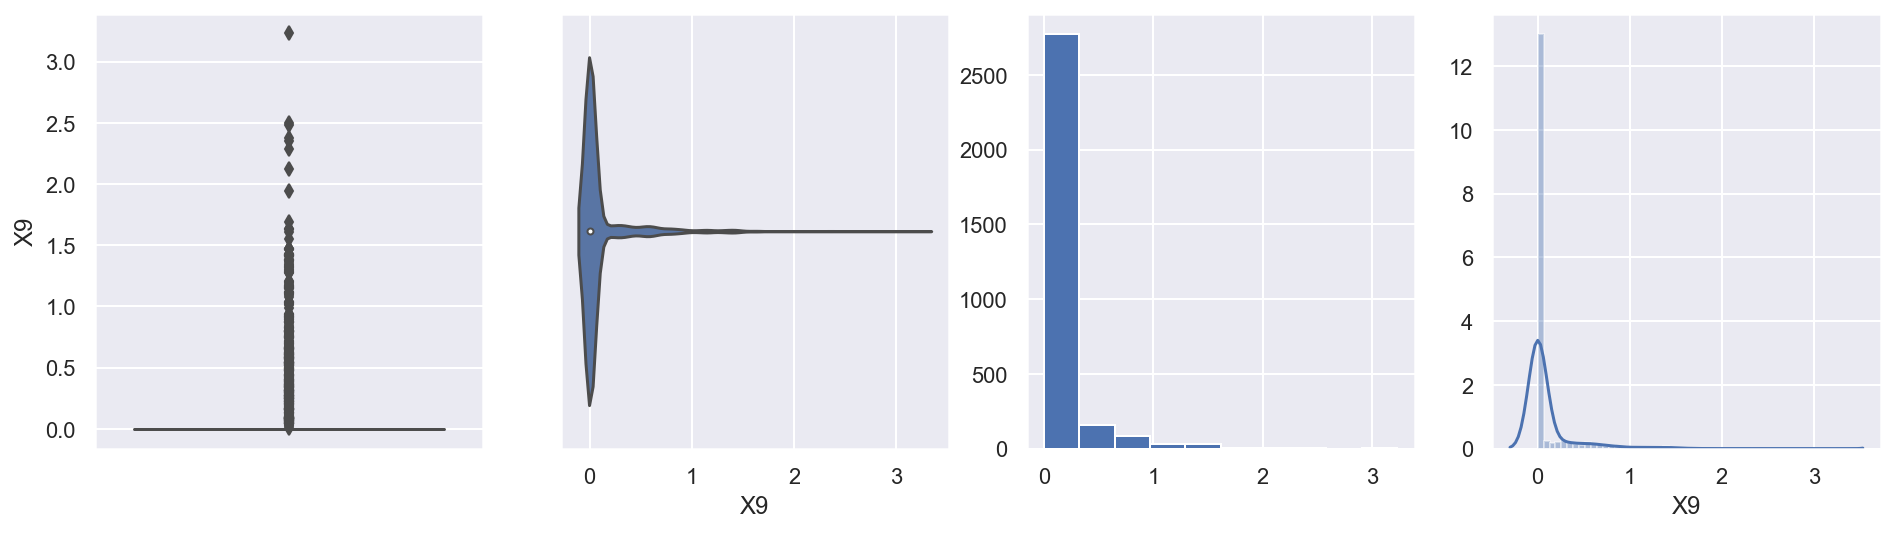

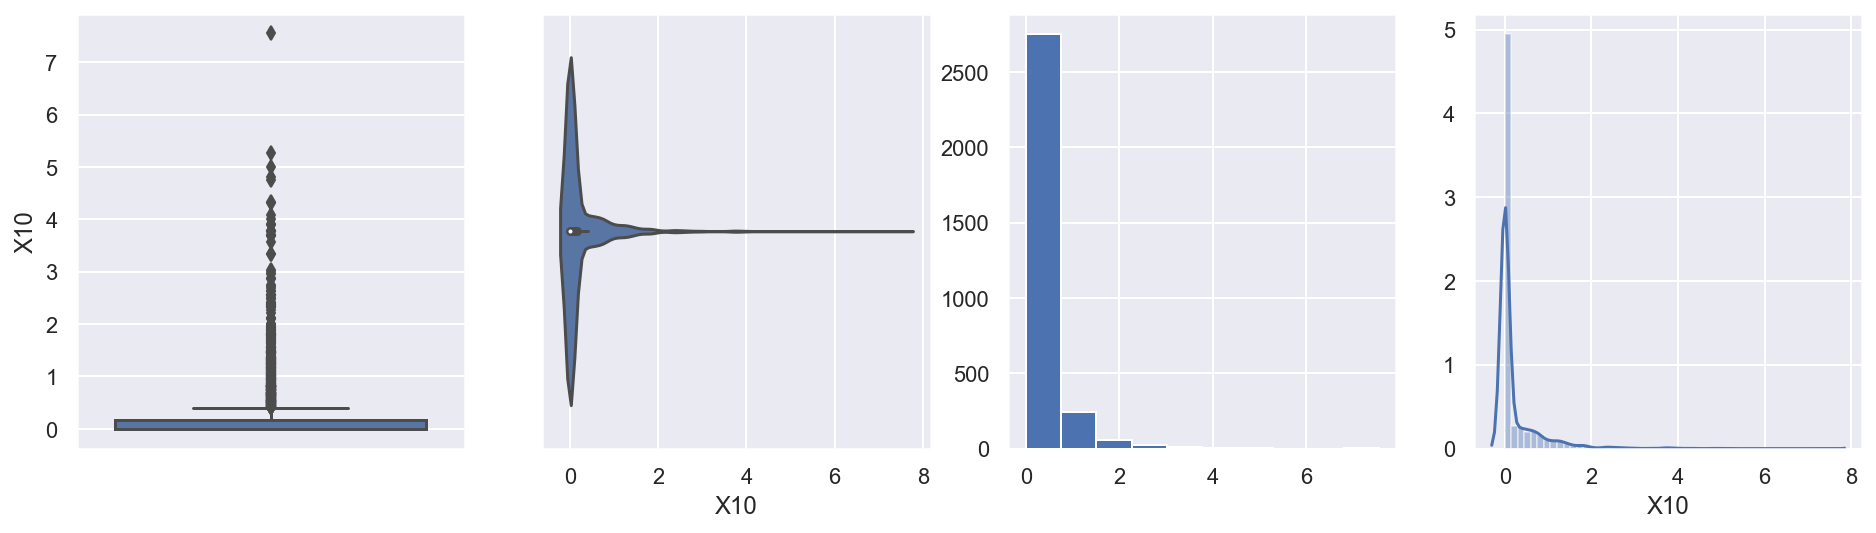

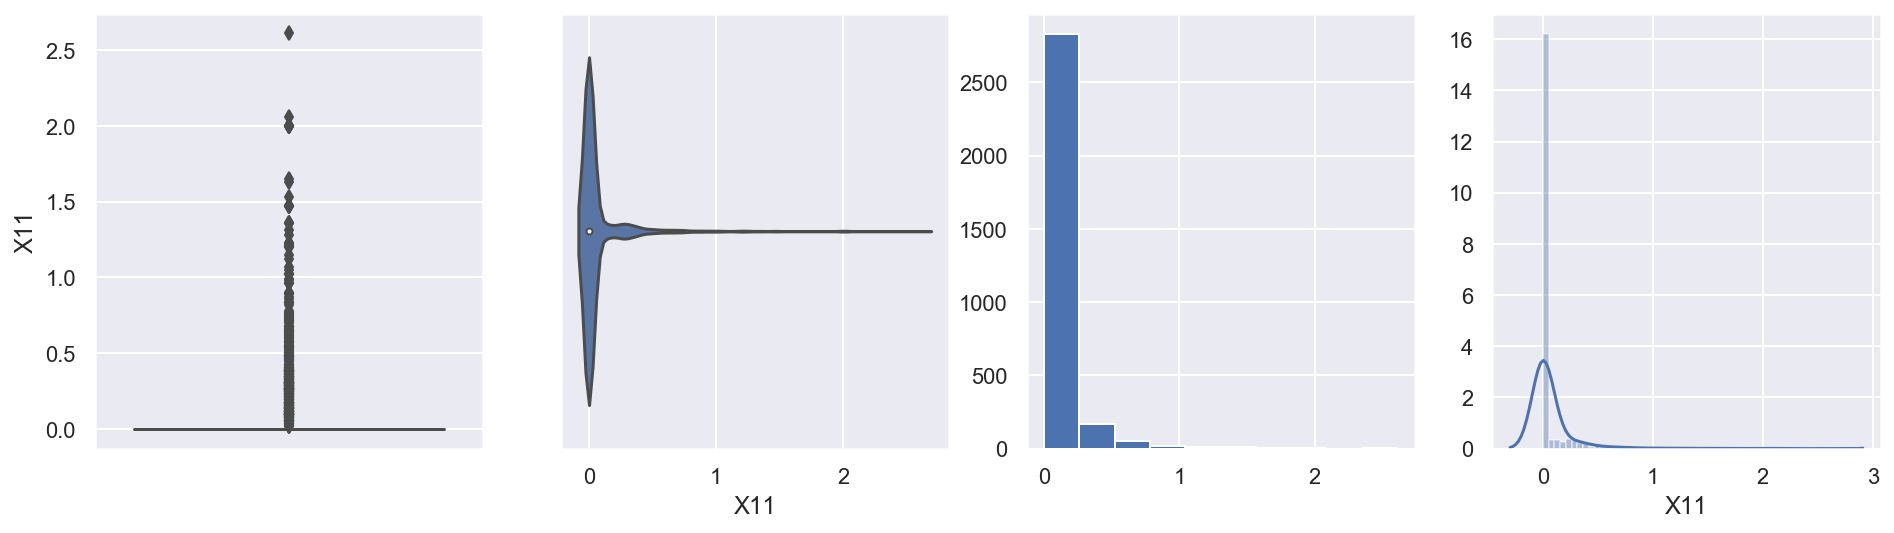

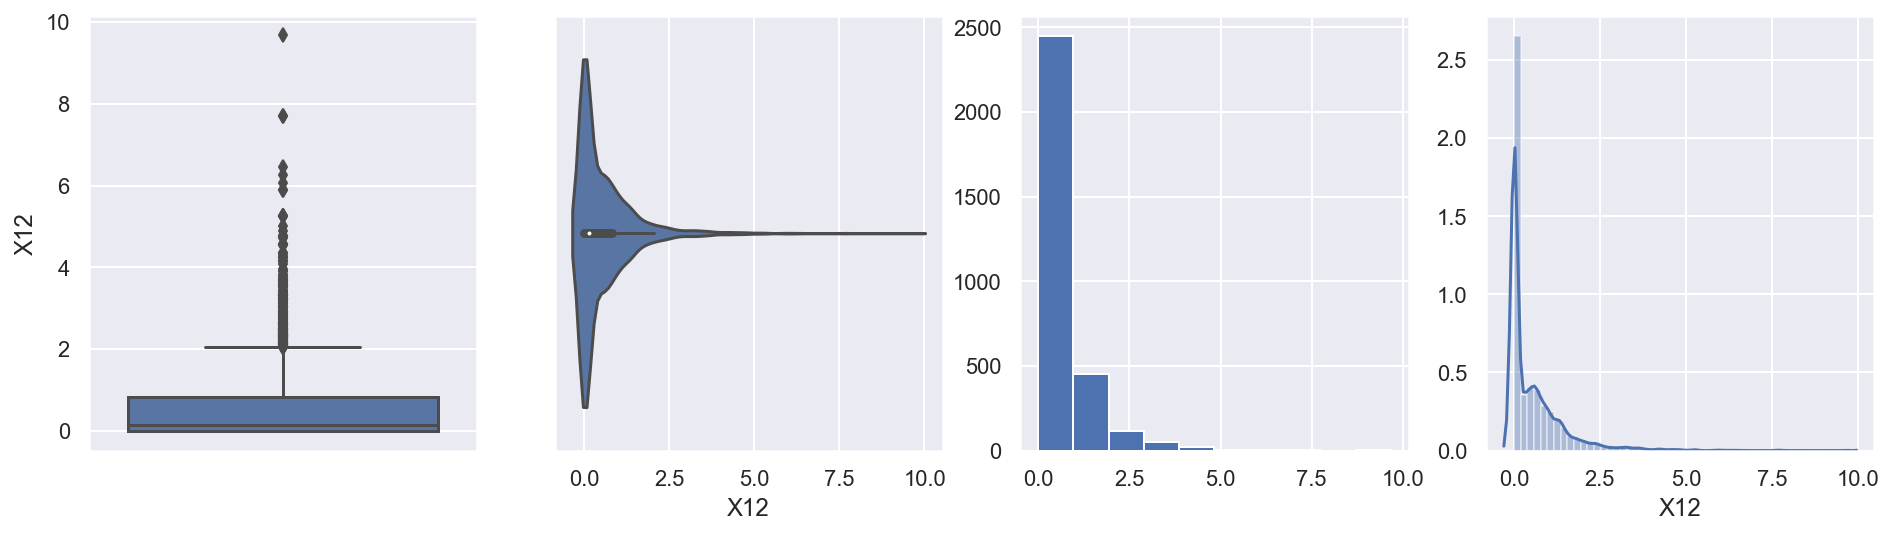

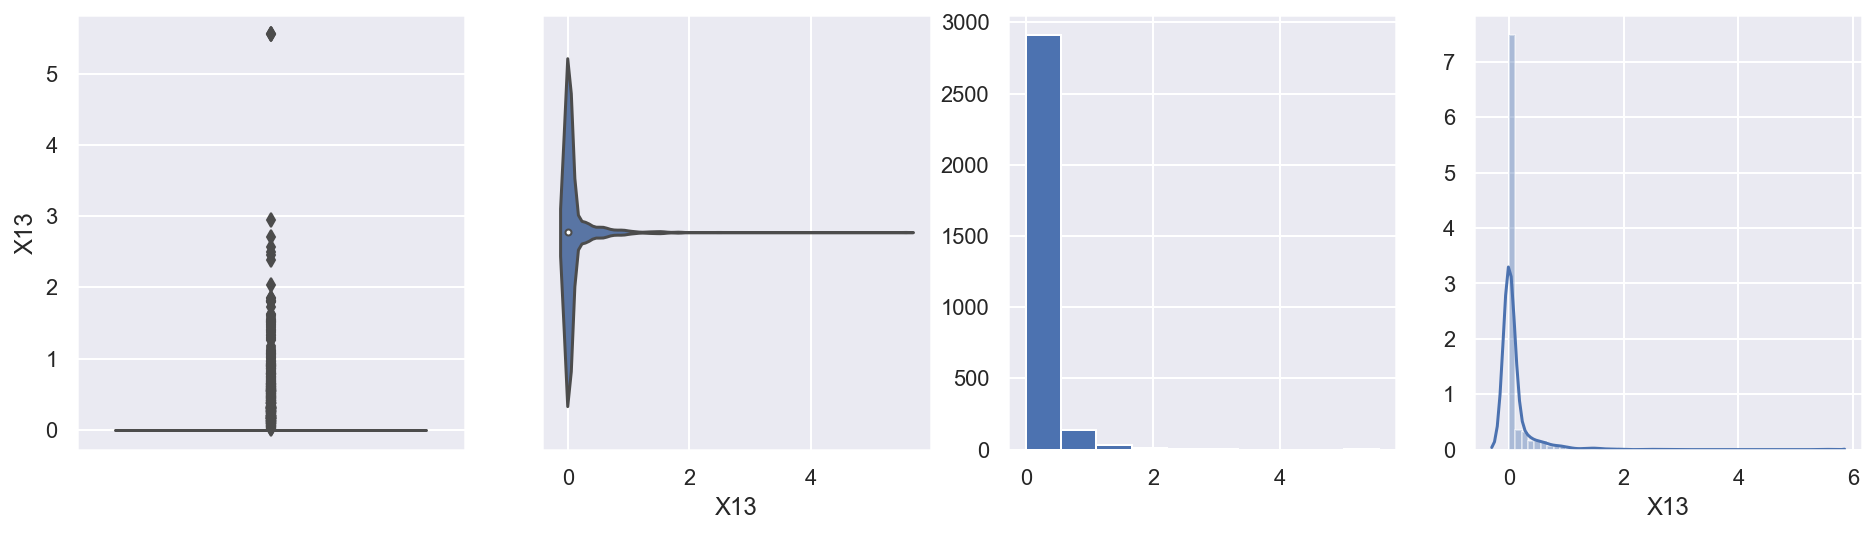

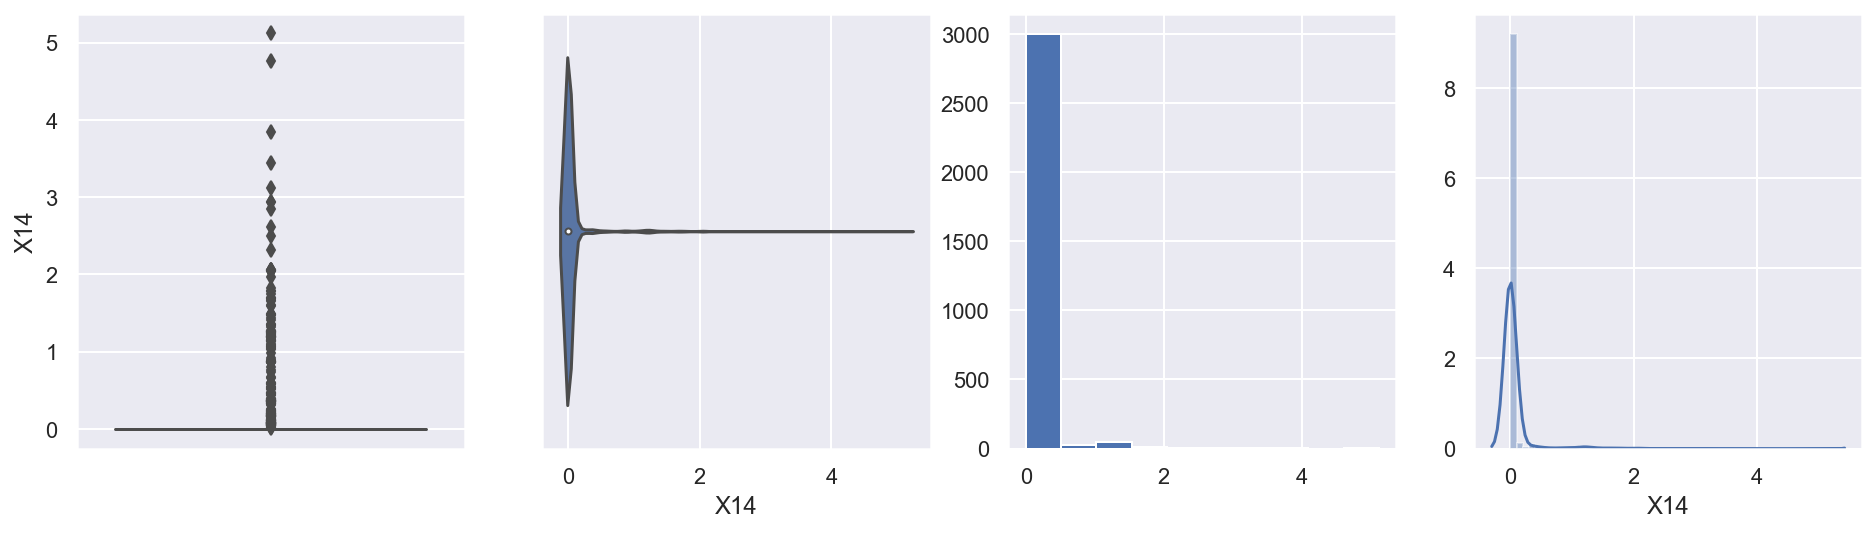

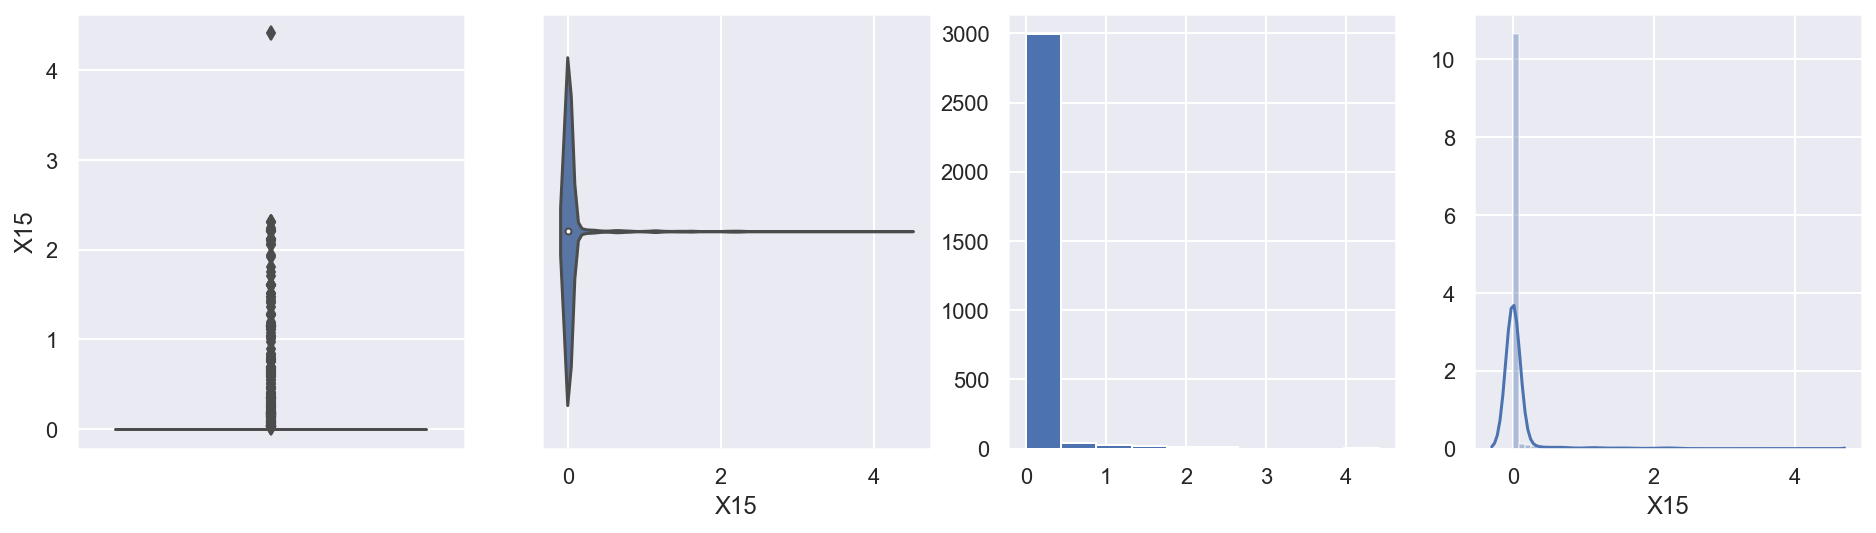

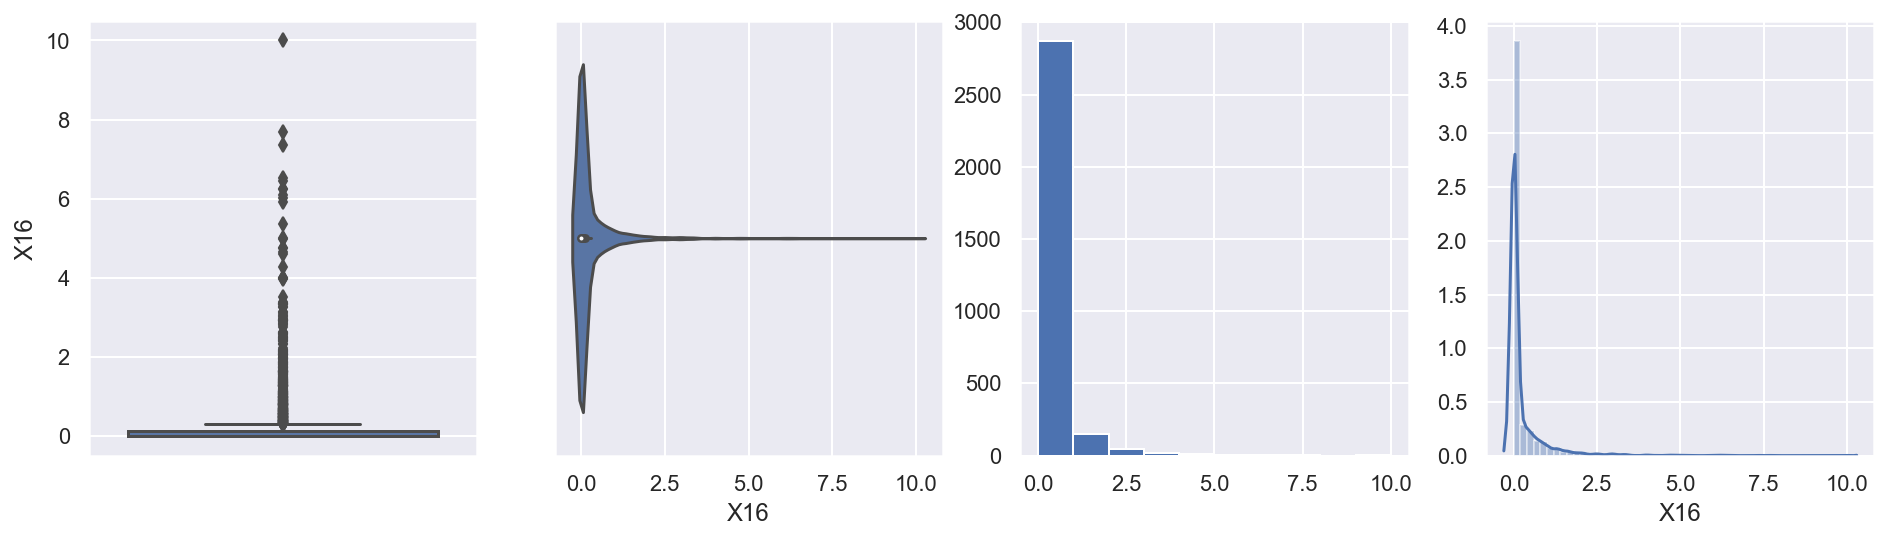

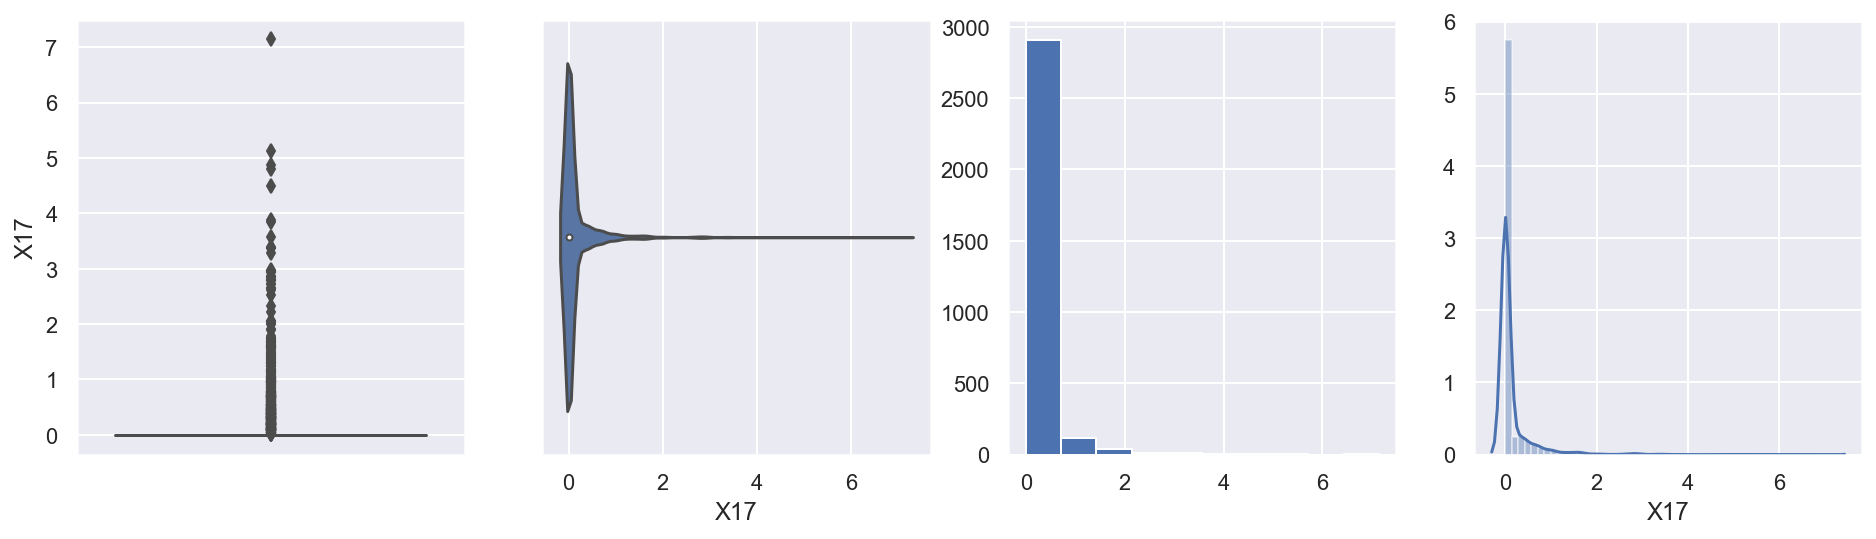

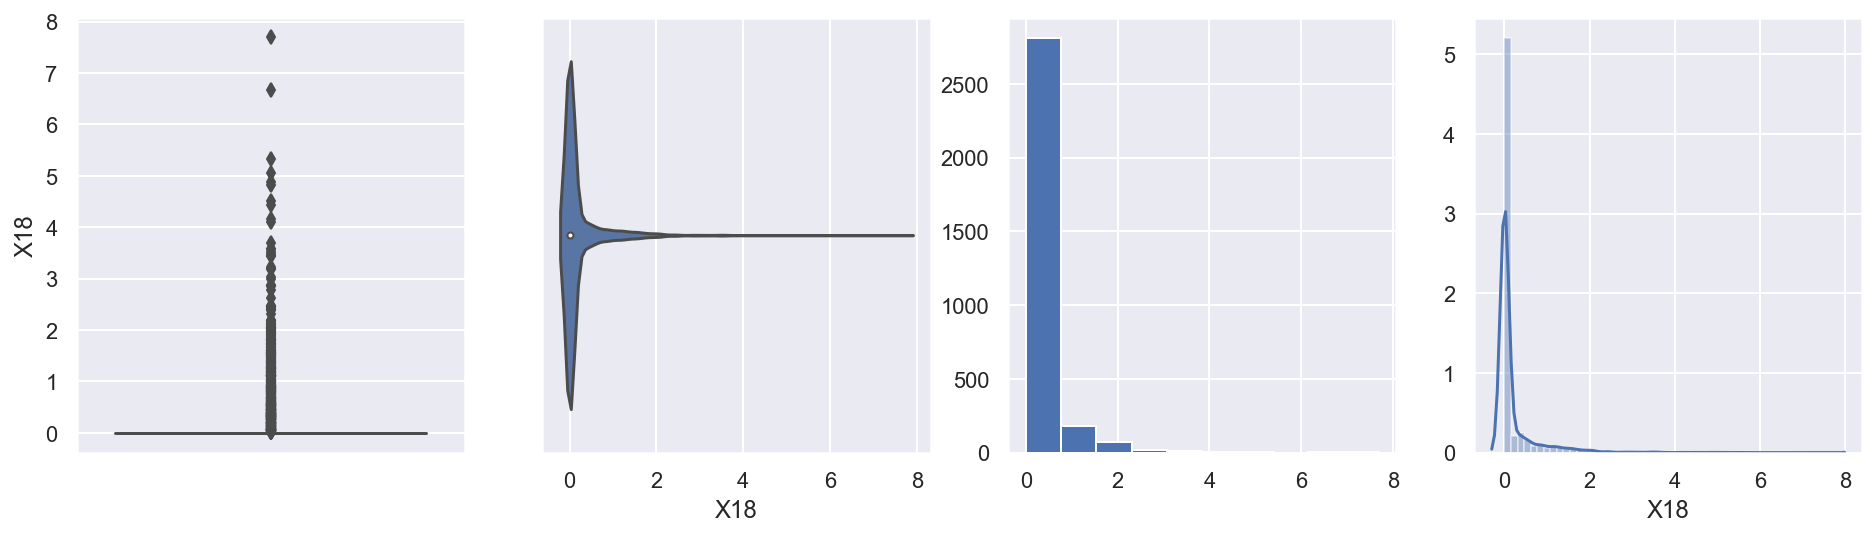

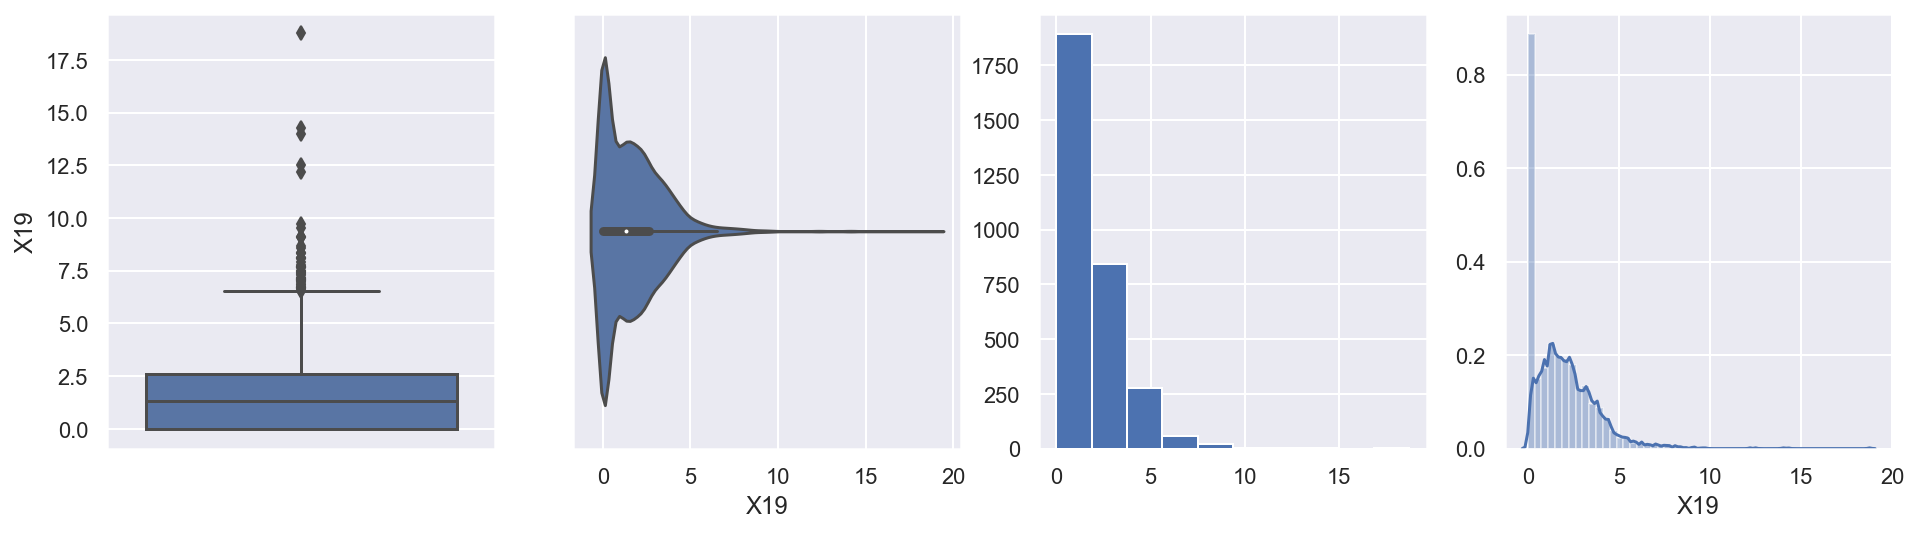

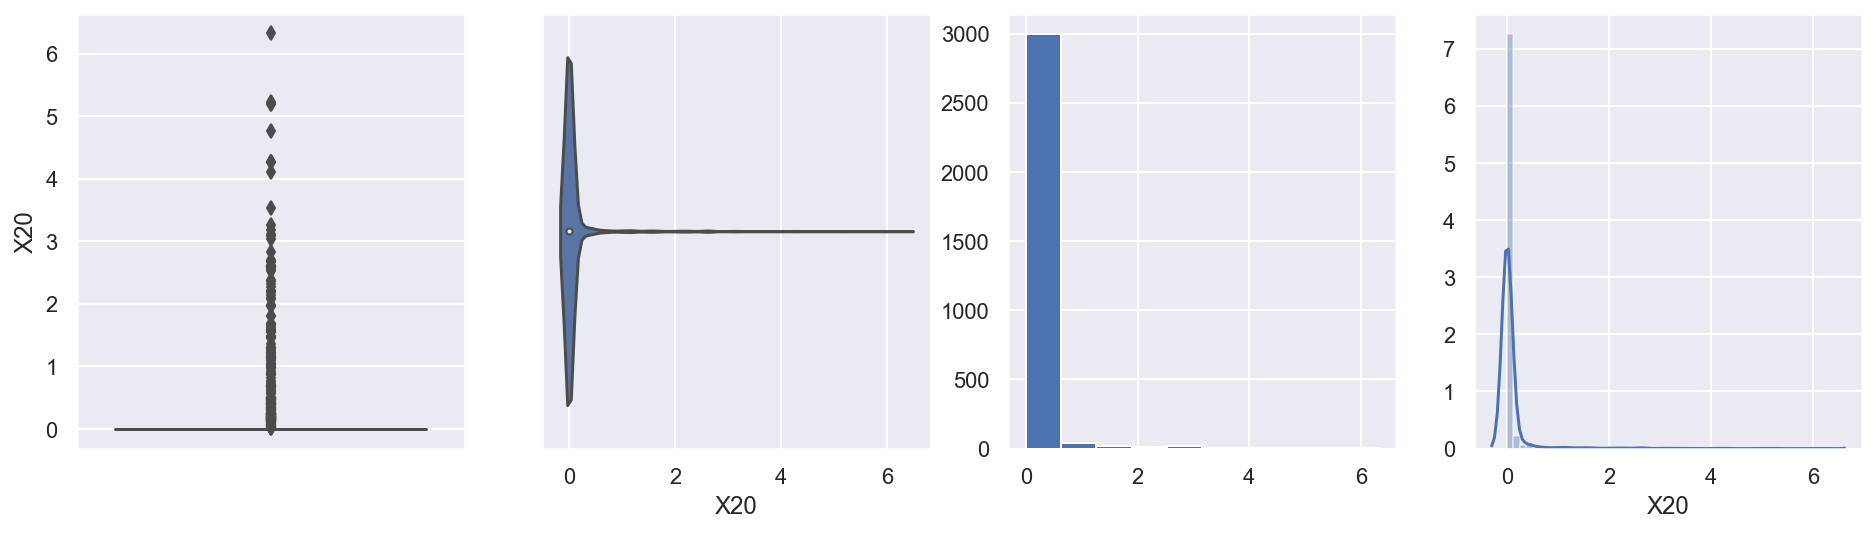

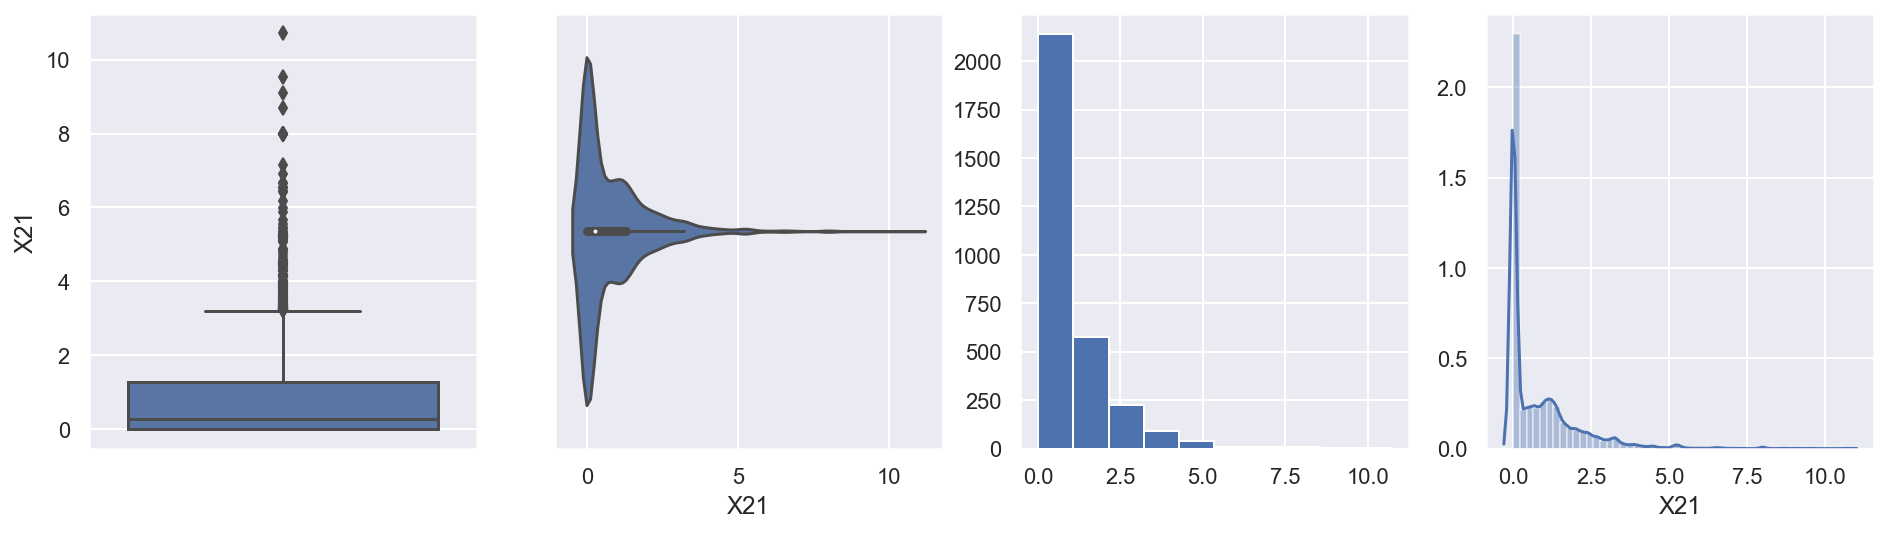

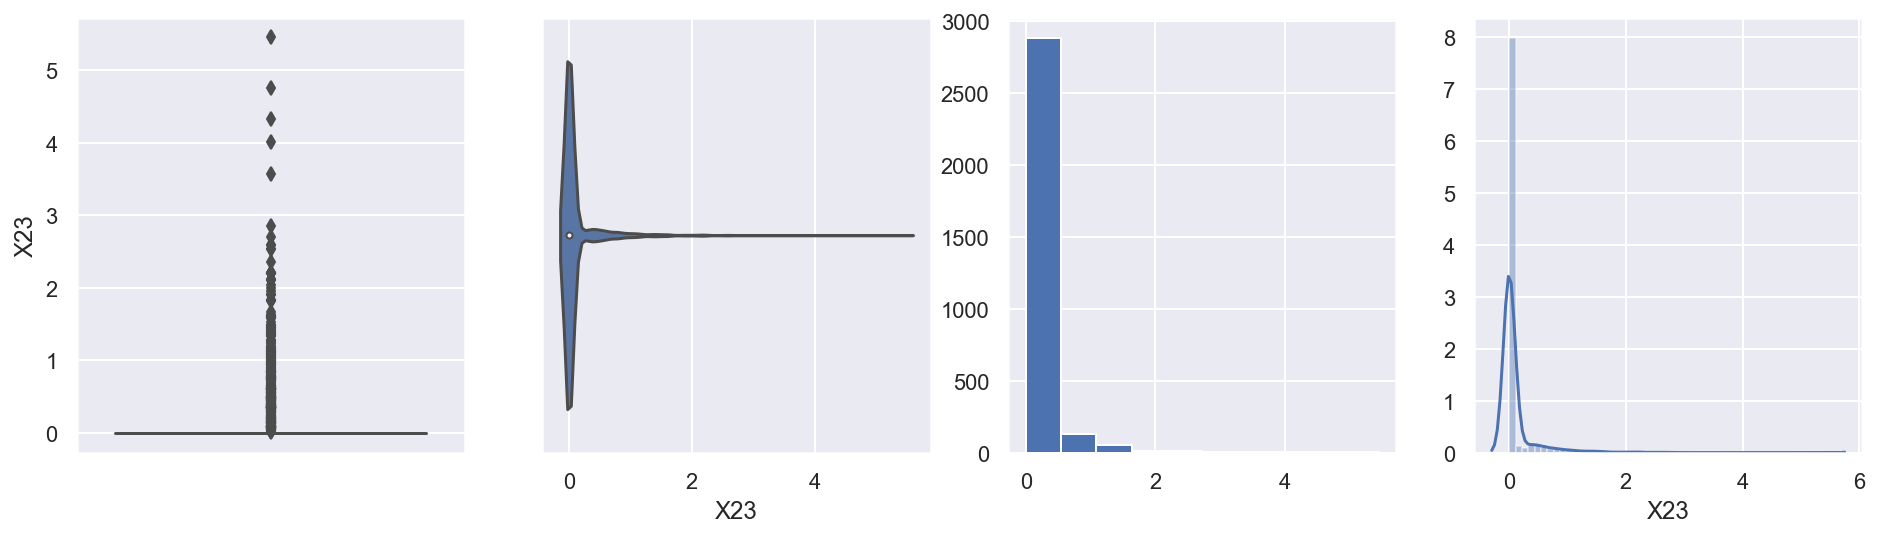

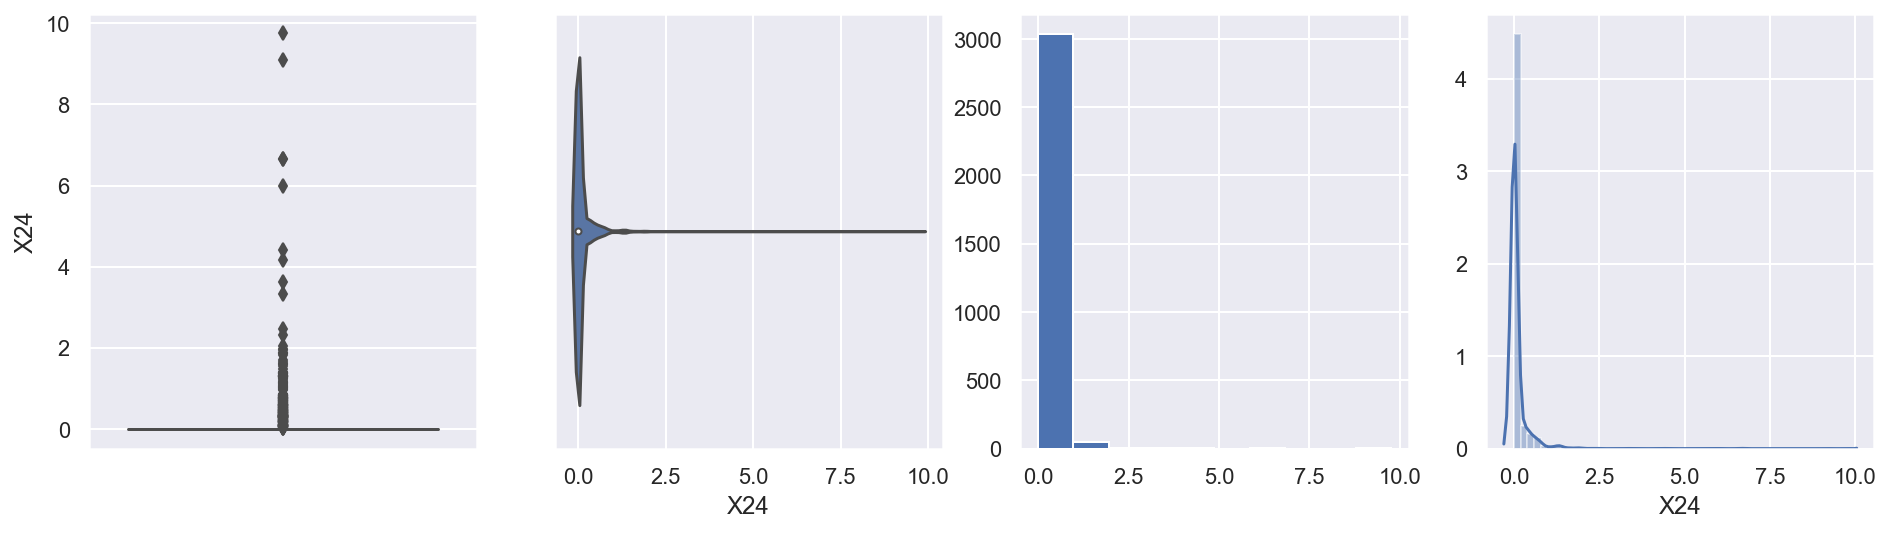

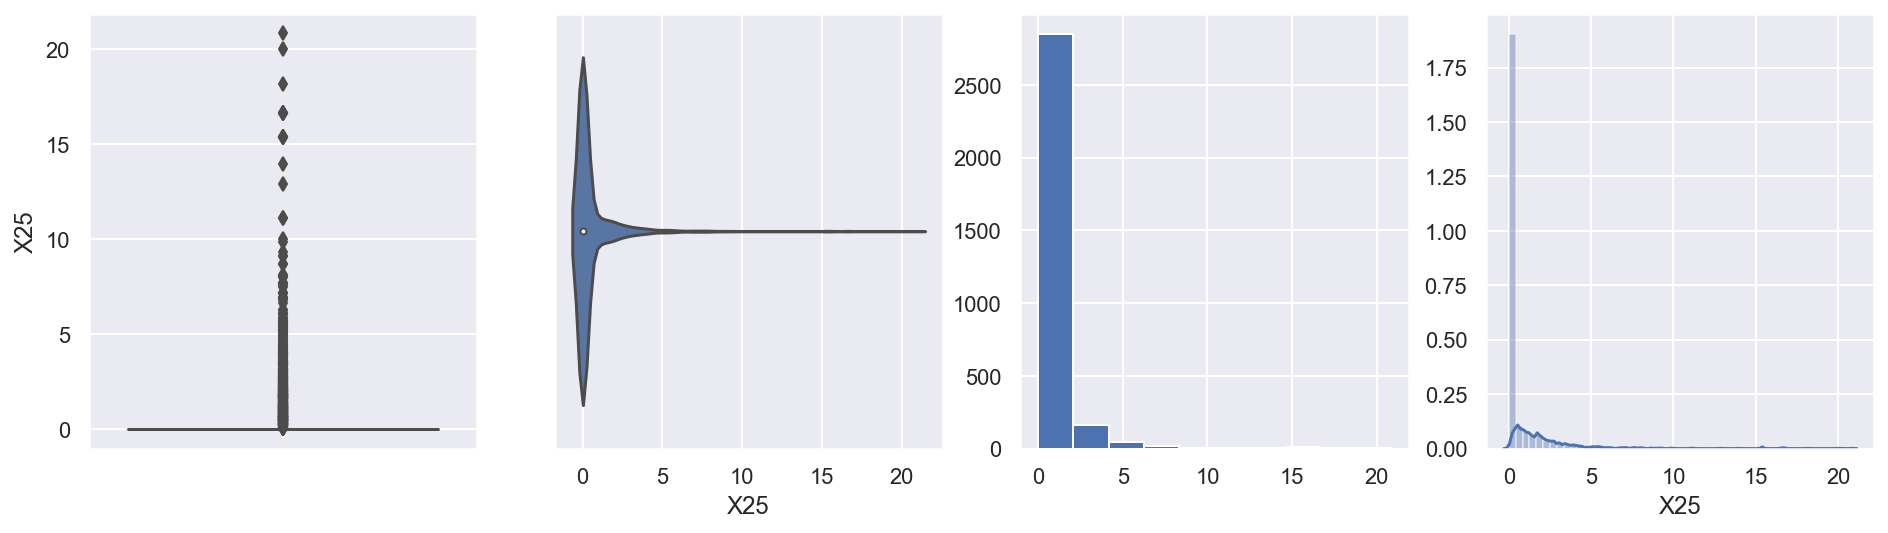

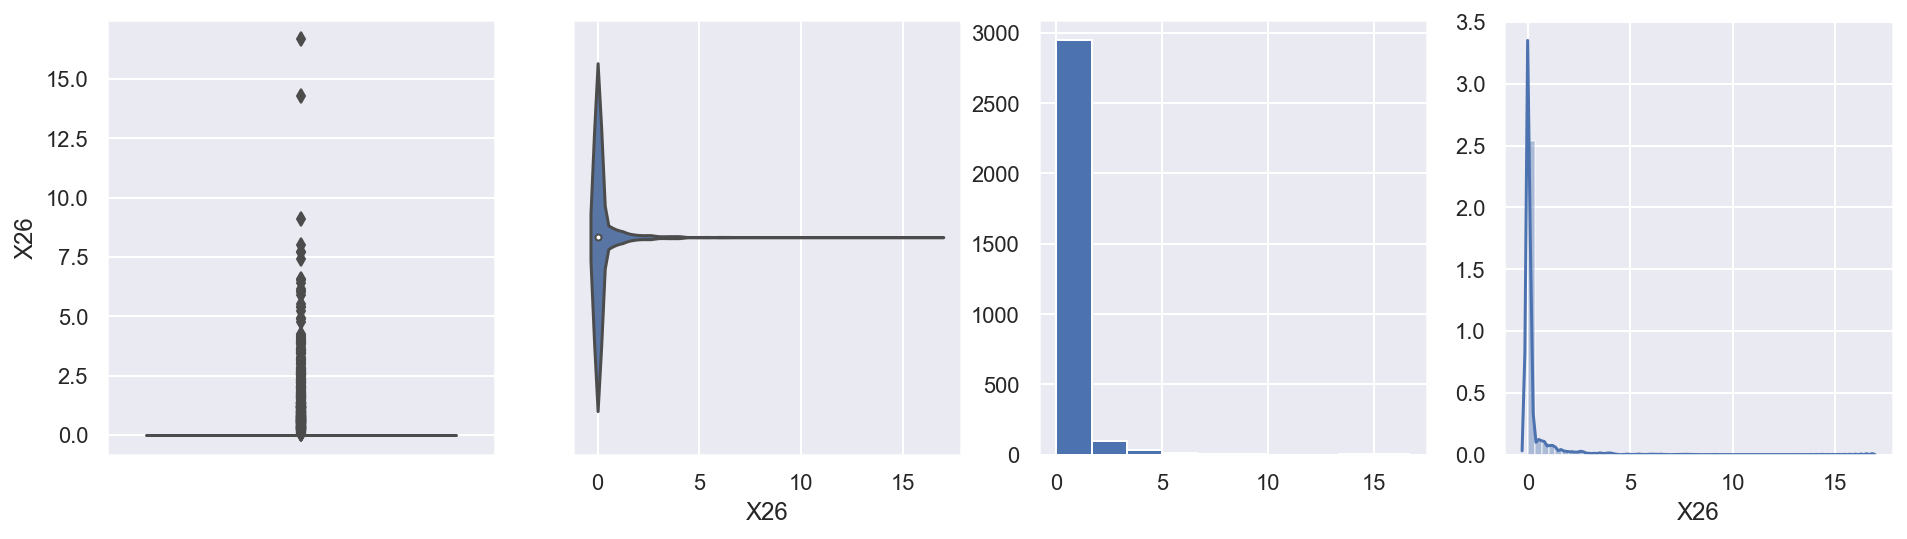

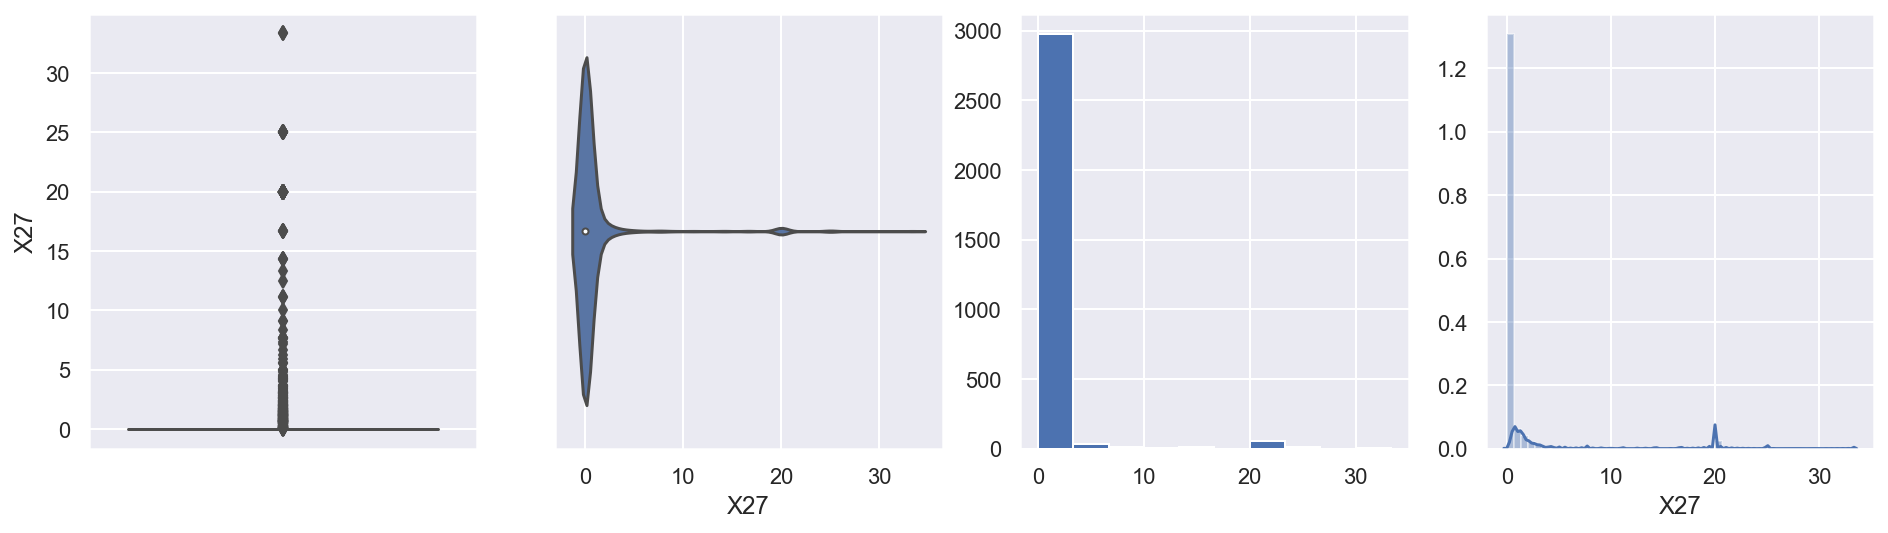

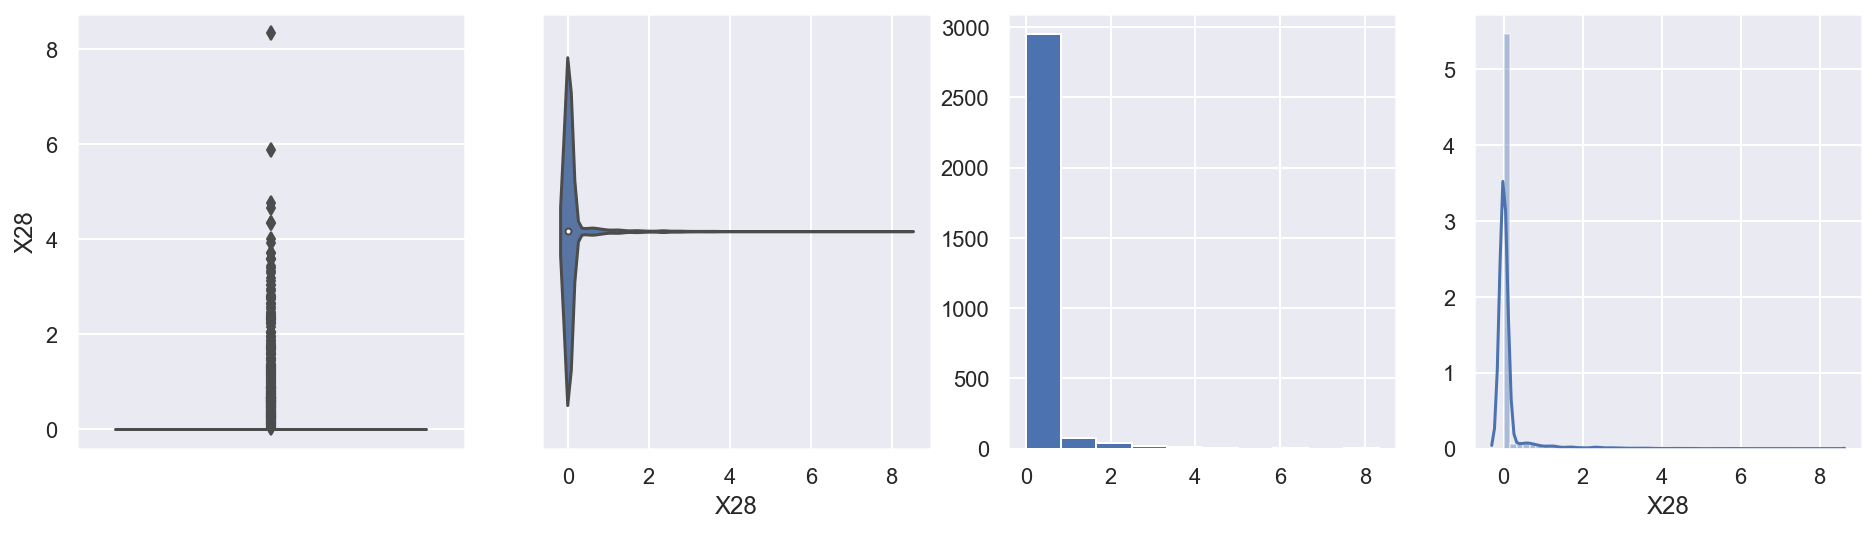

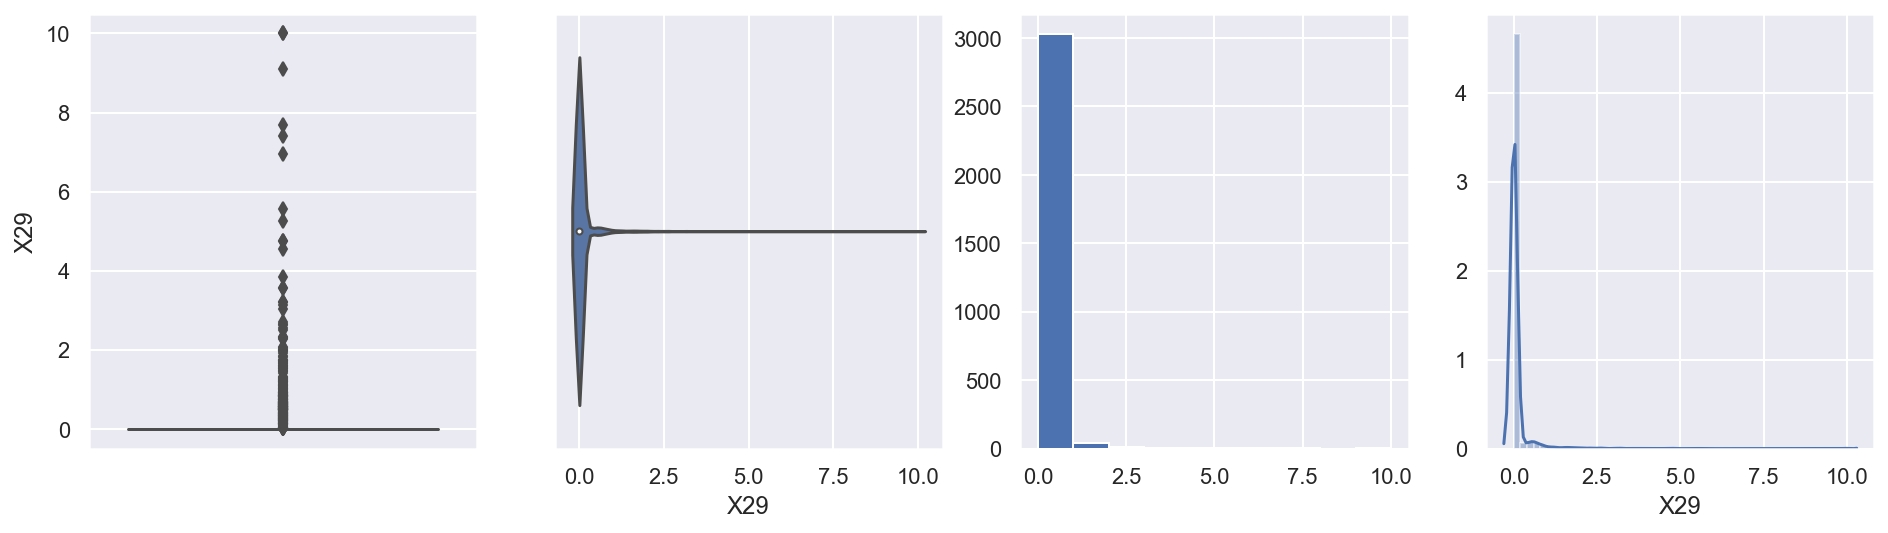

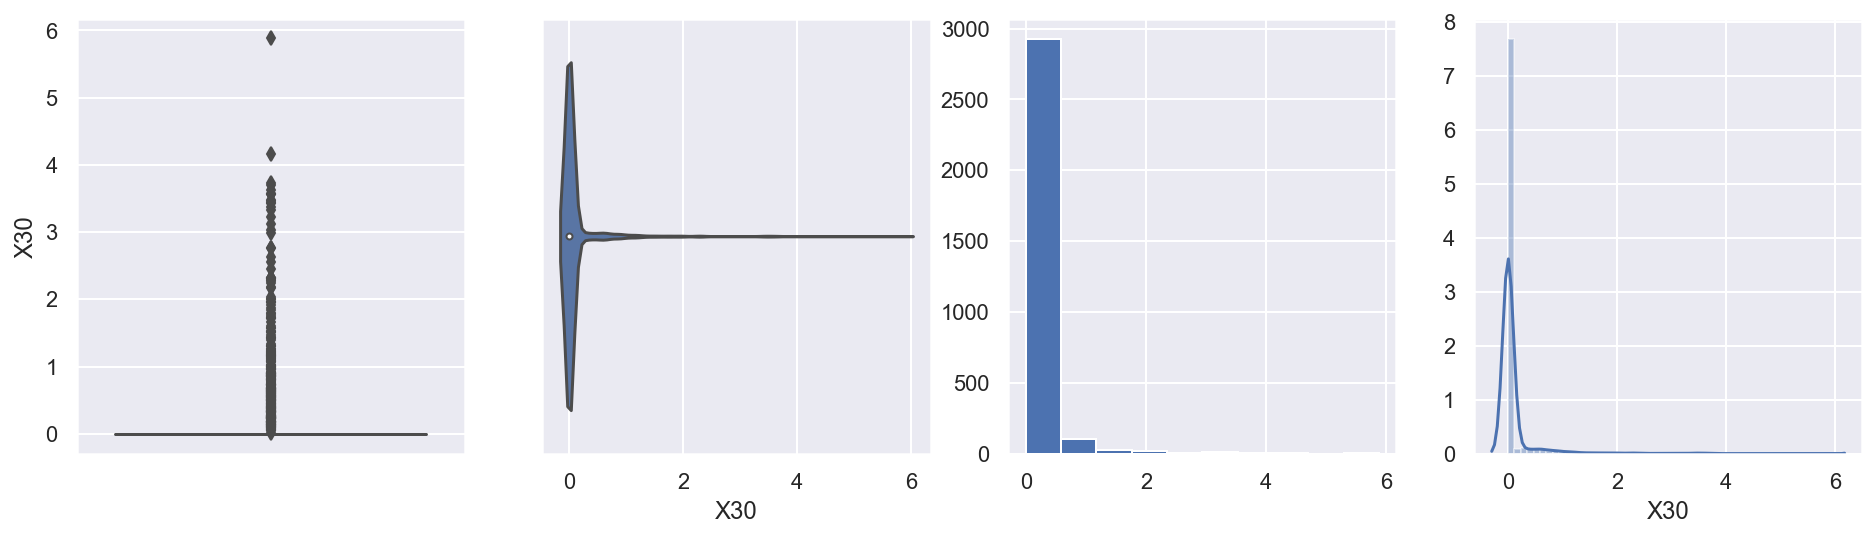

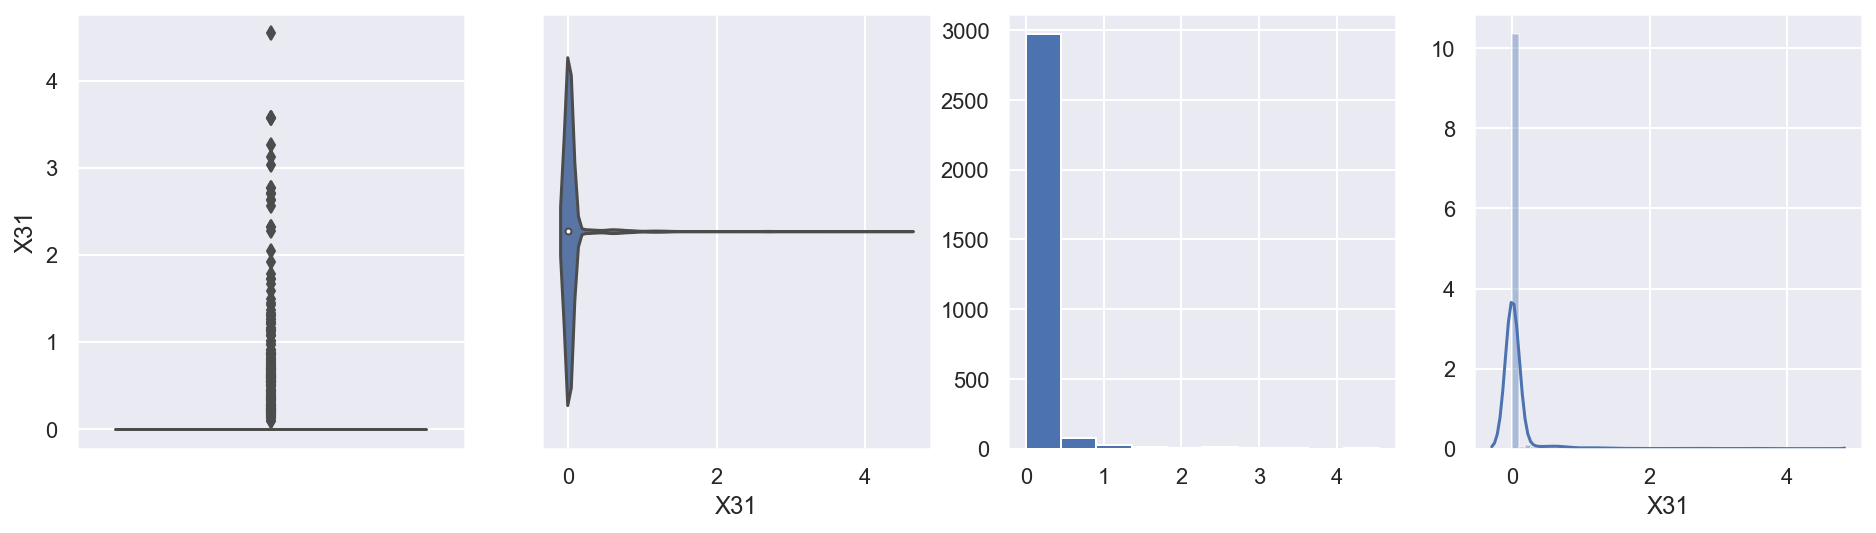

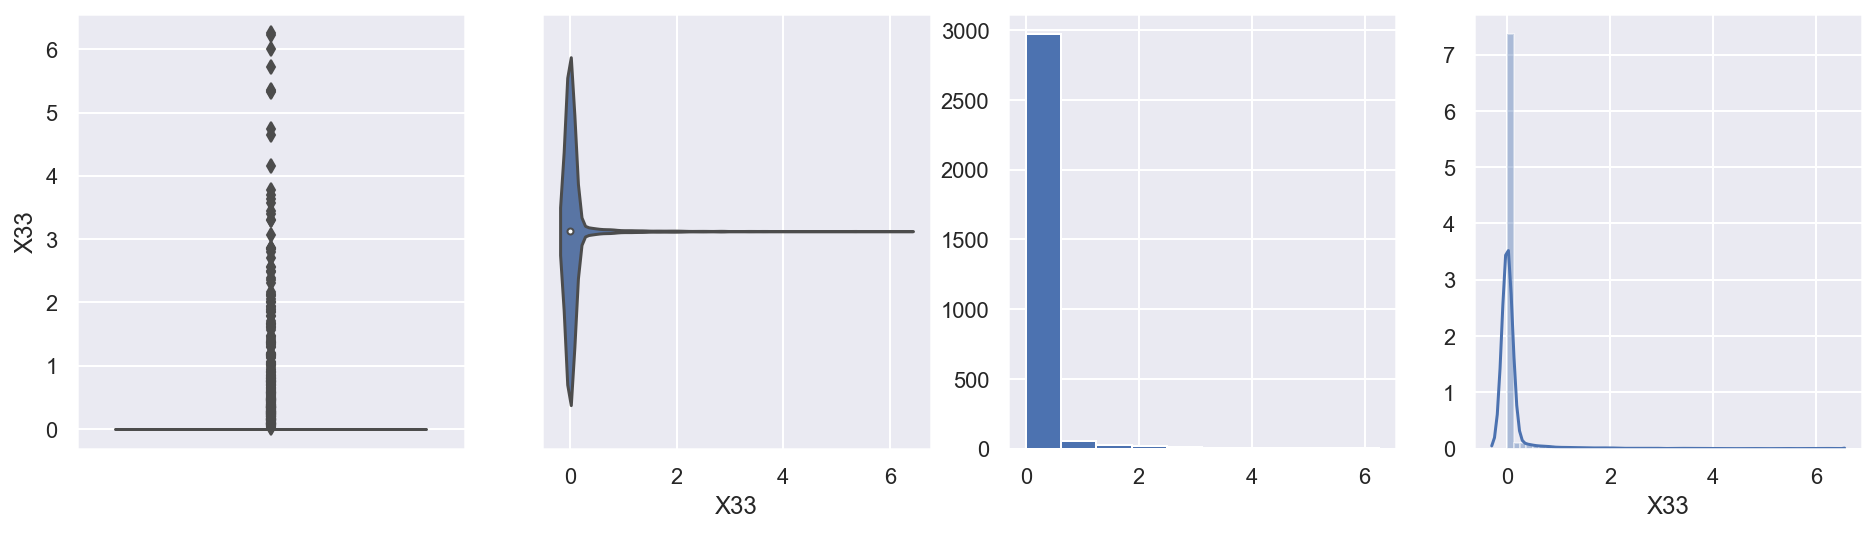

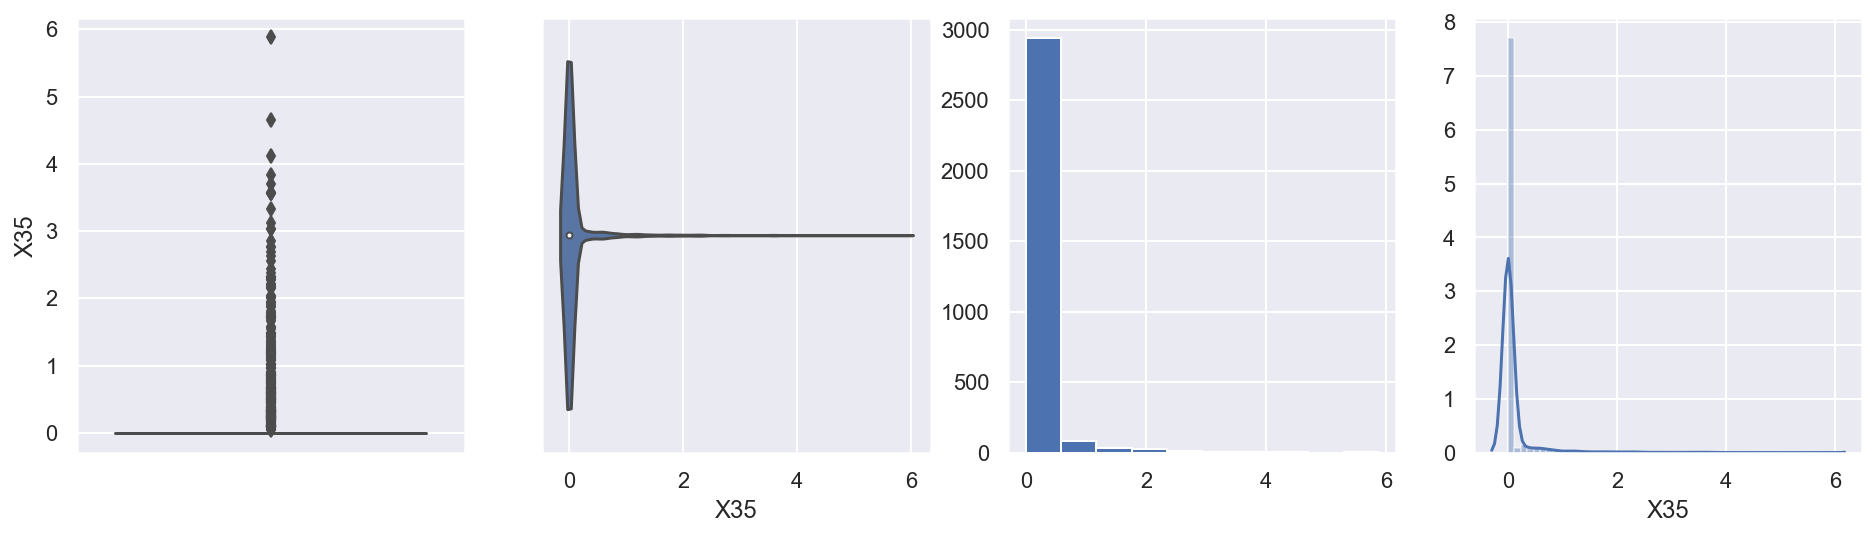

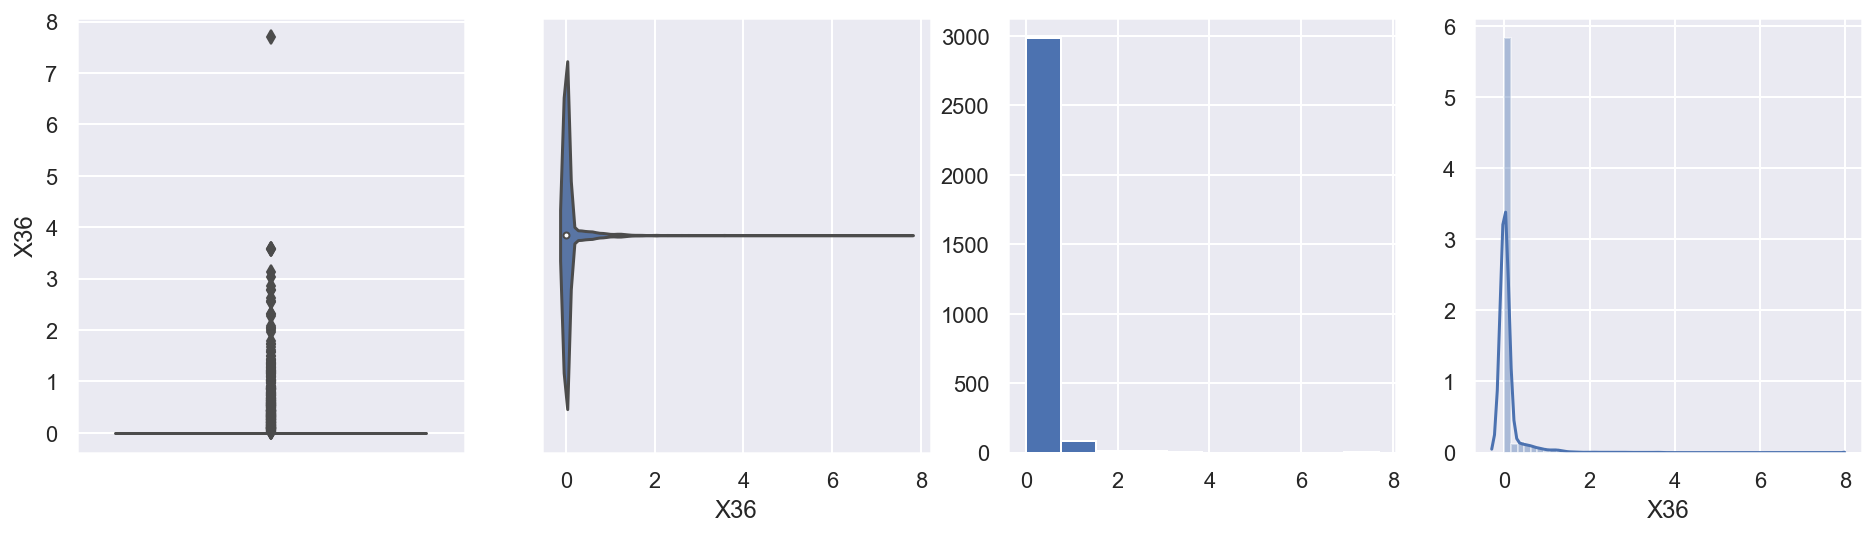

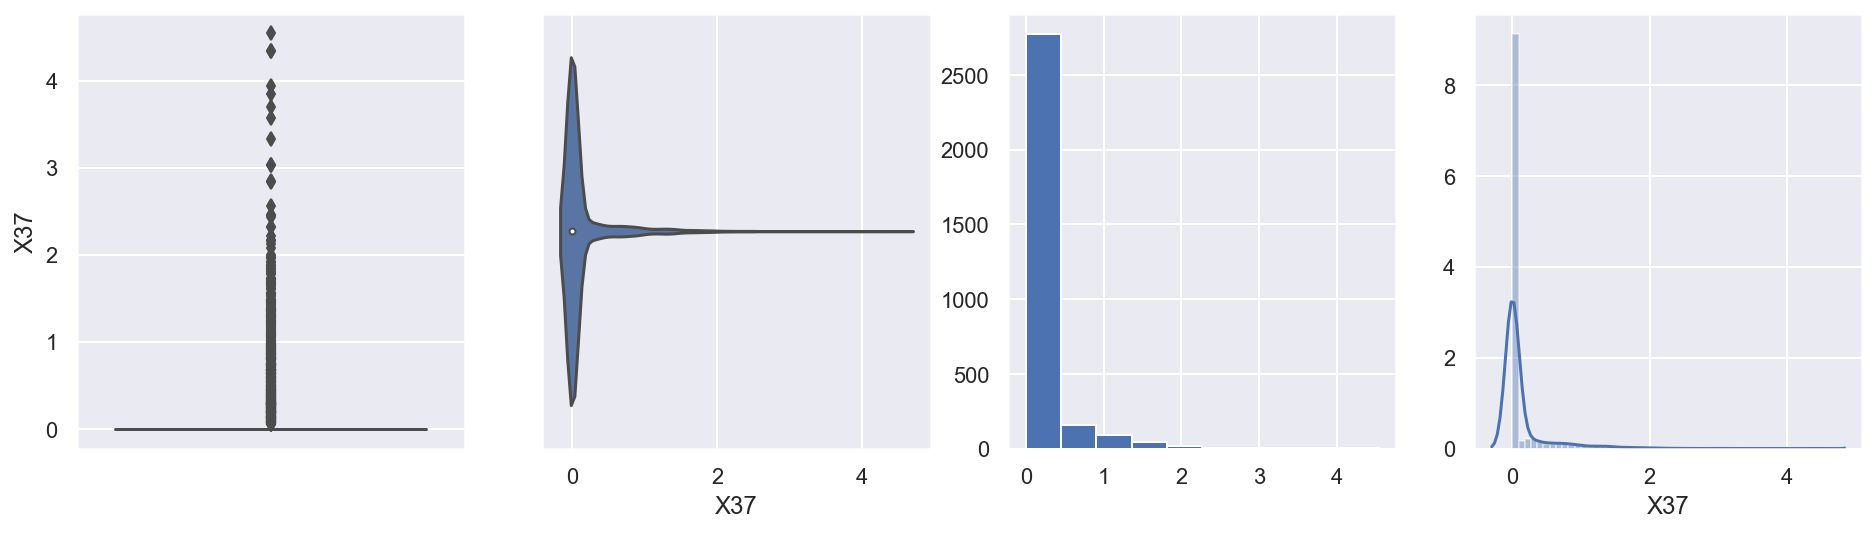

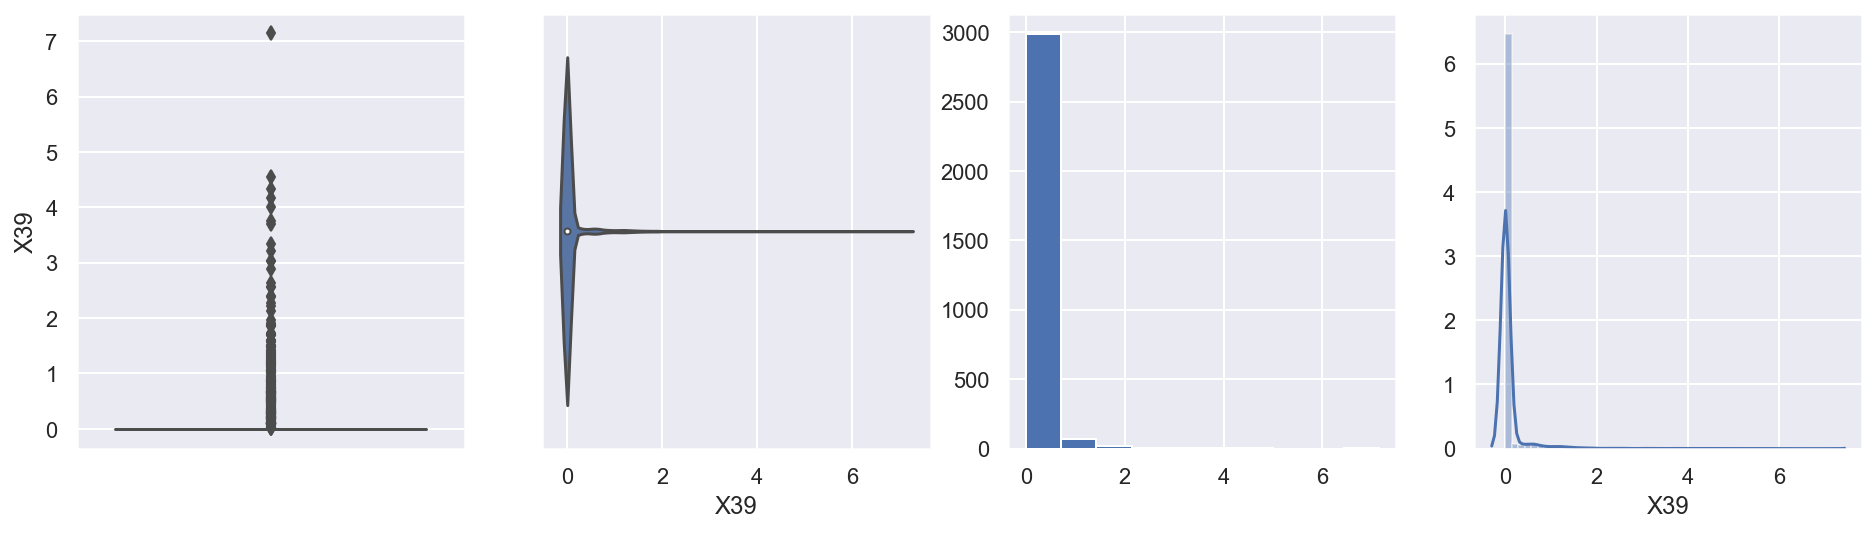

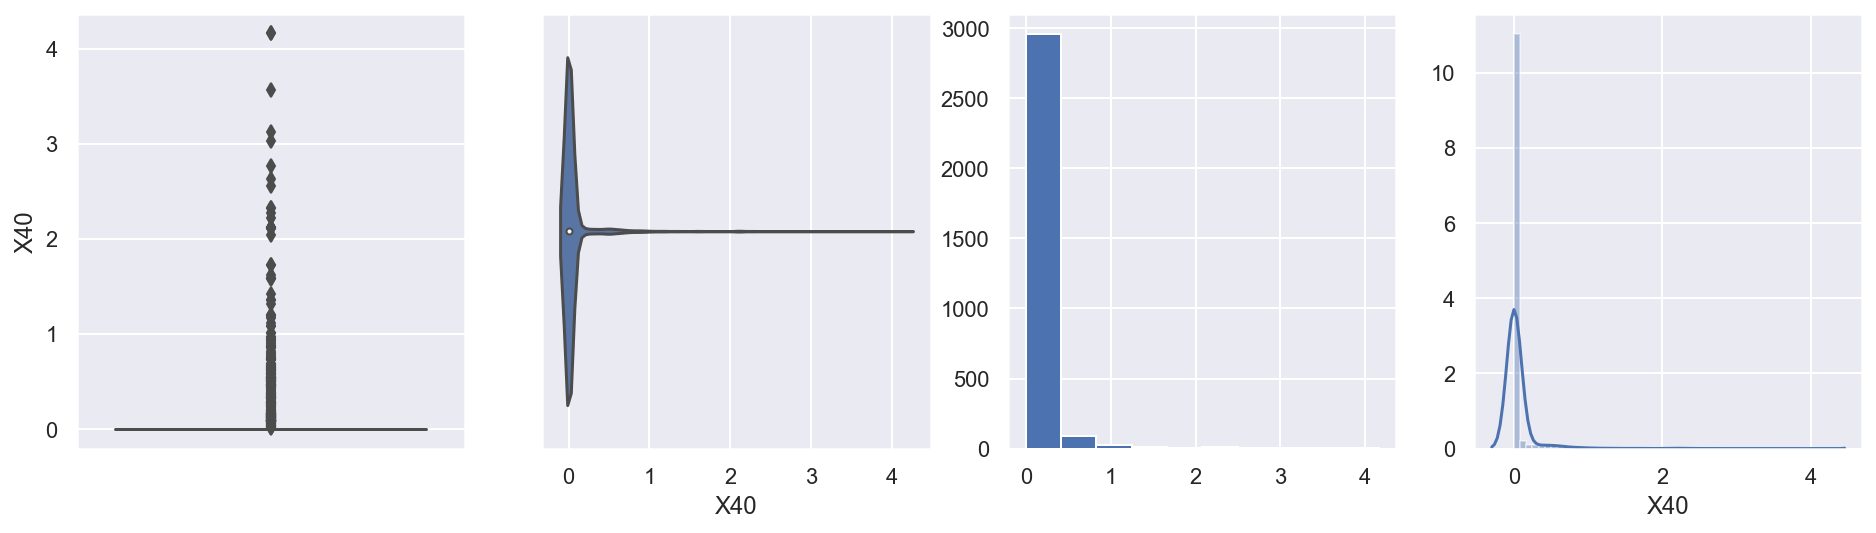

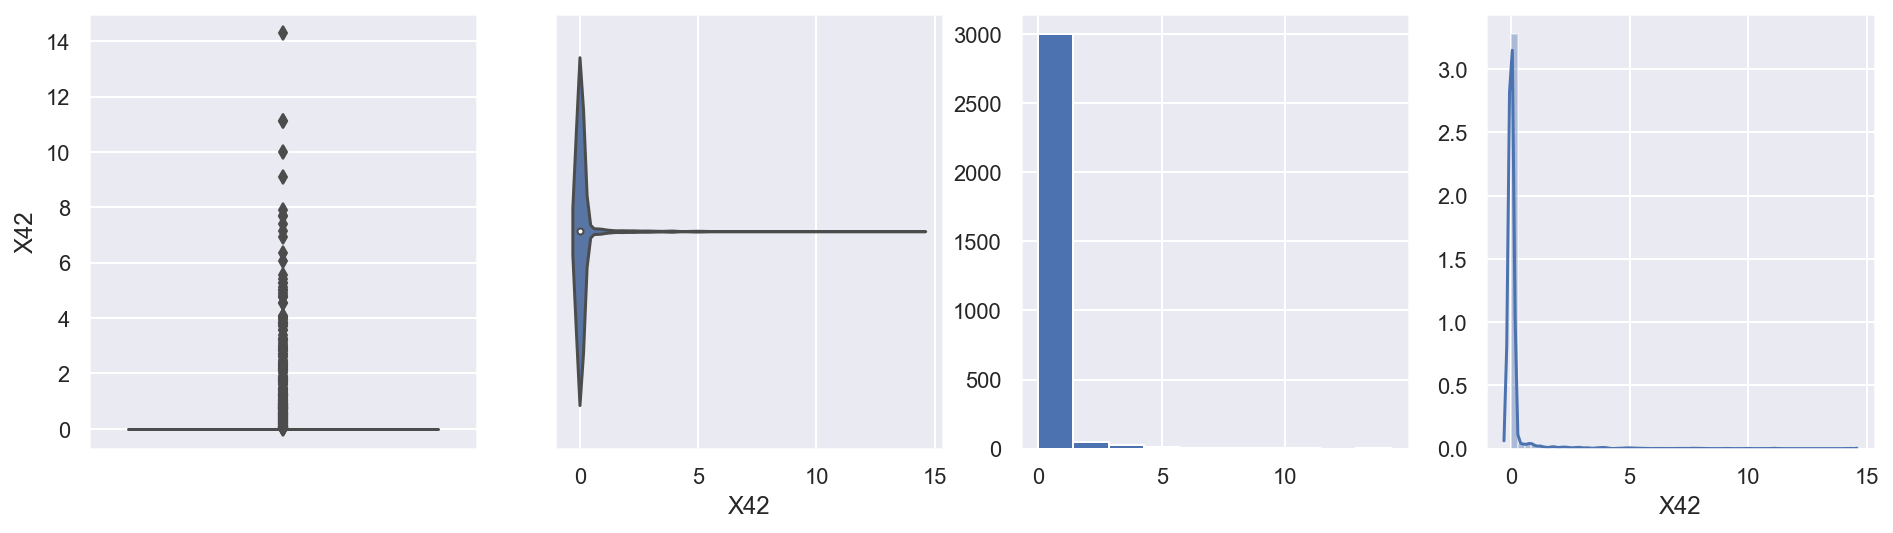

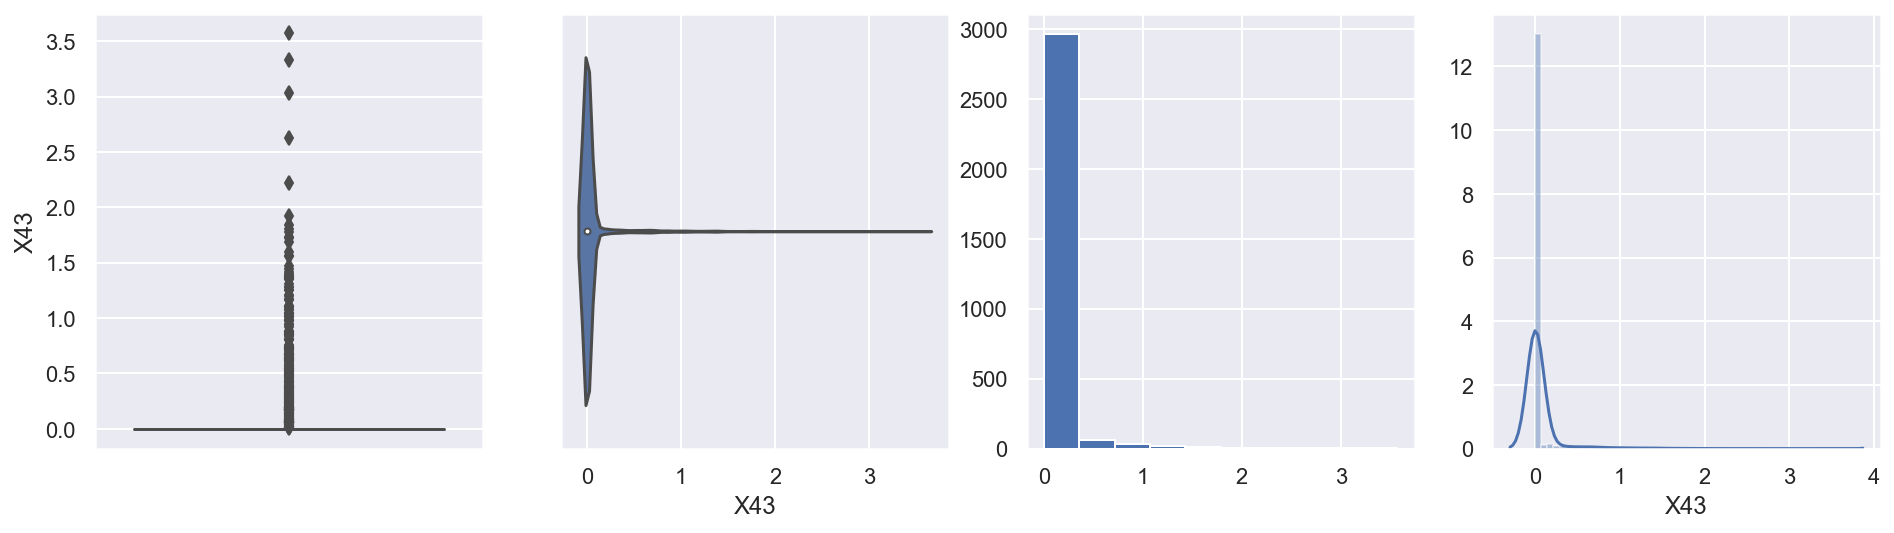

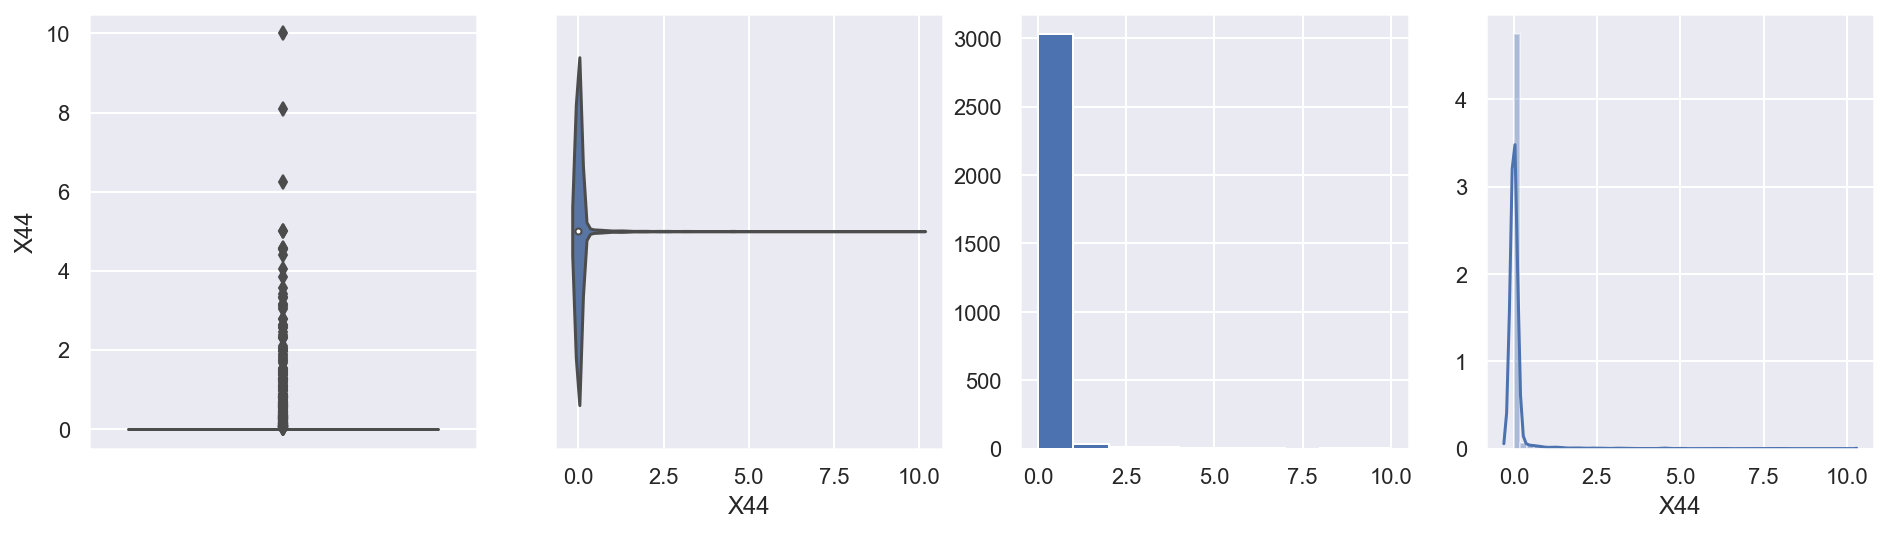

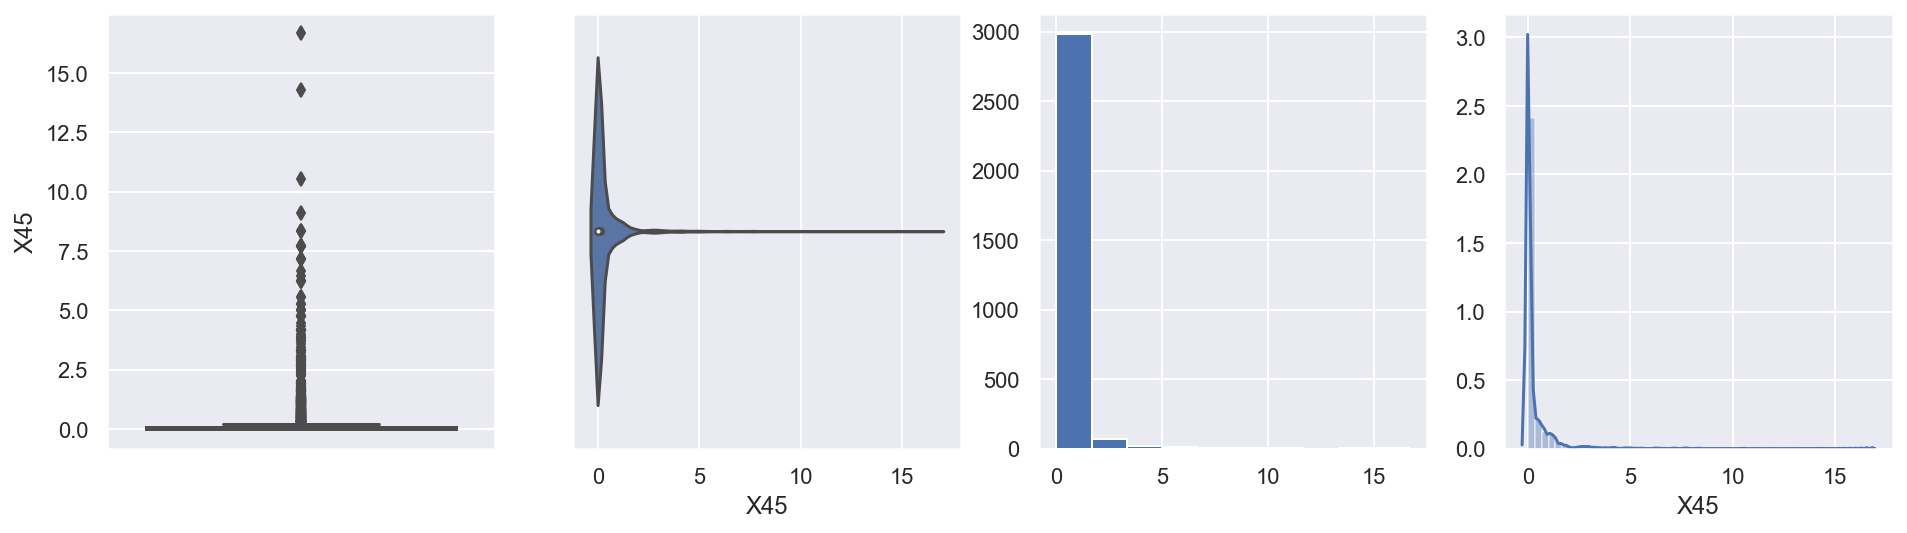

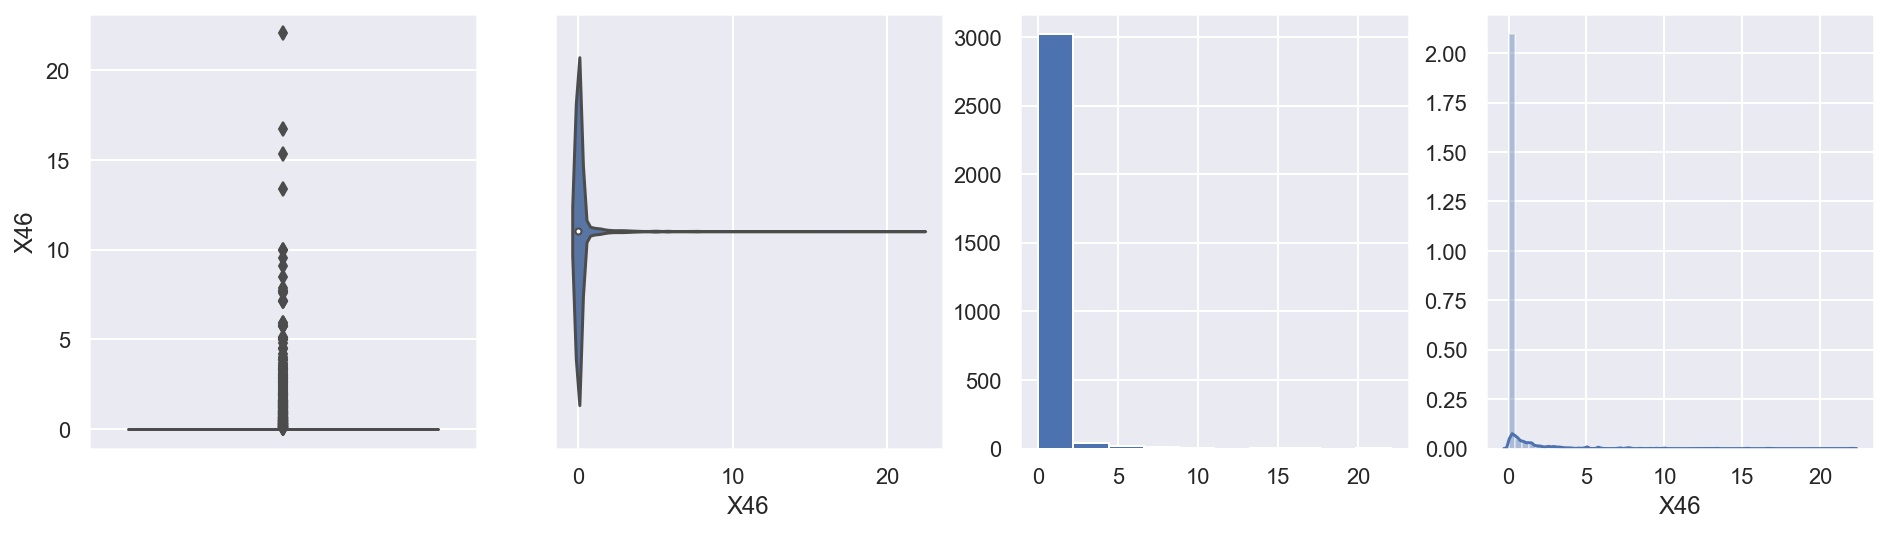

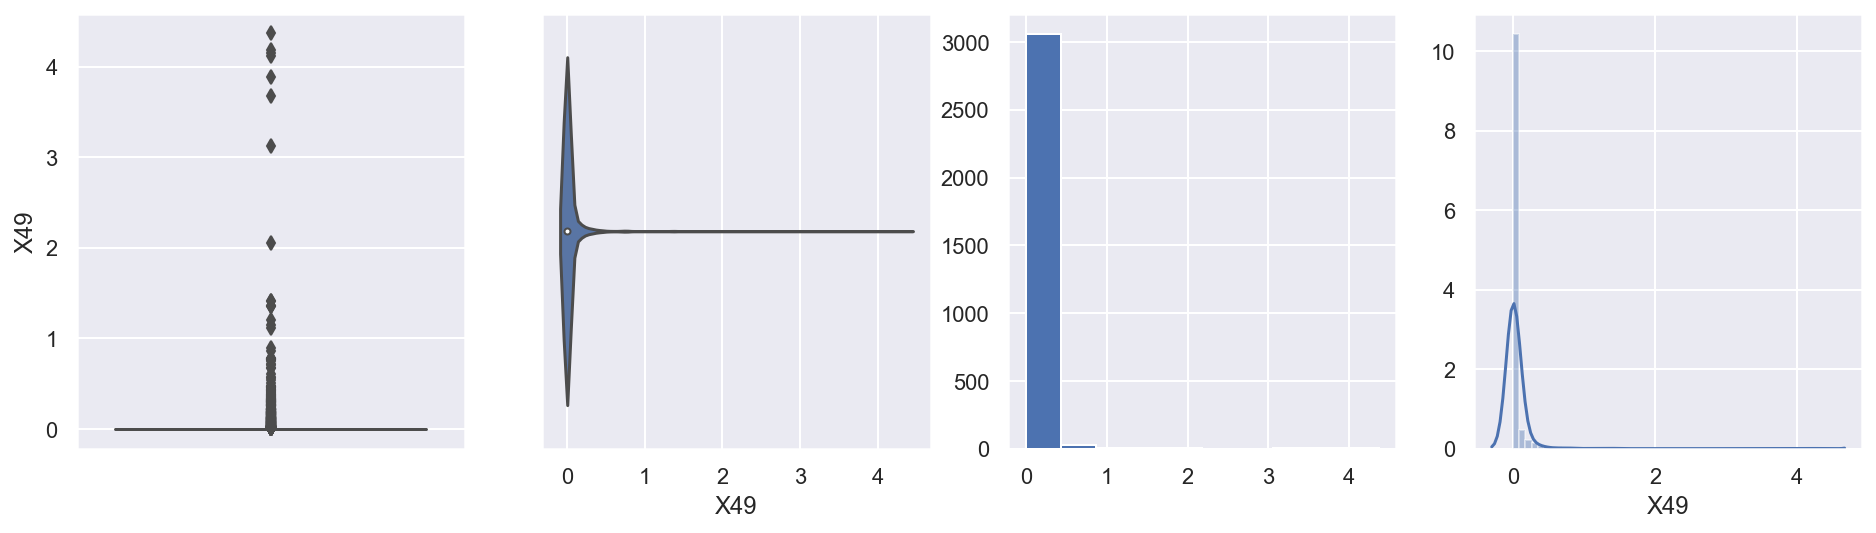

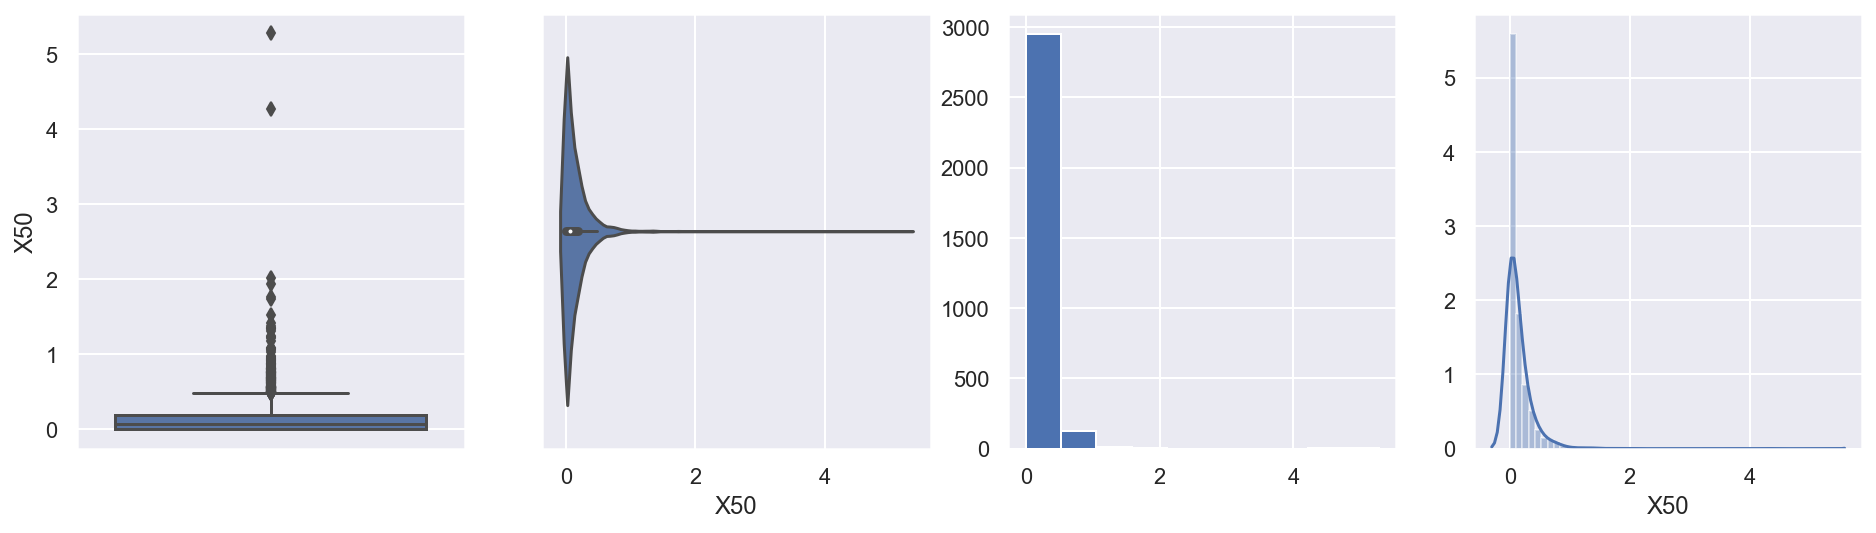

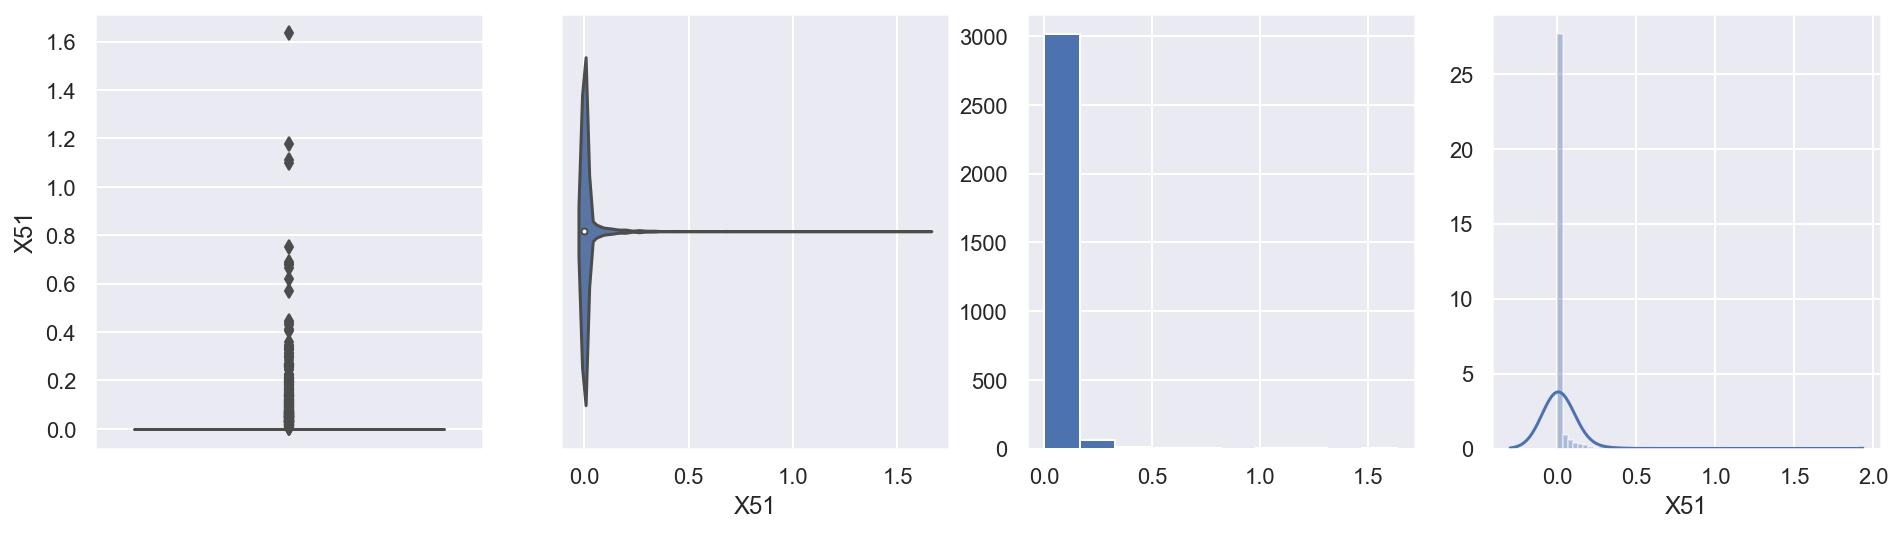

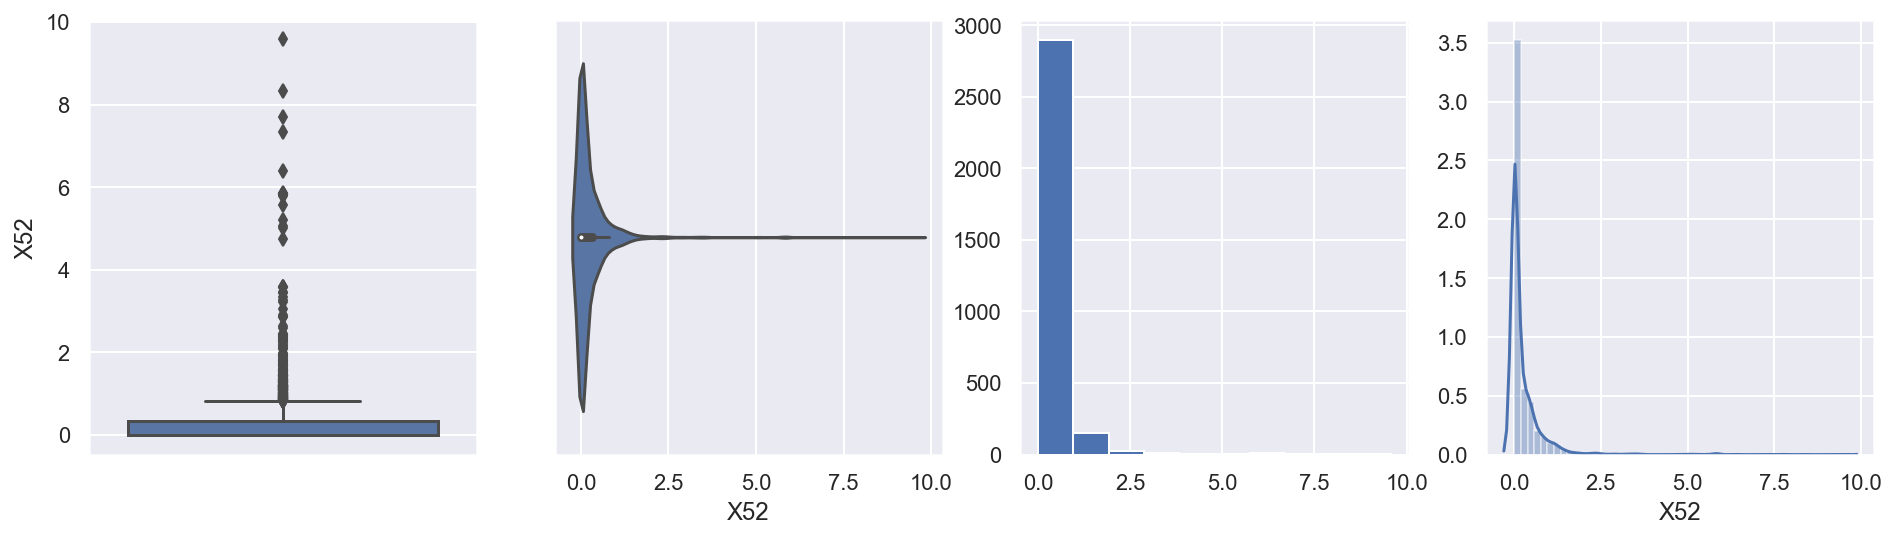

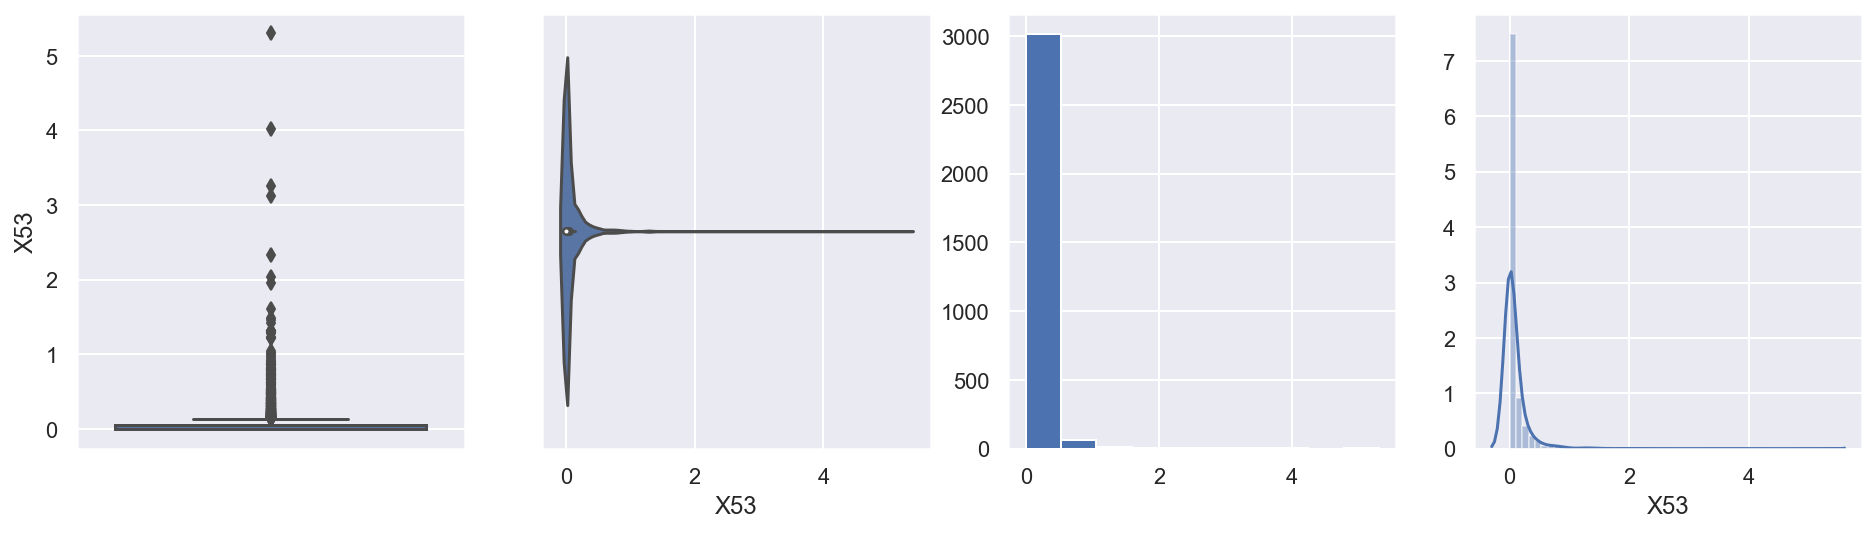

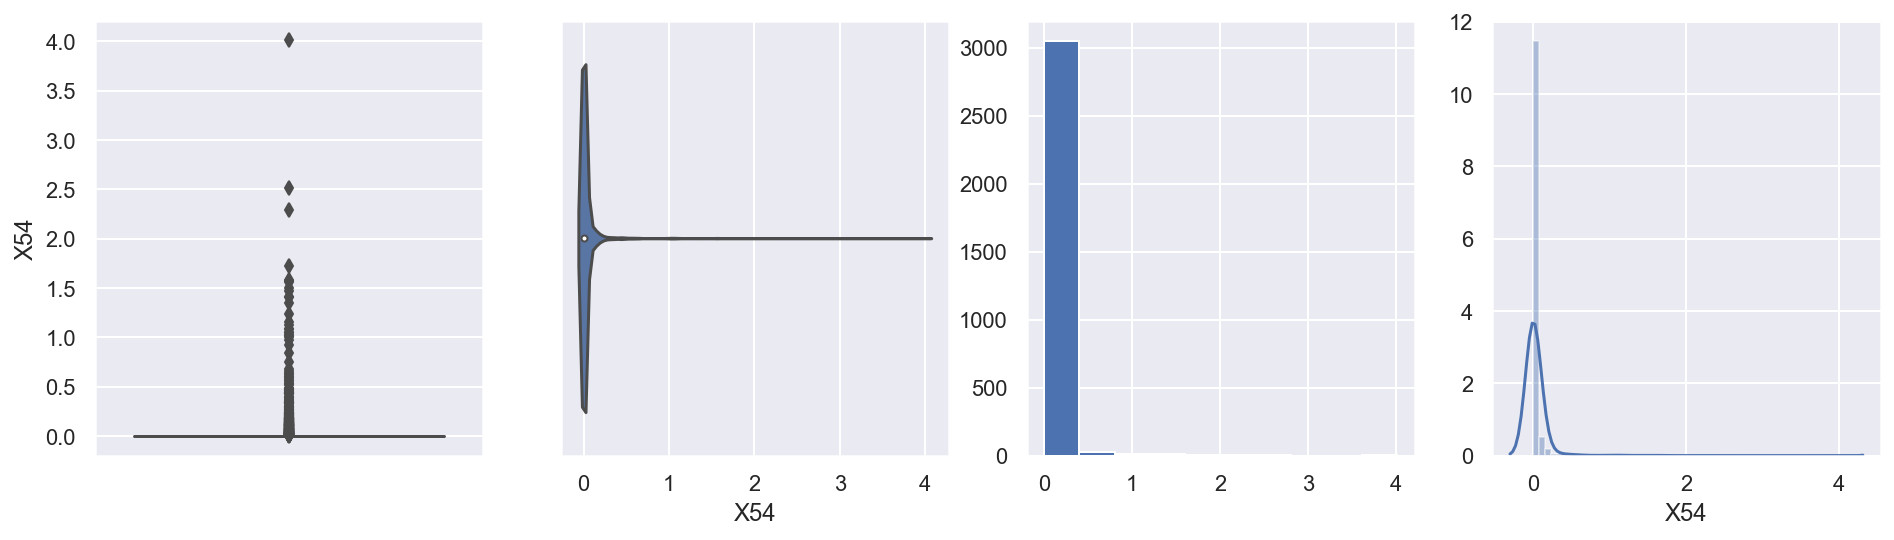

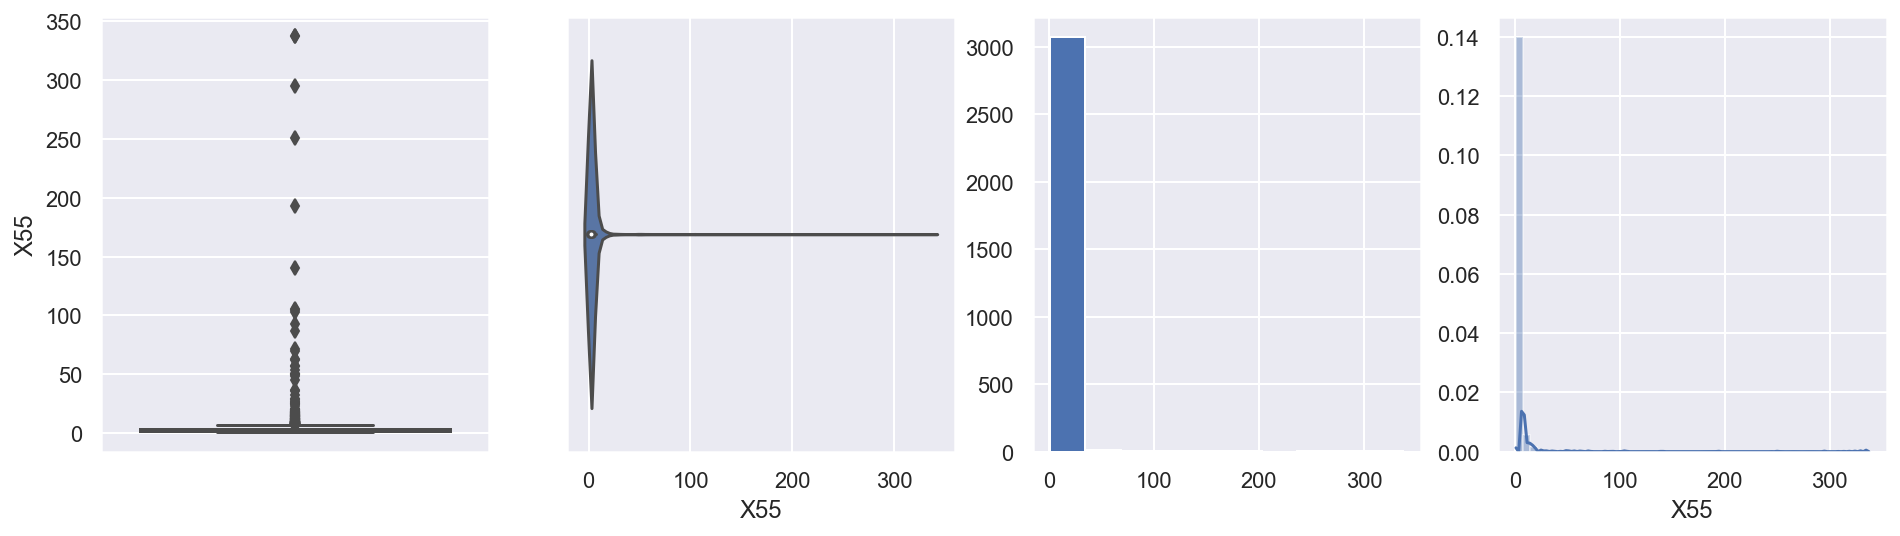

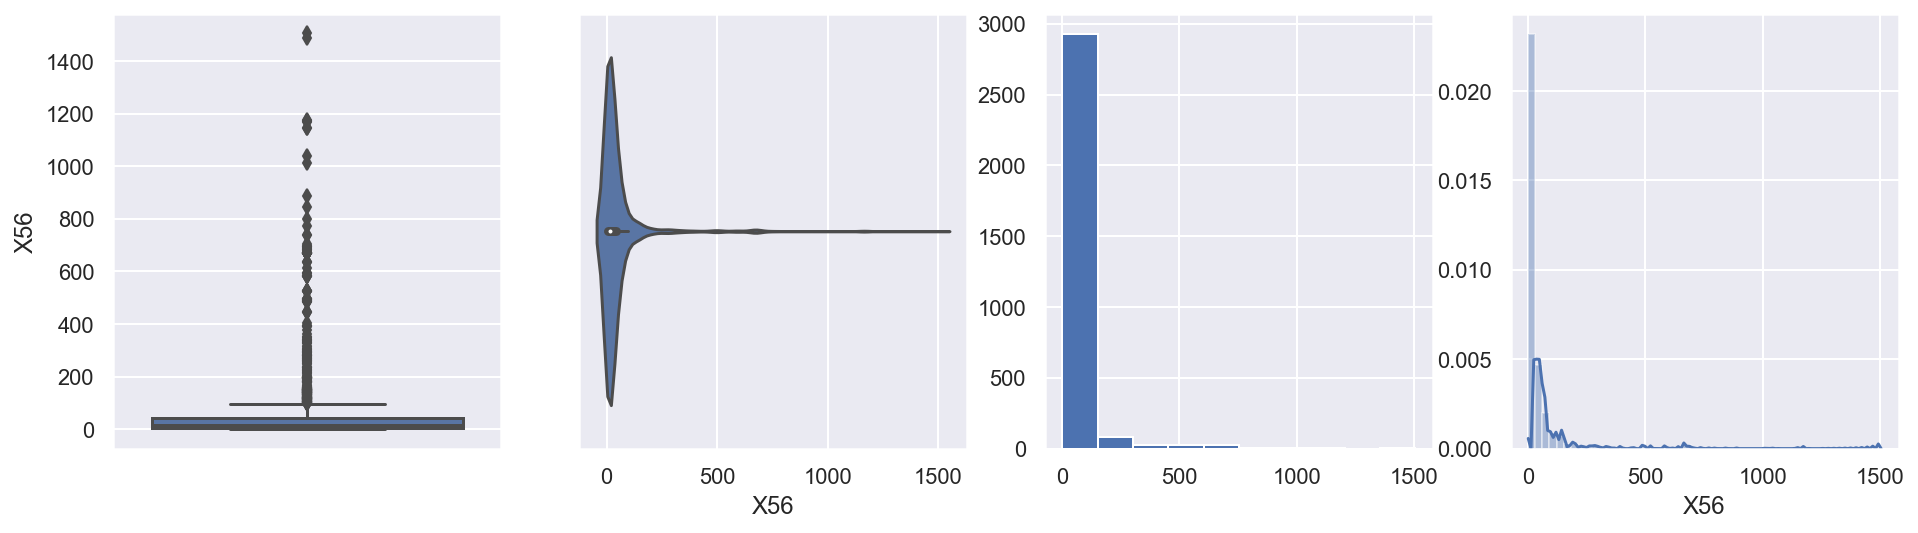

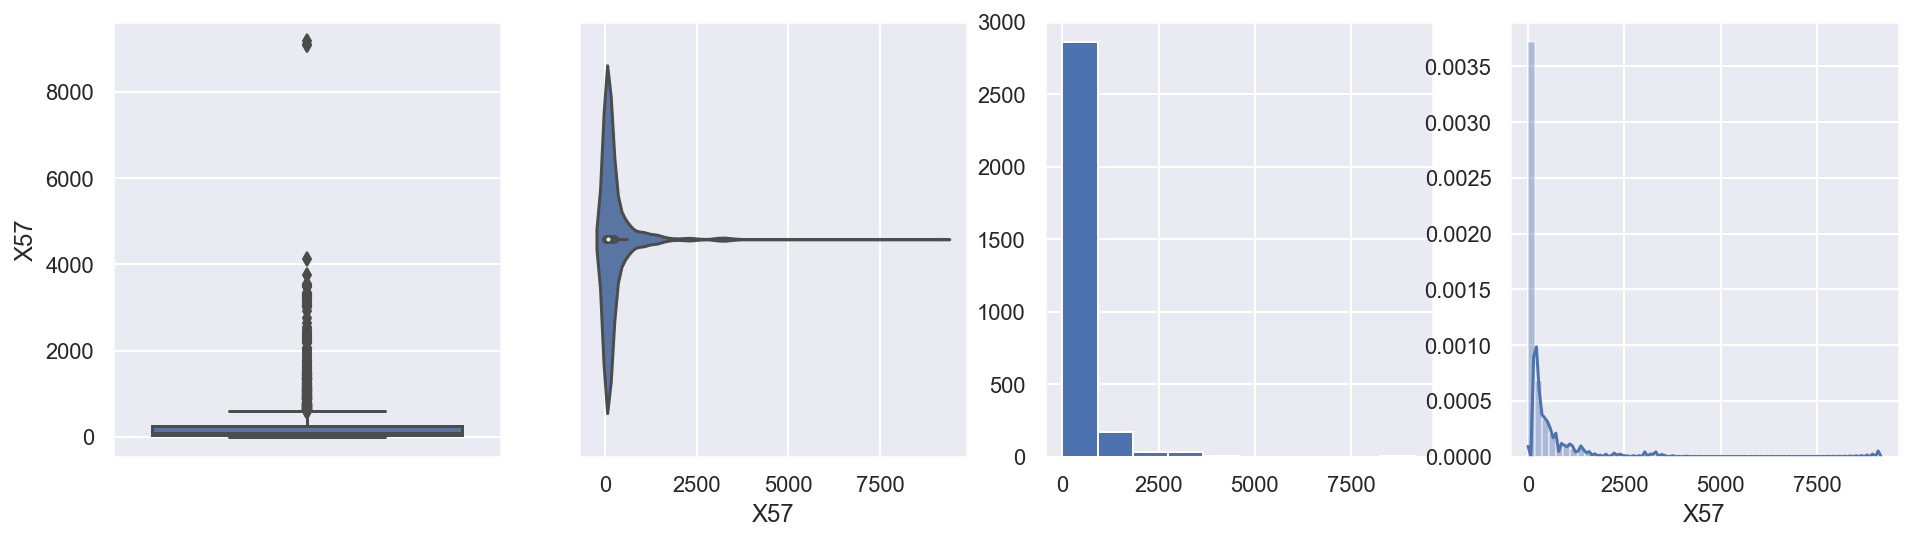

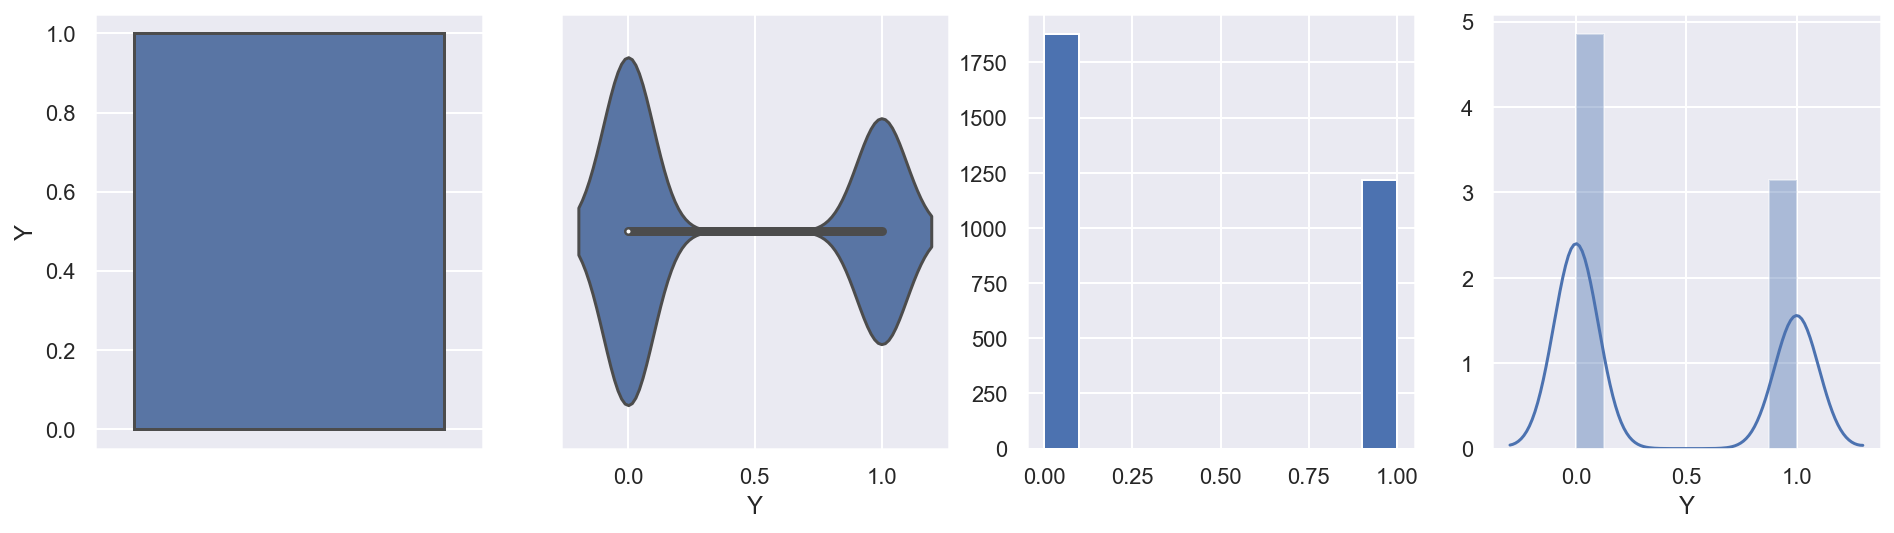

In [55]:
# Distribution as histograms
for col in train.keys():
    Conti_Subplots(train, col)

### Segmented Univariate Data Analysis

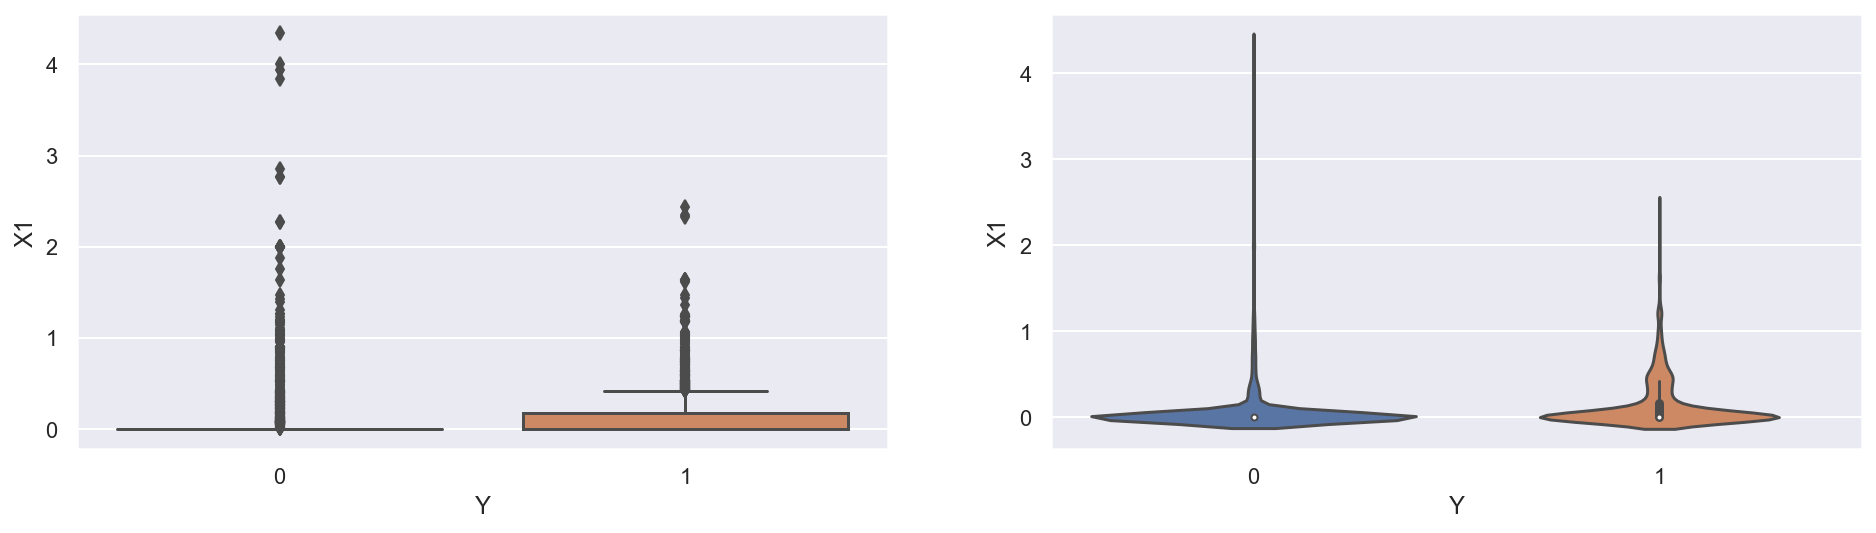

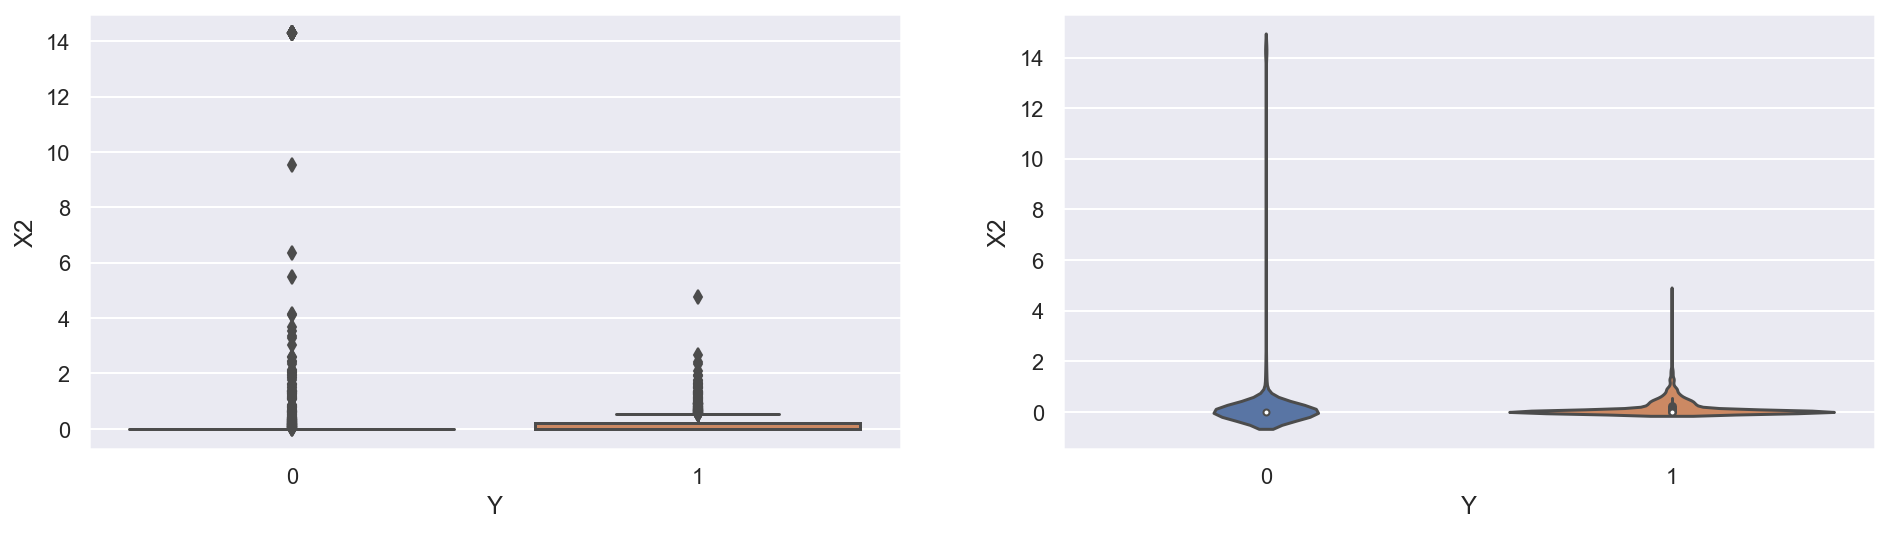

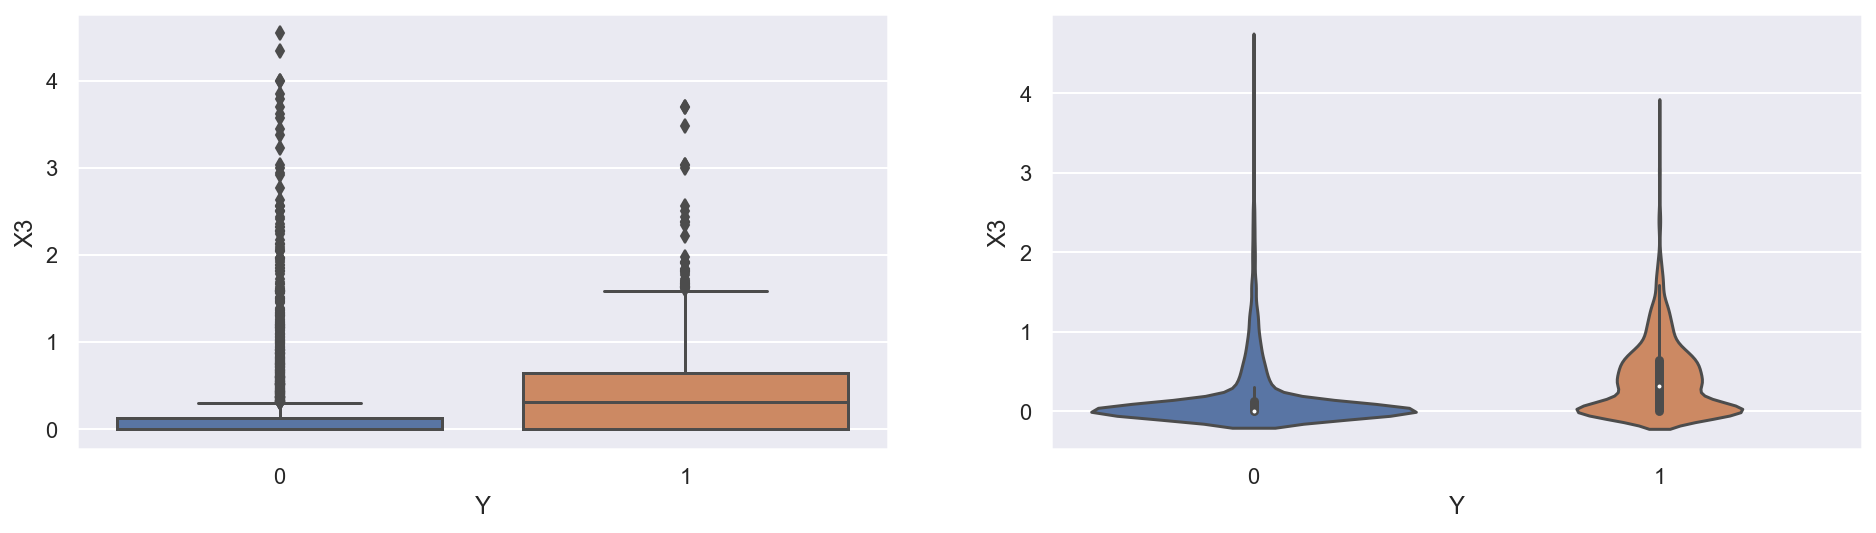

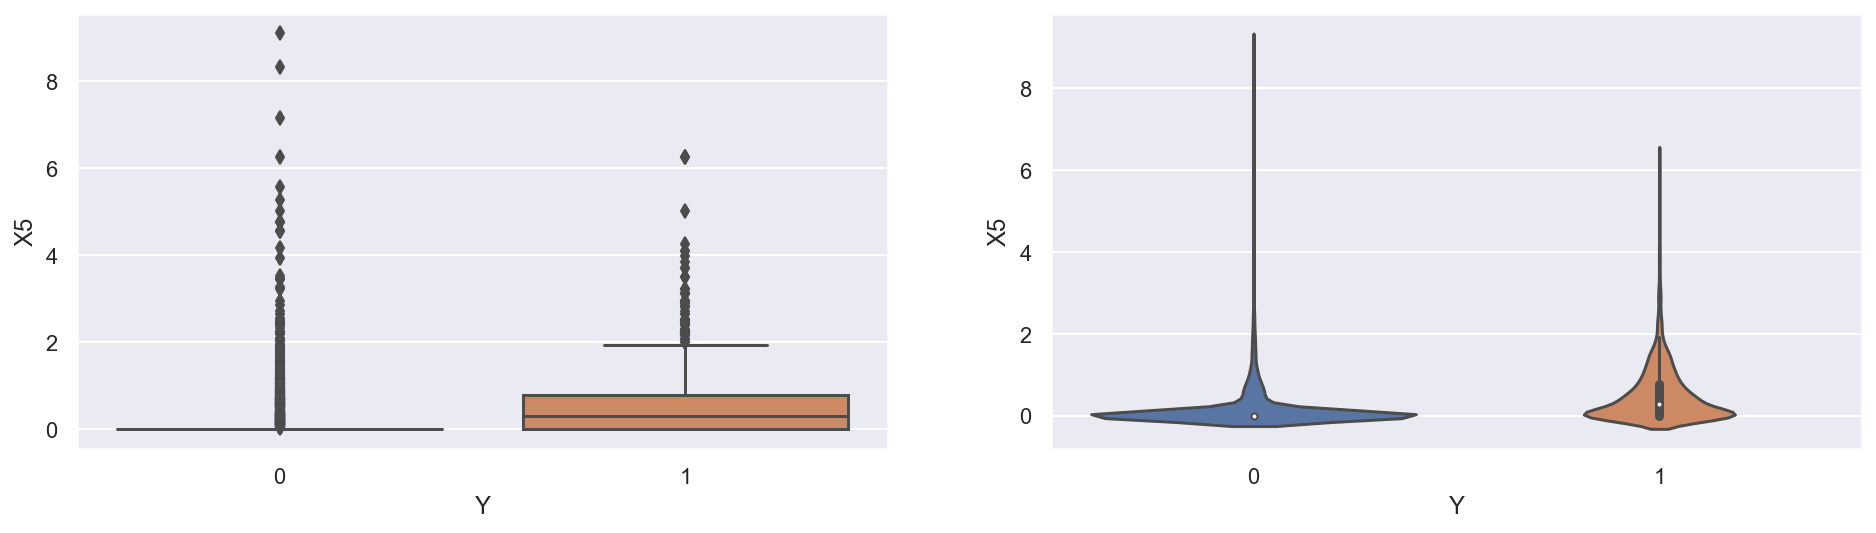

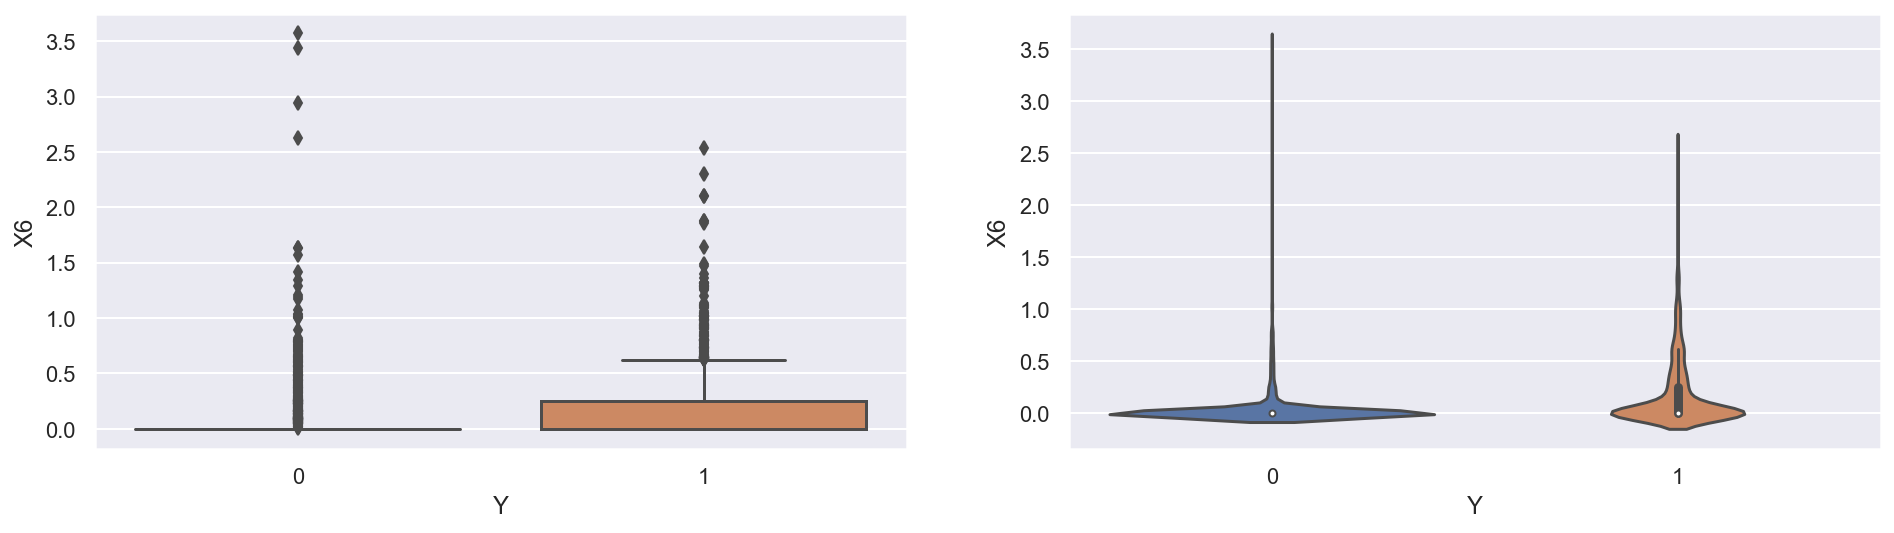

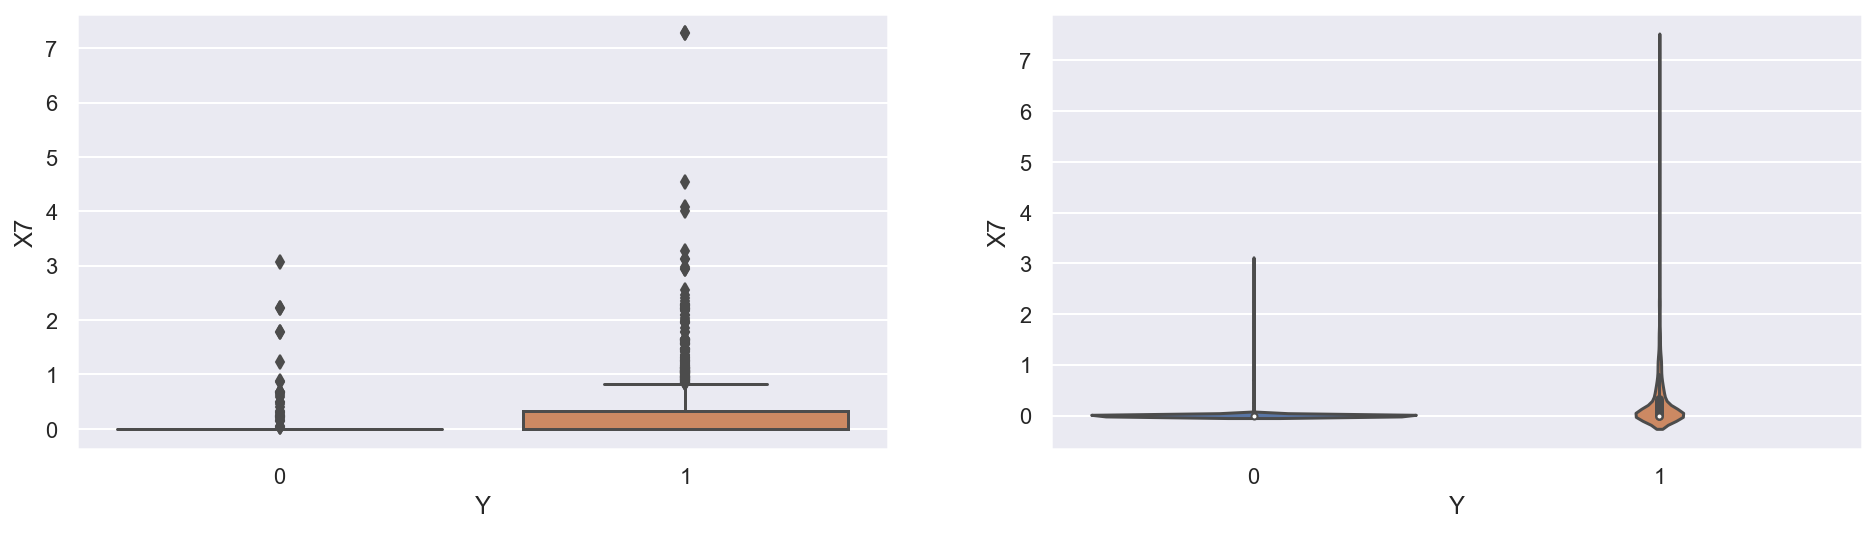

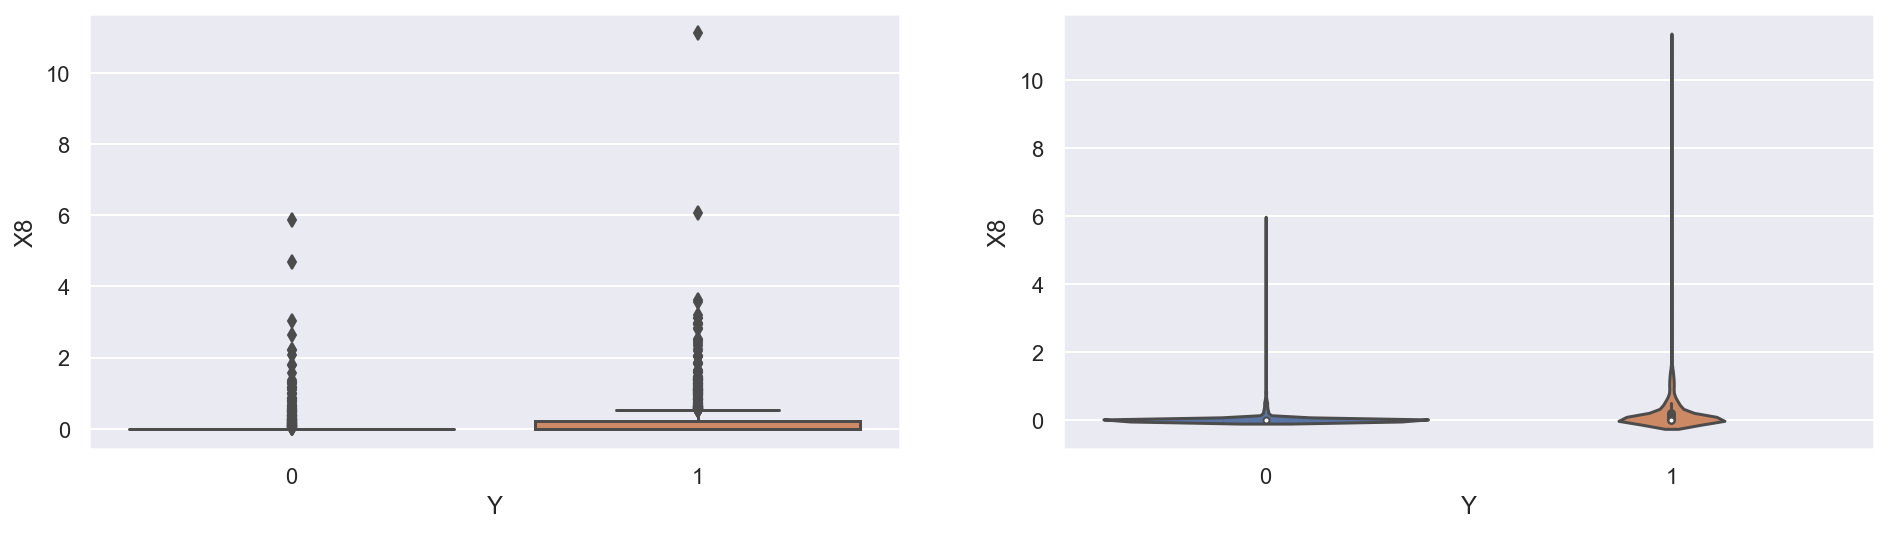

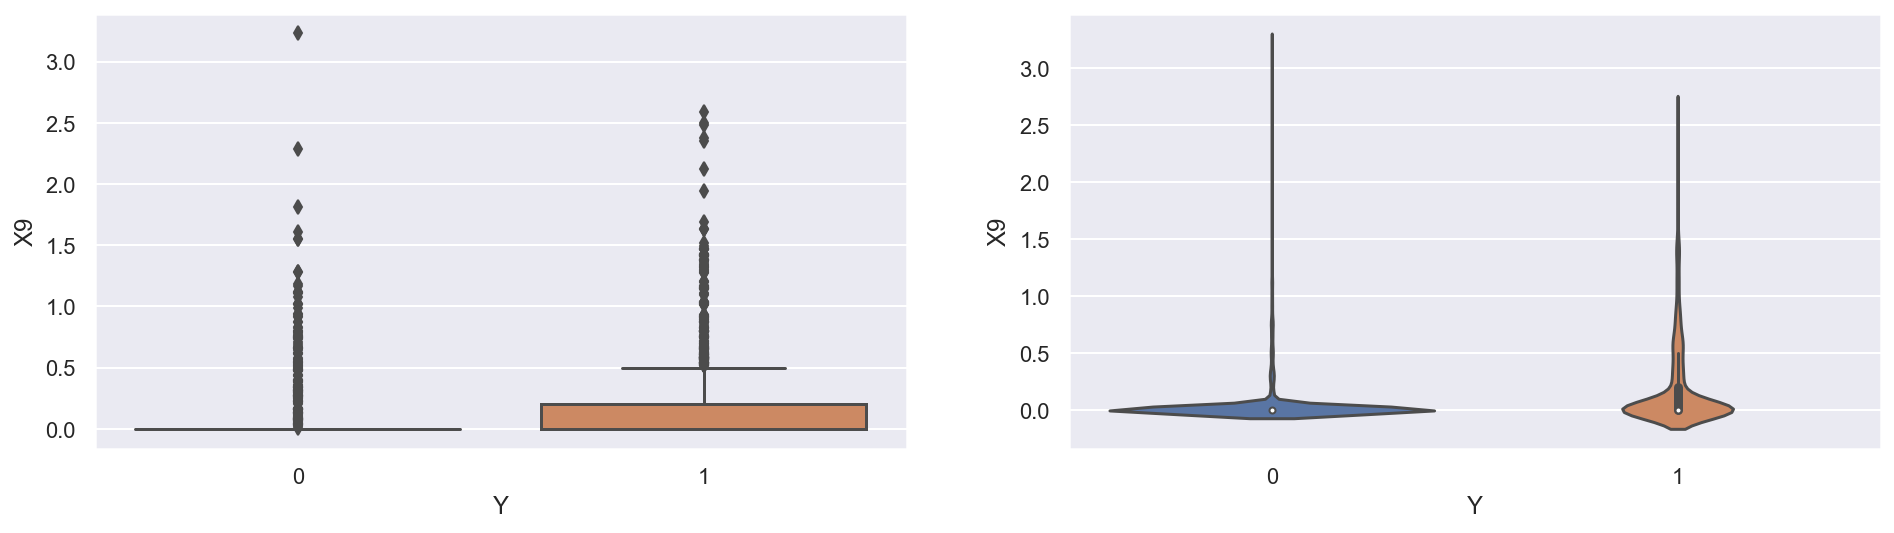

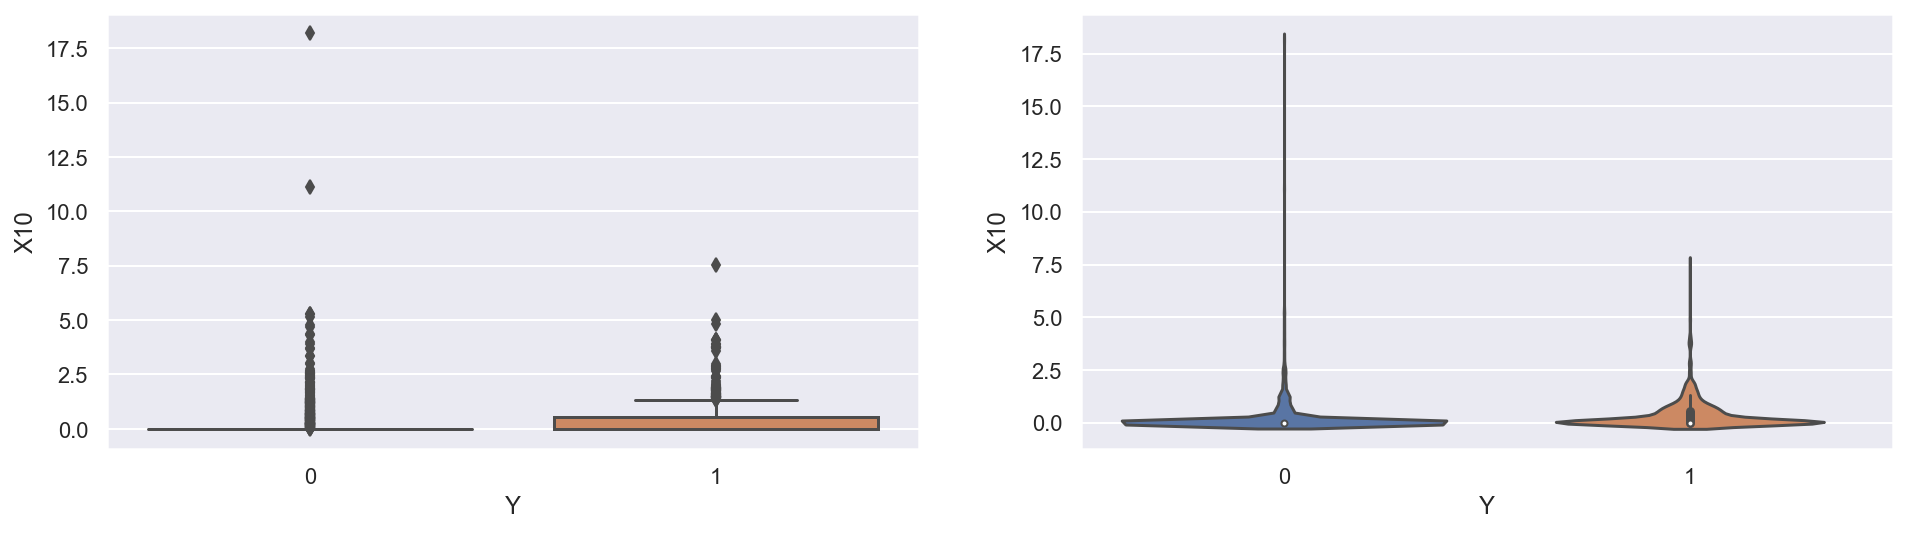

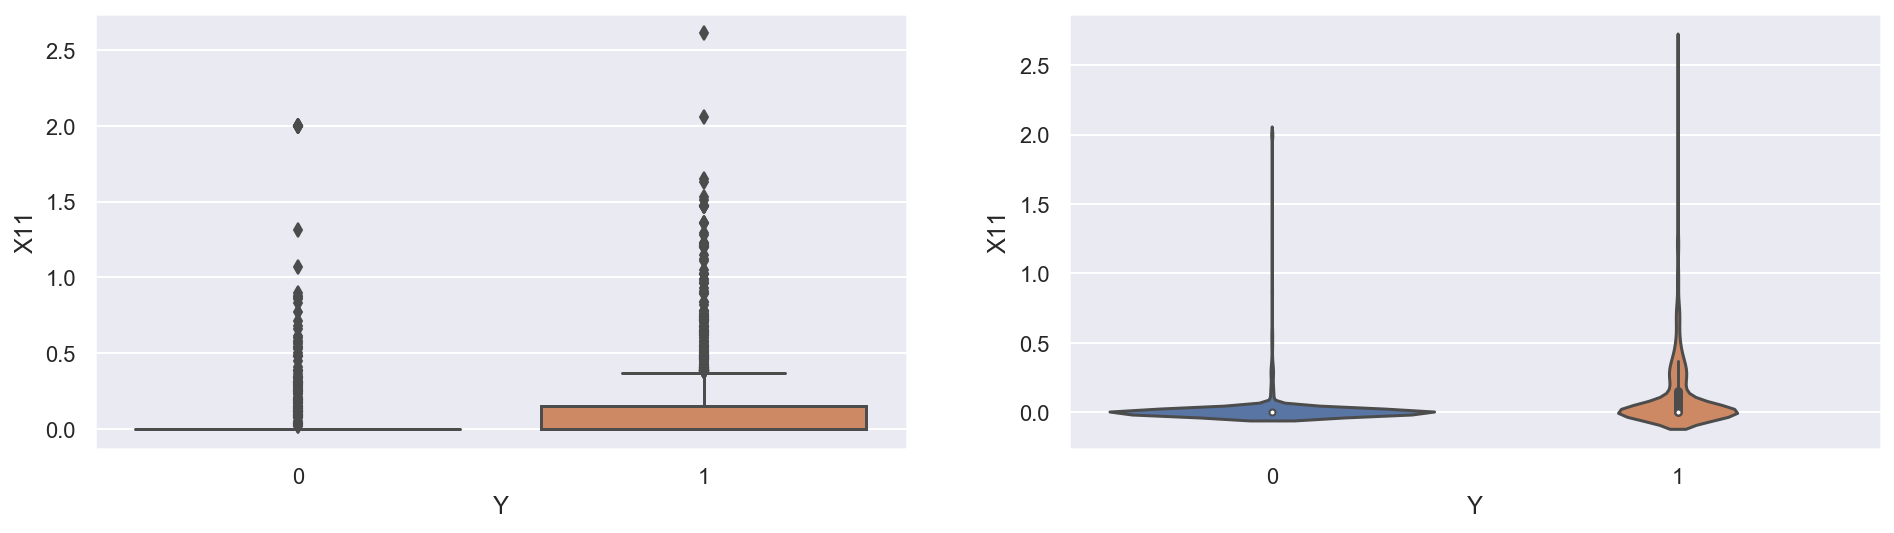

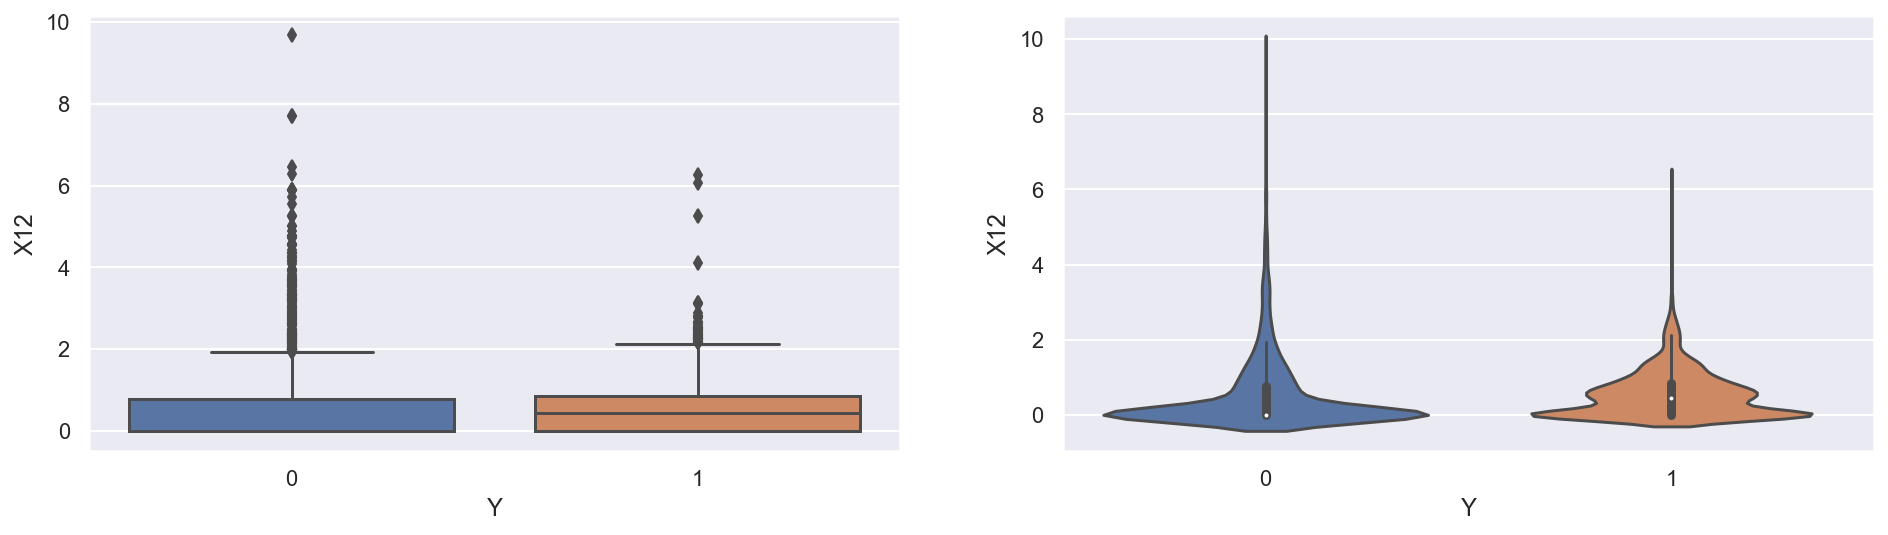

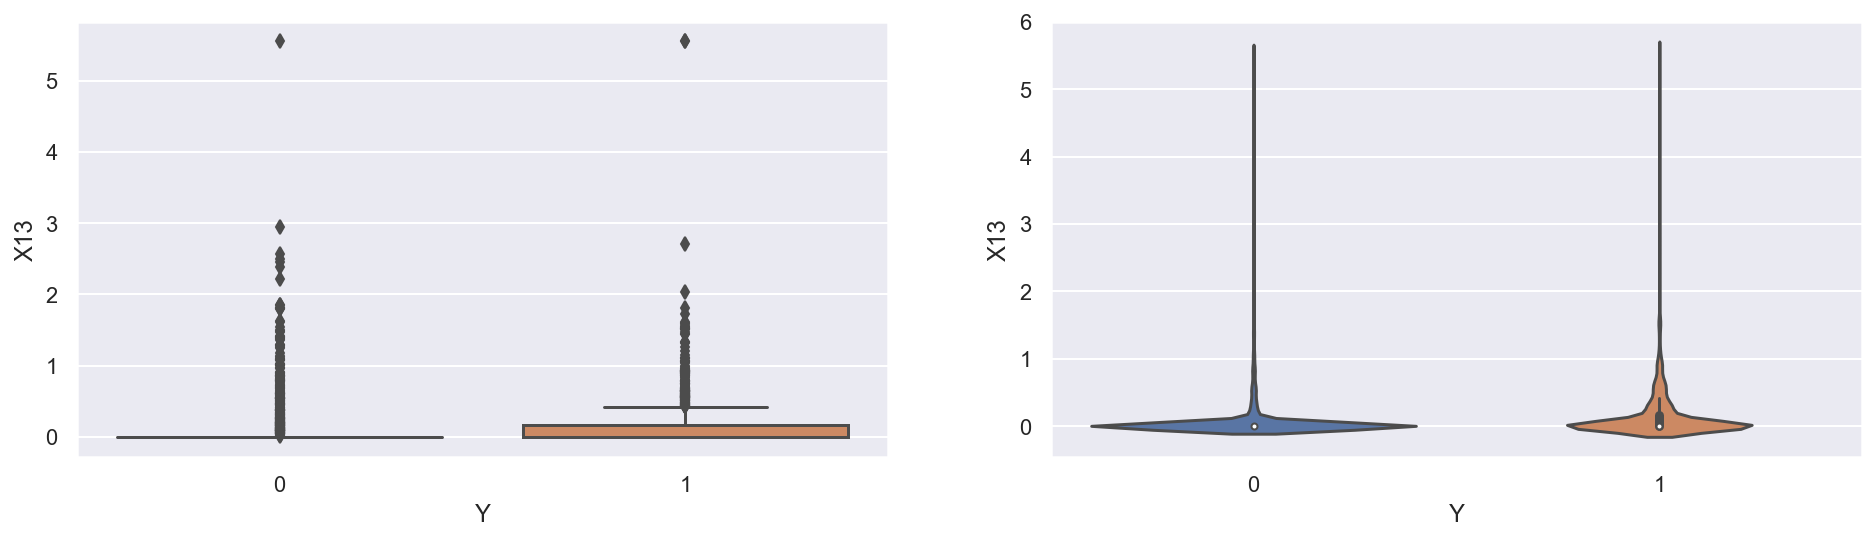

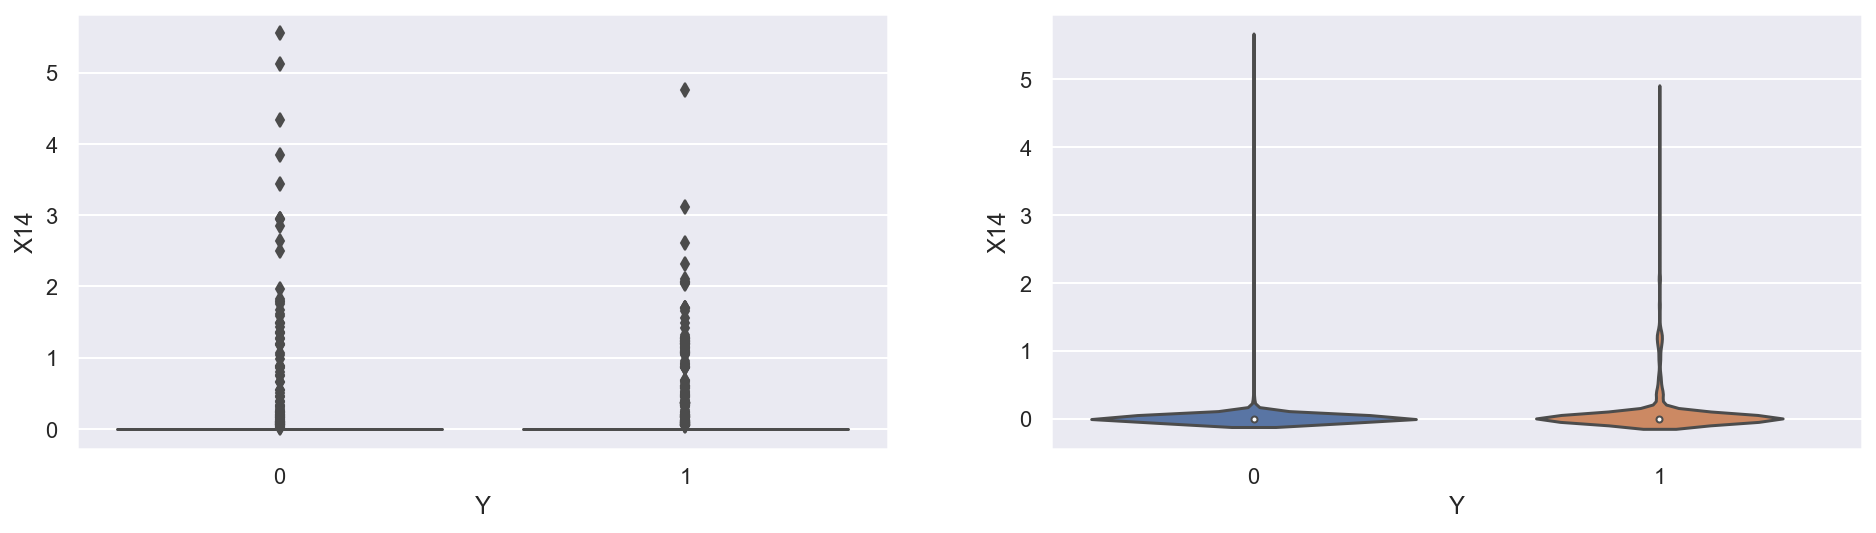

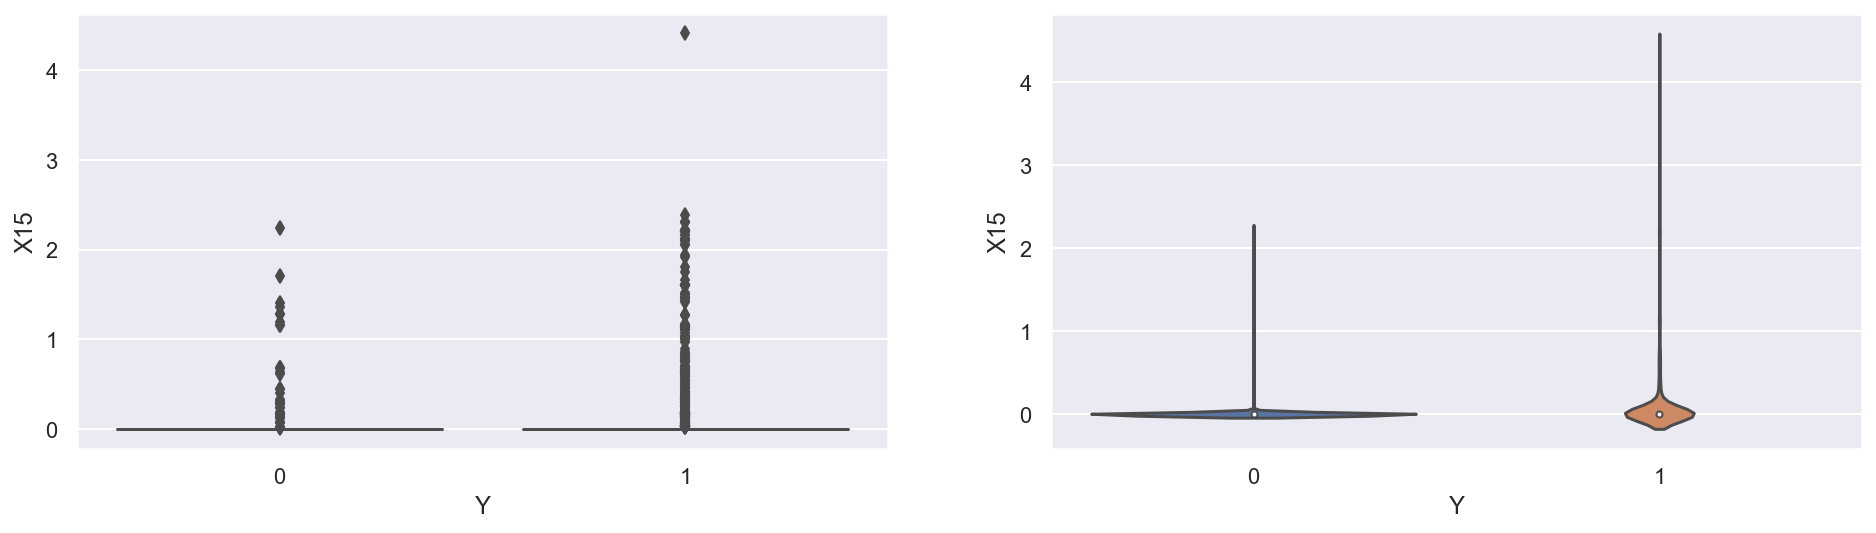

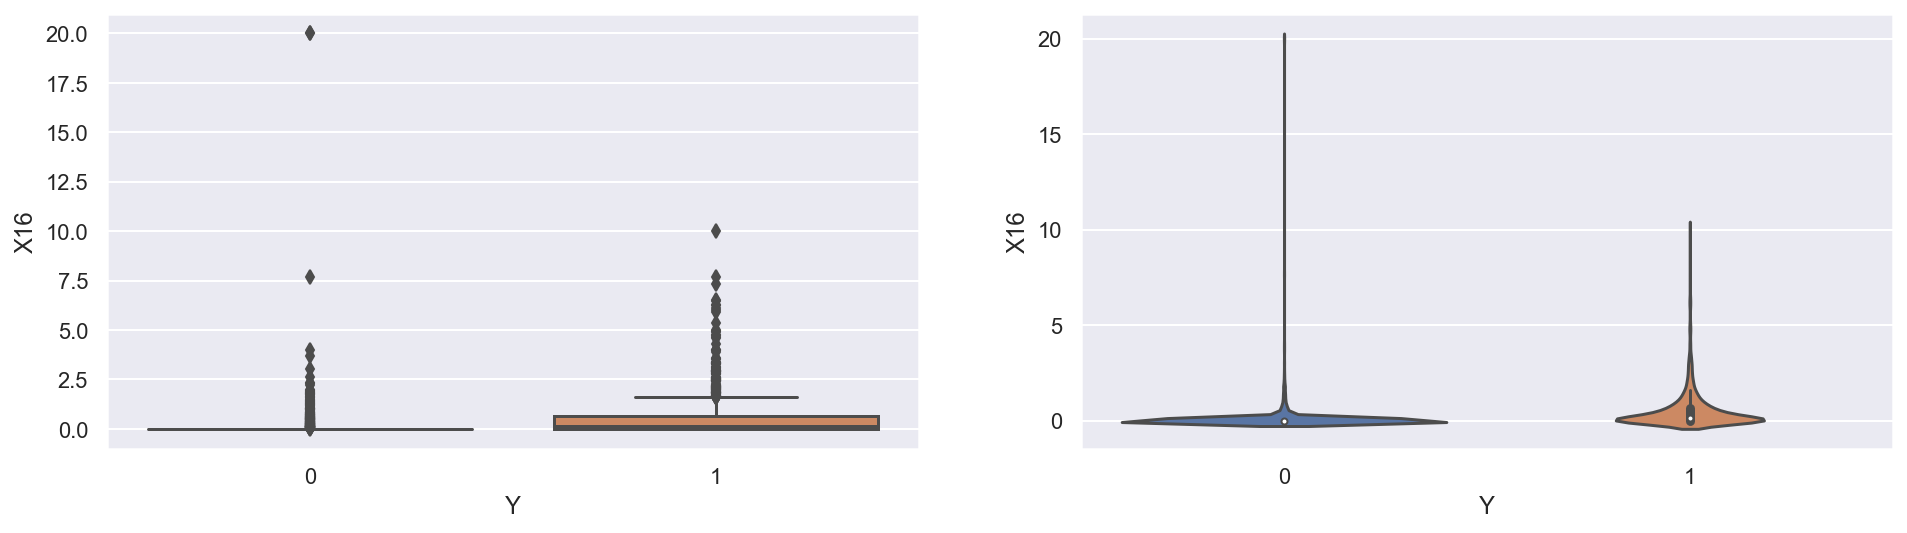

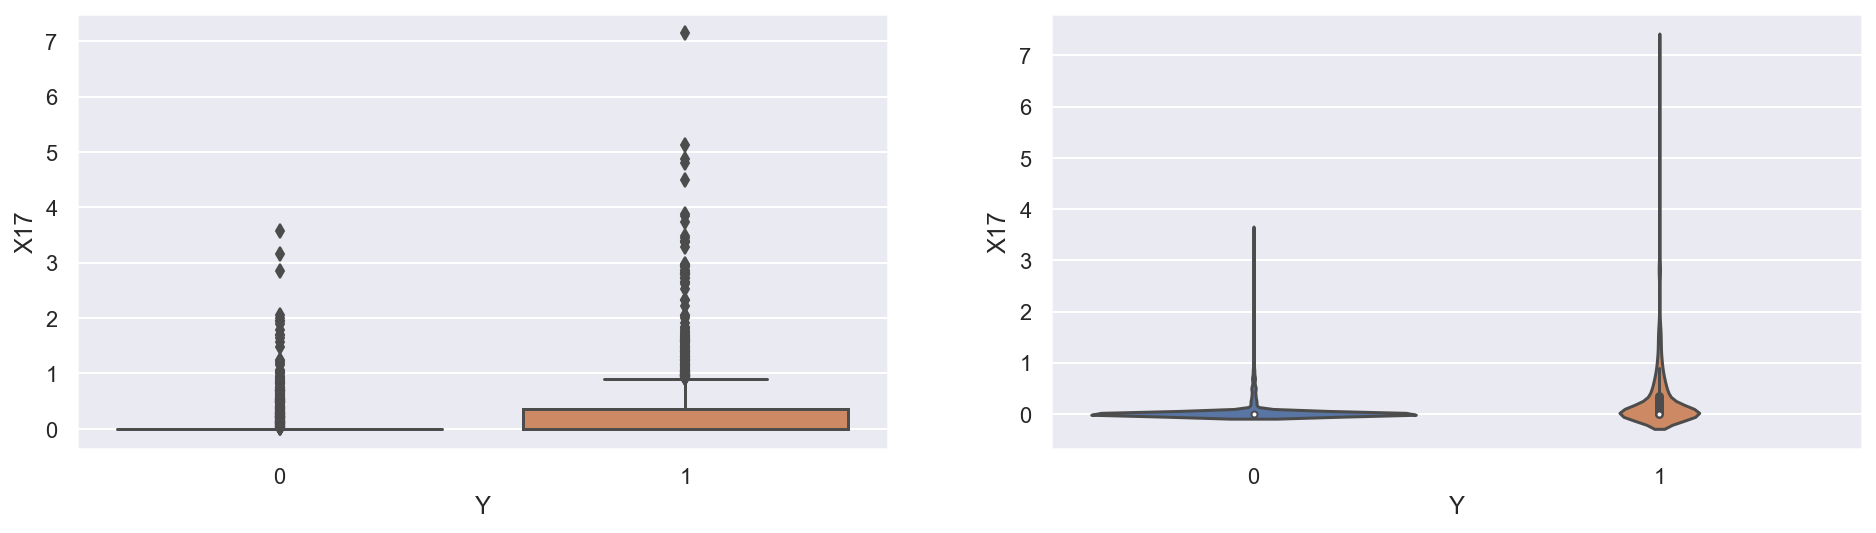

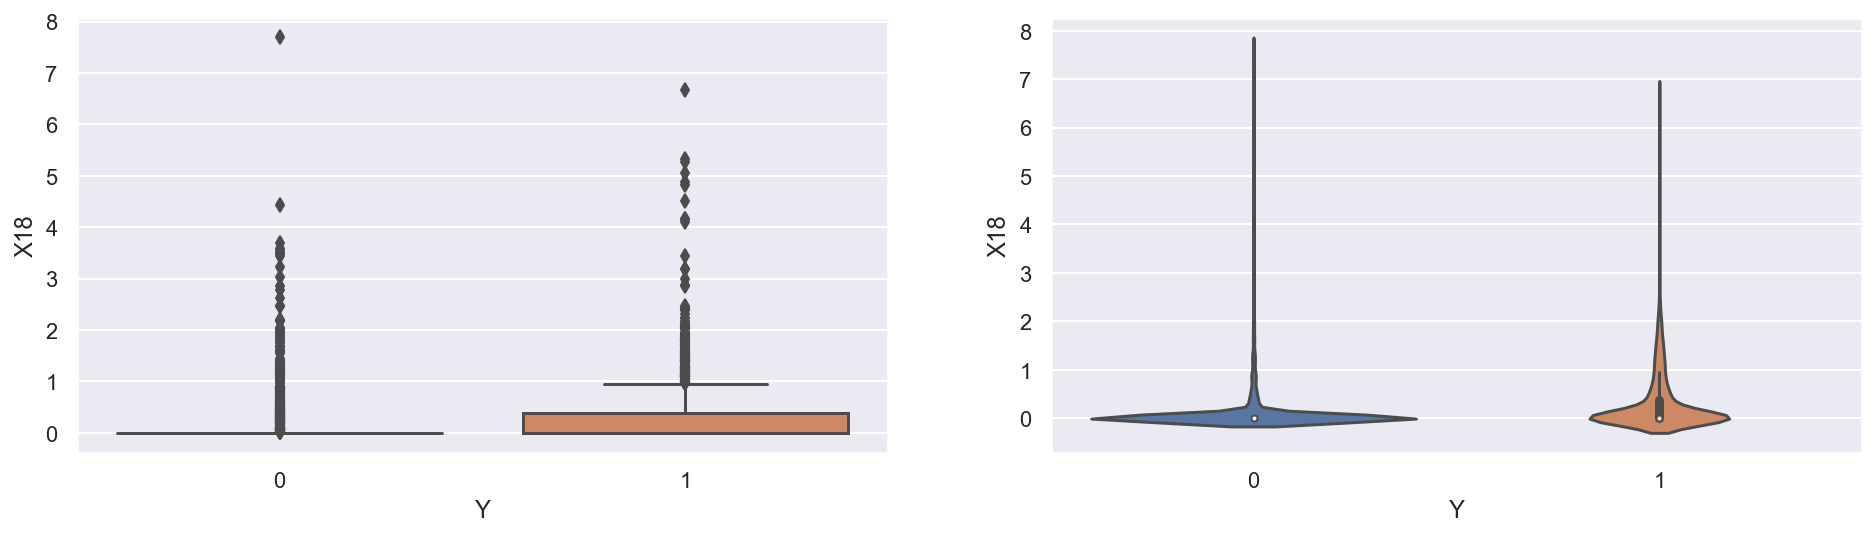

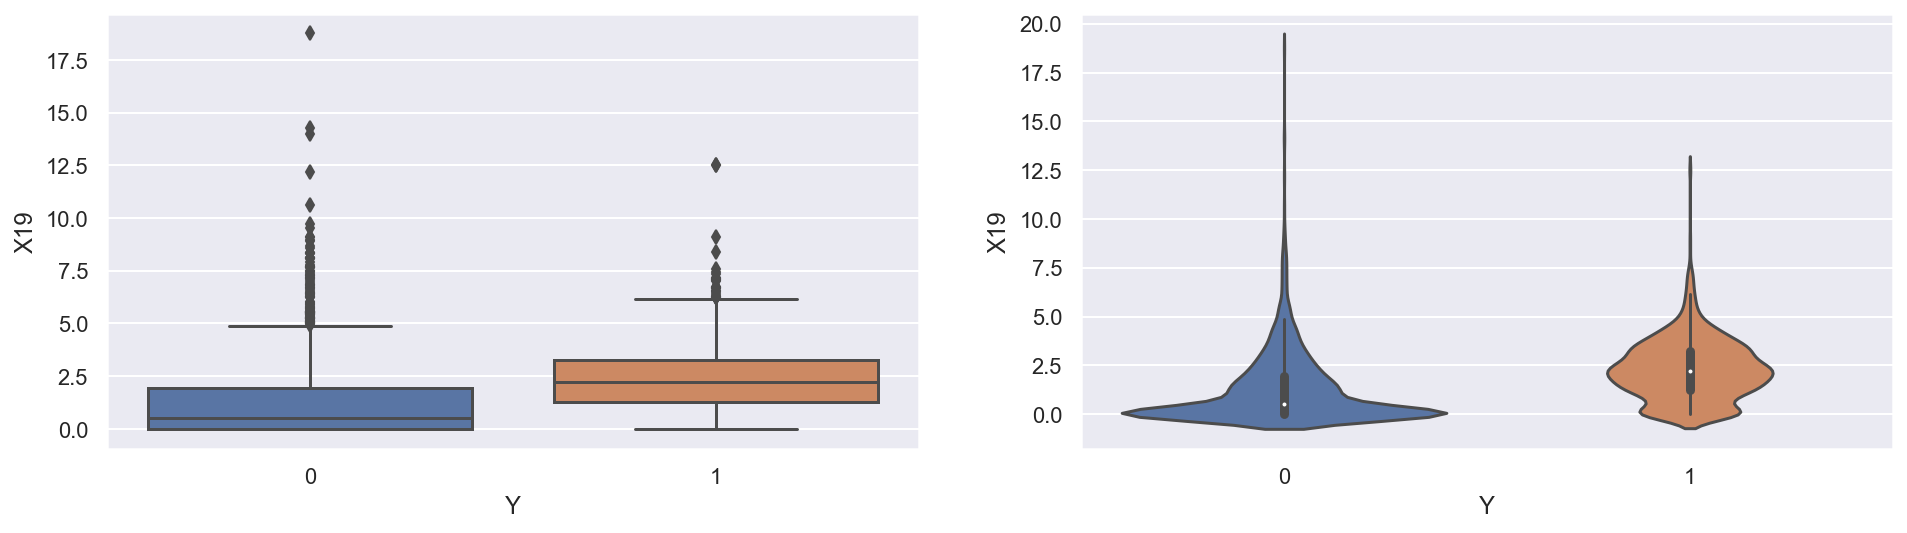

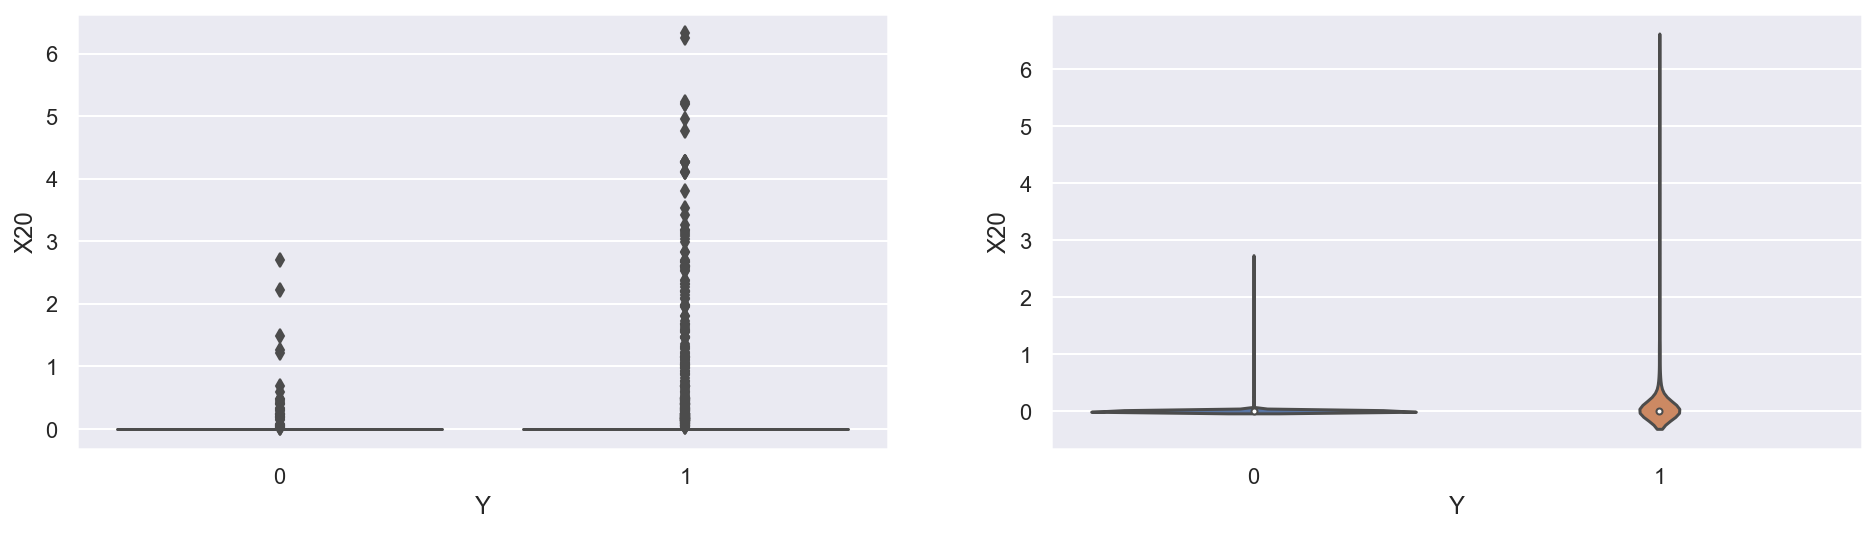

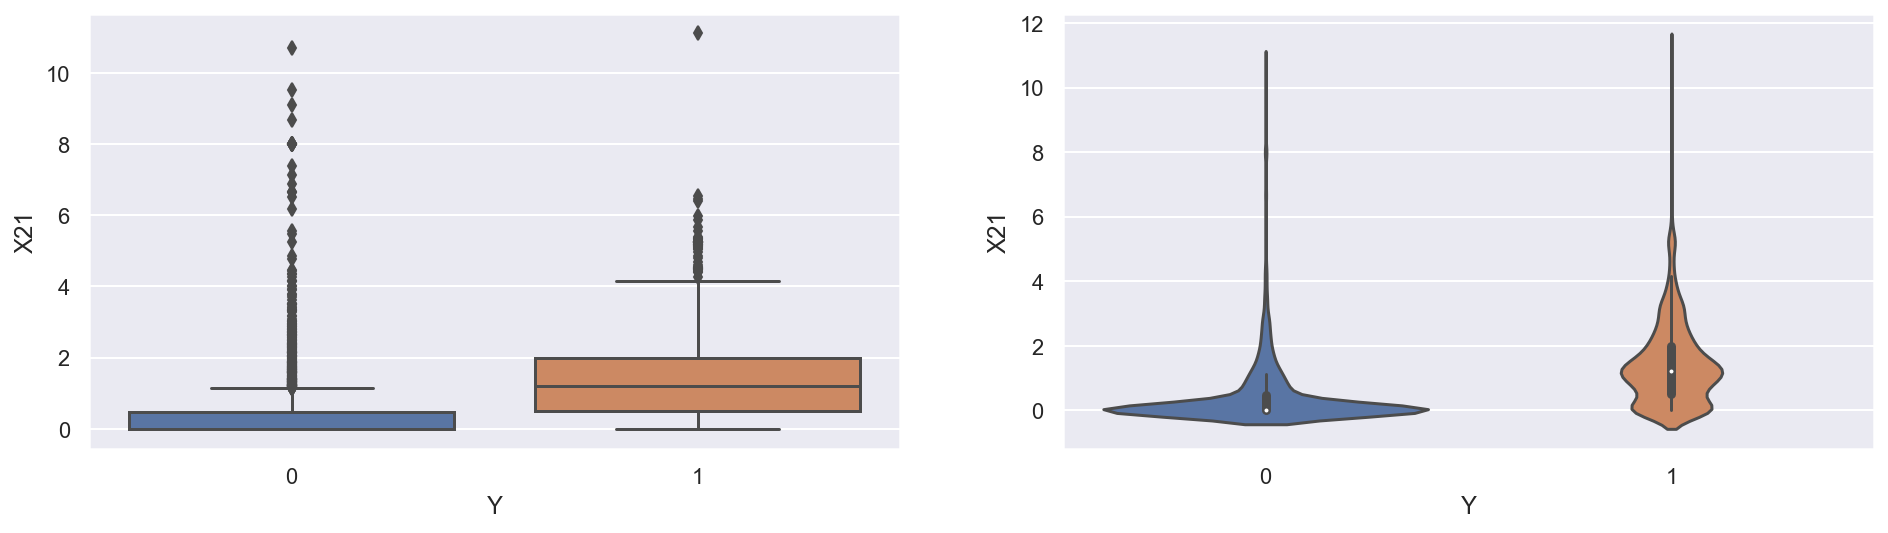

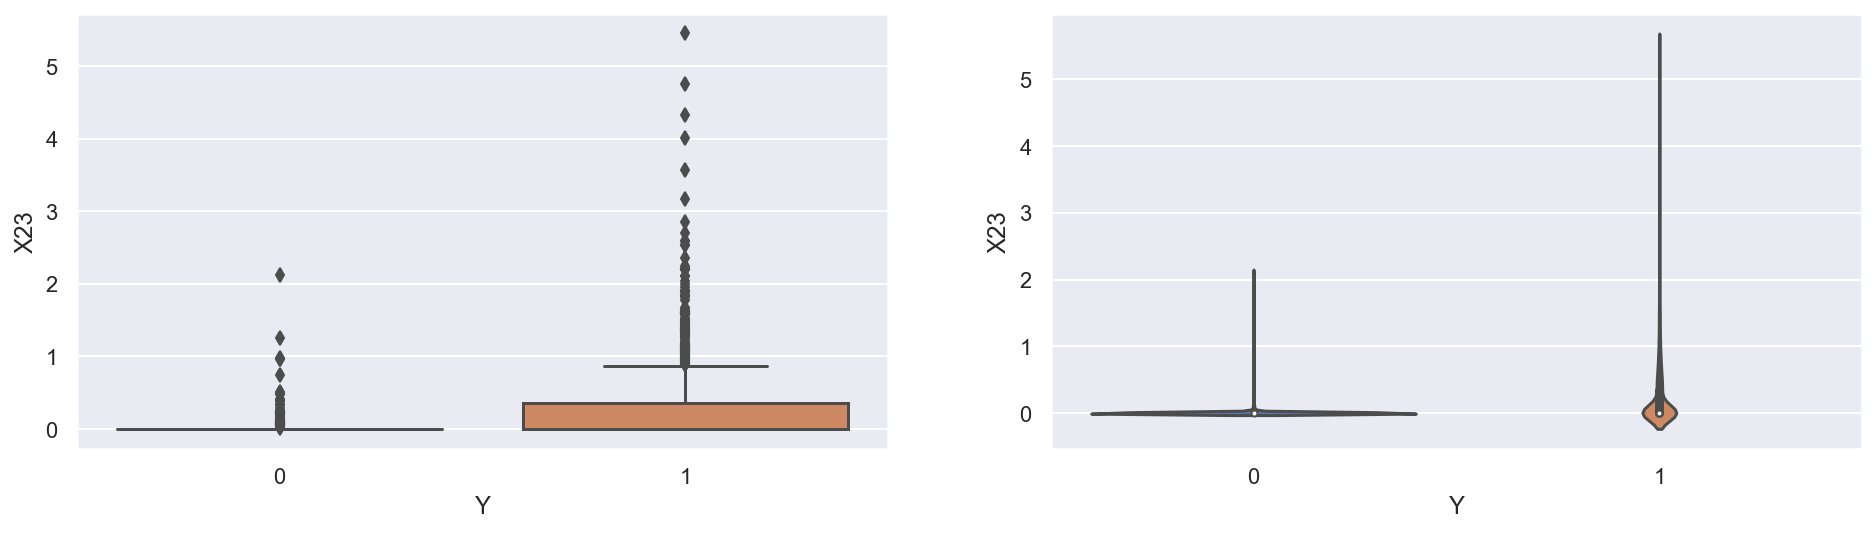

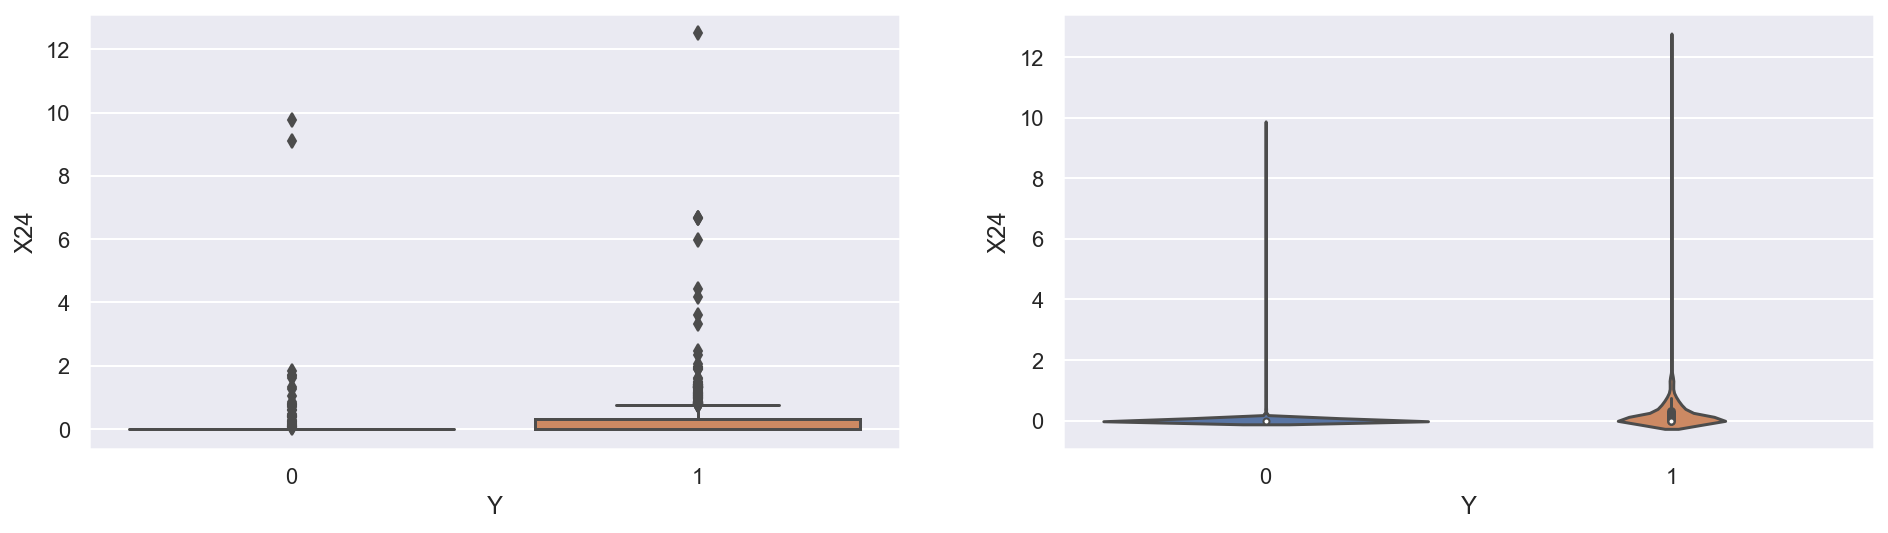

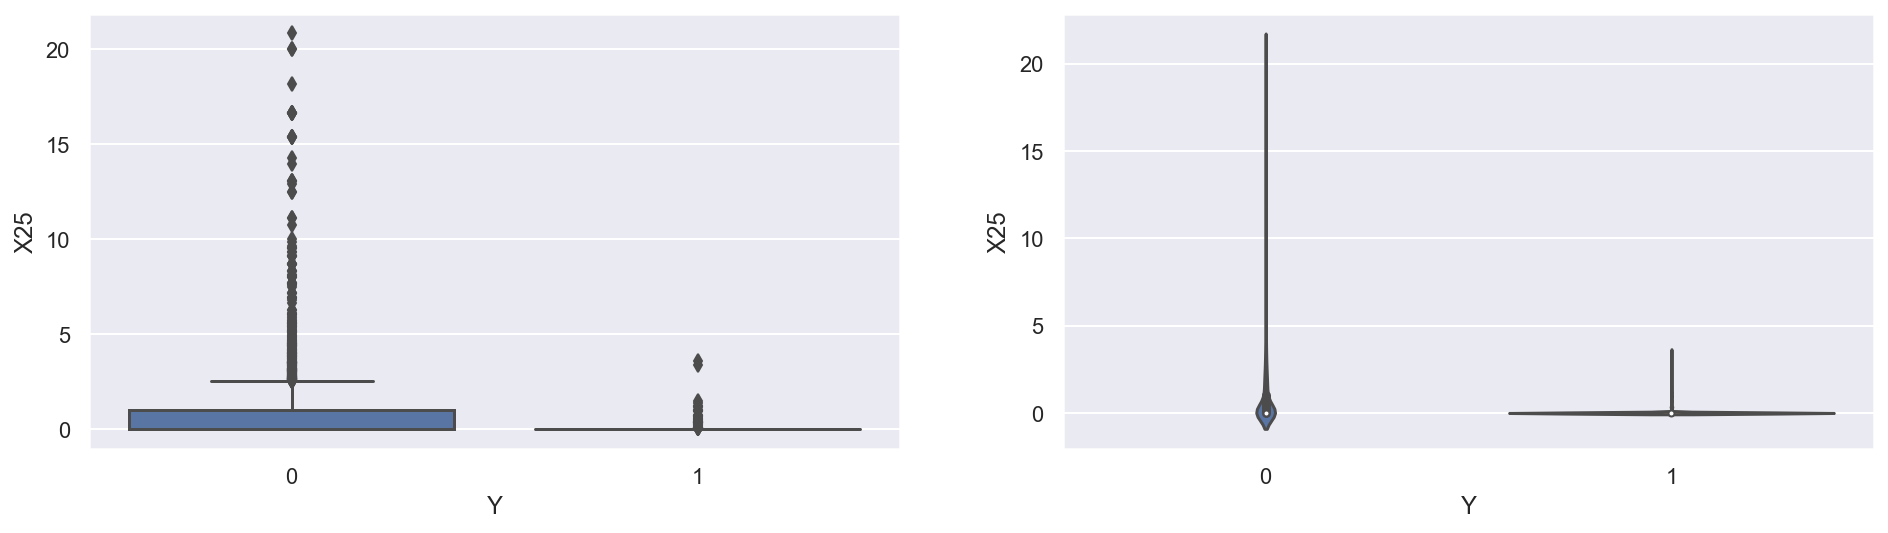

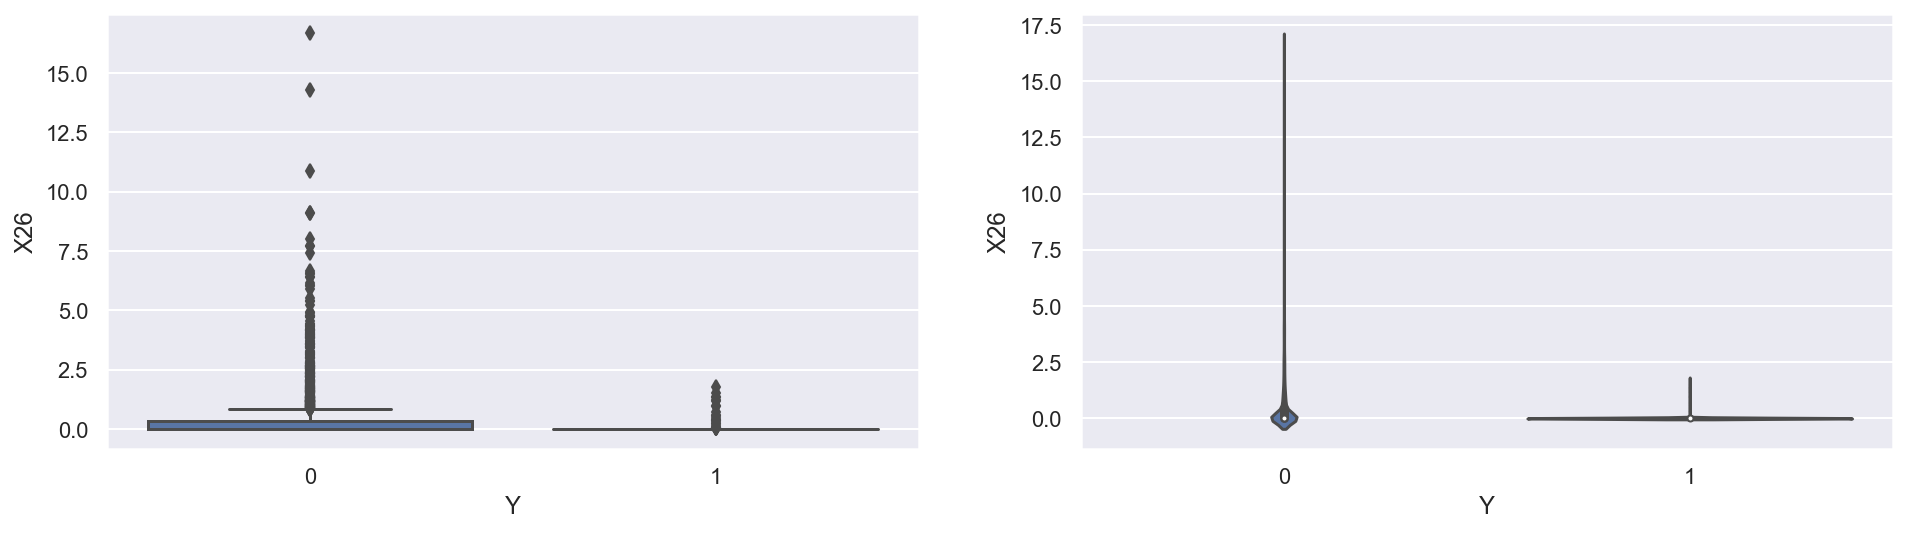

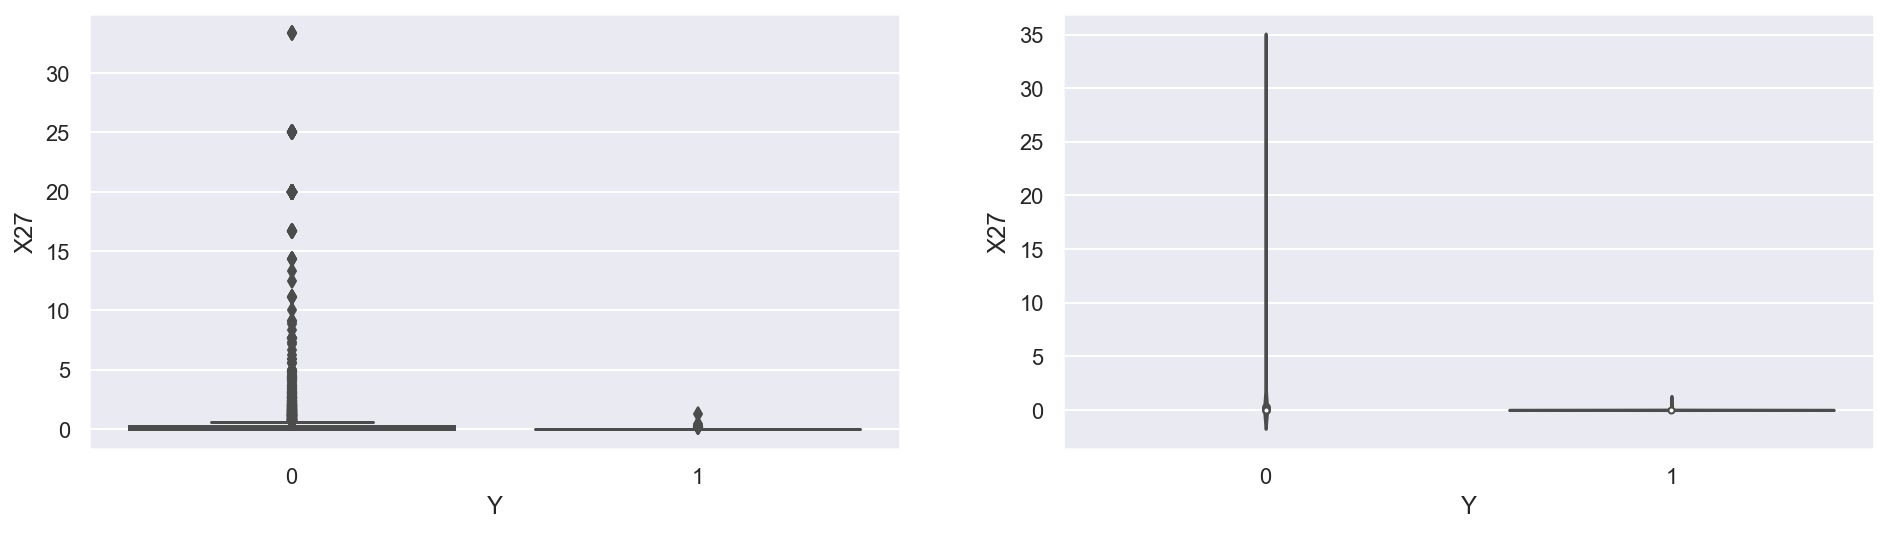

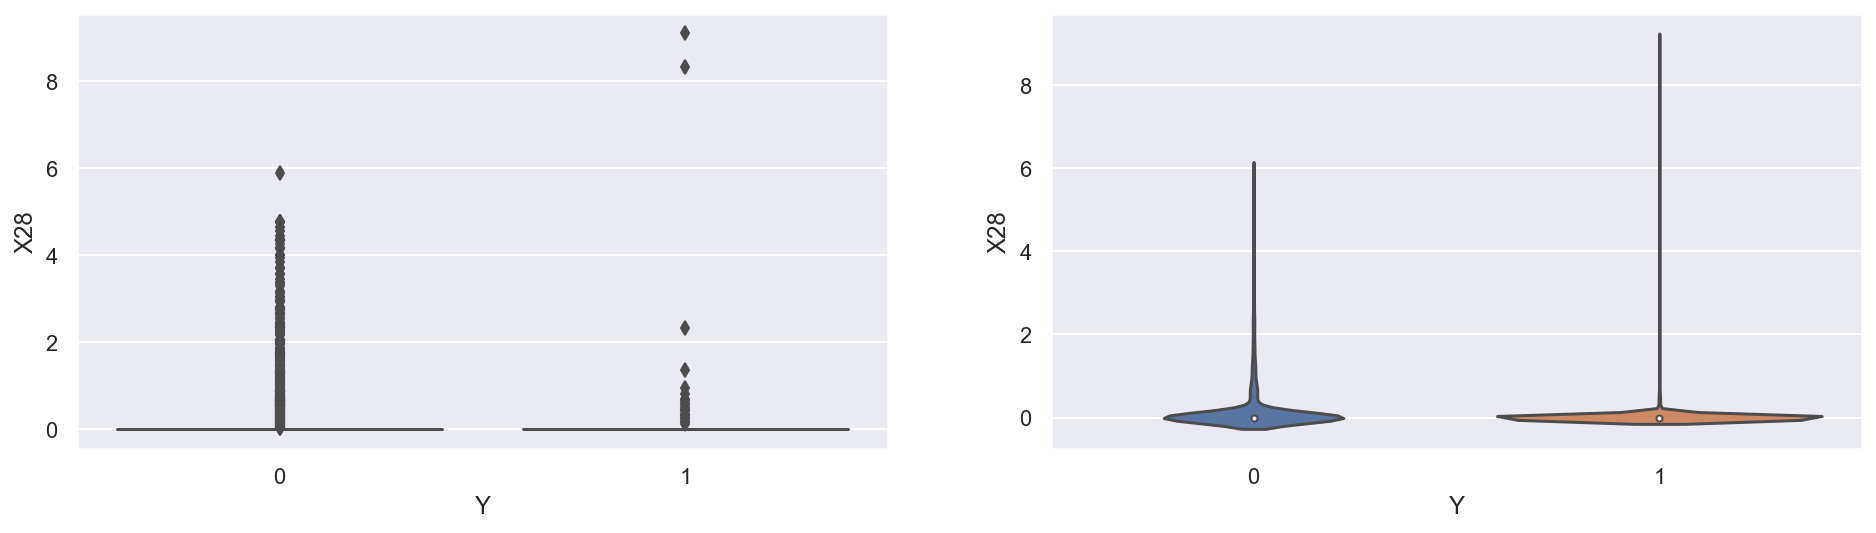

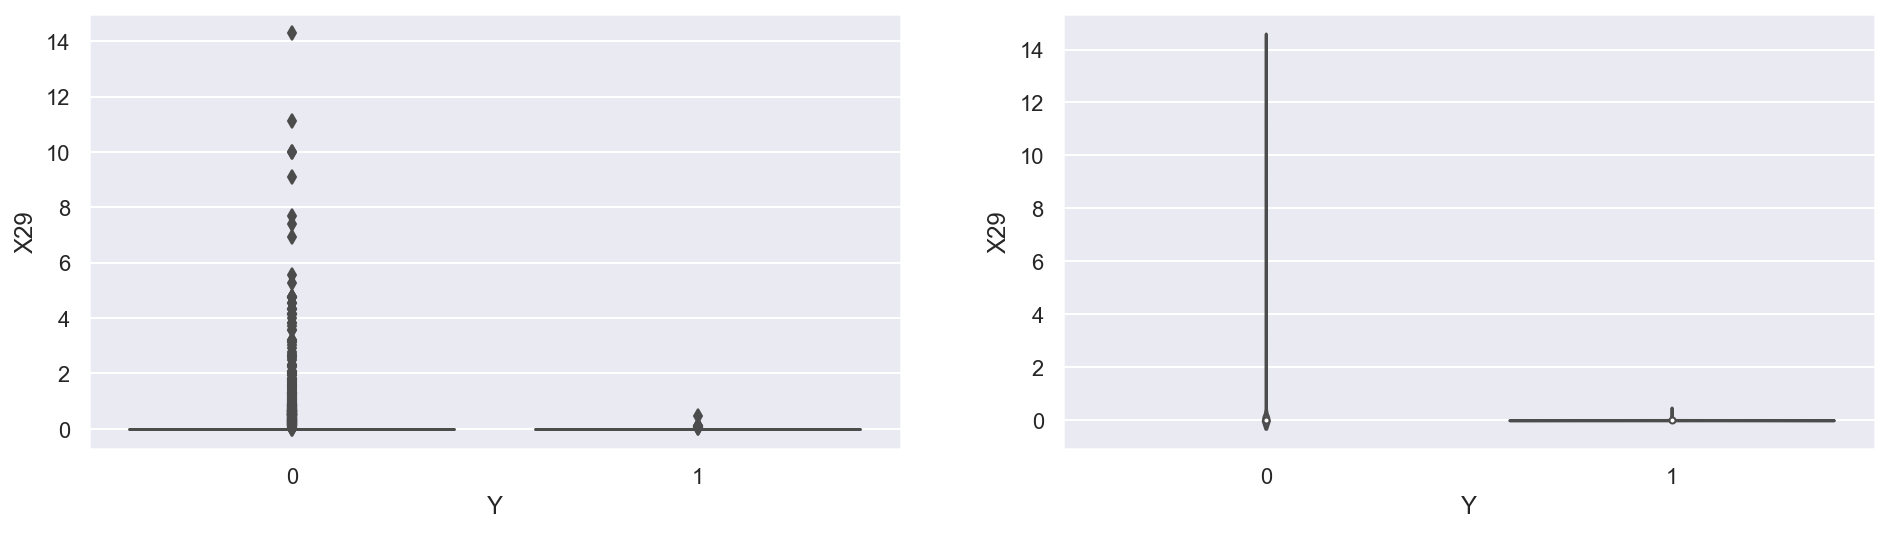

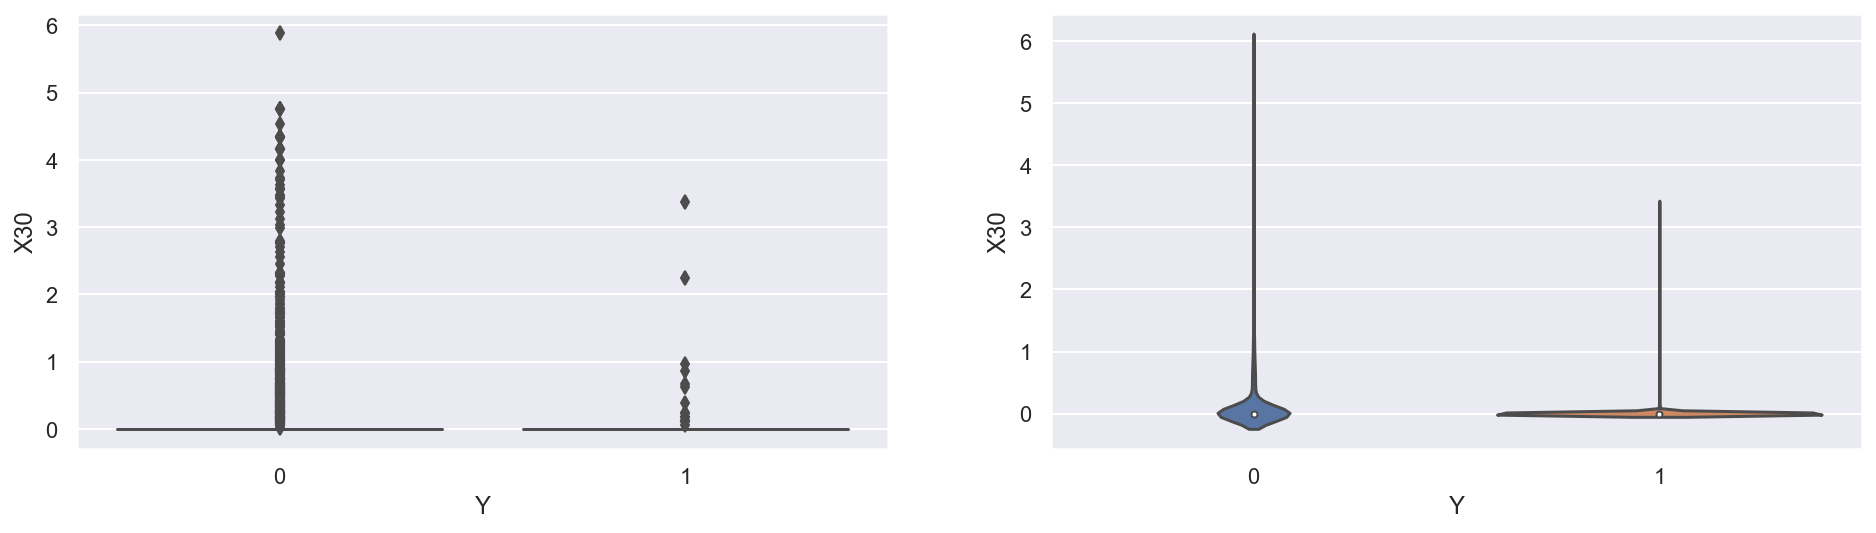

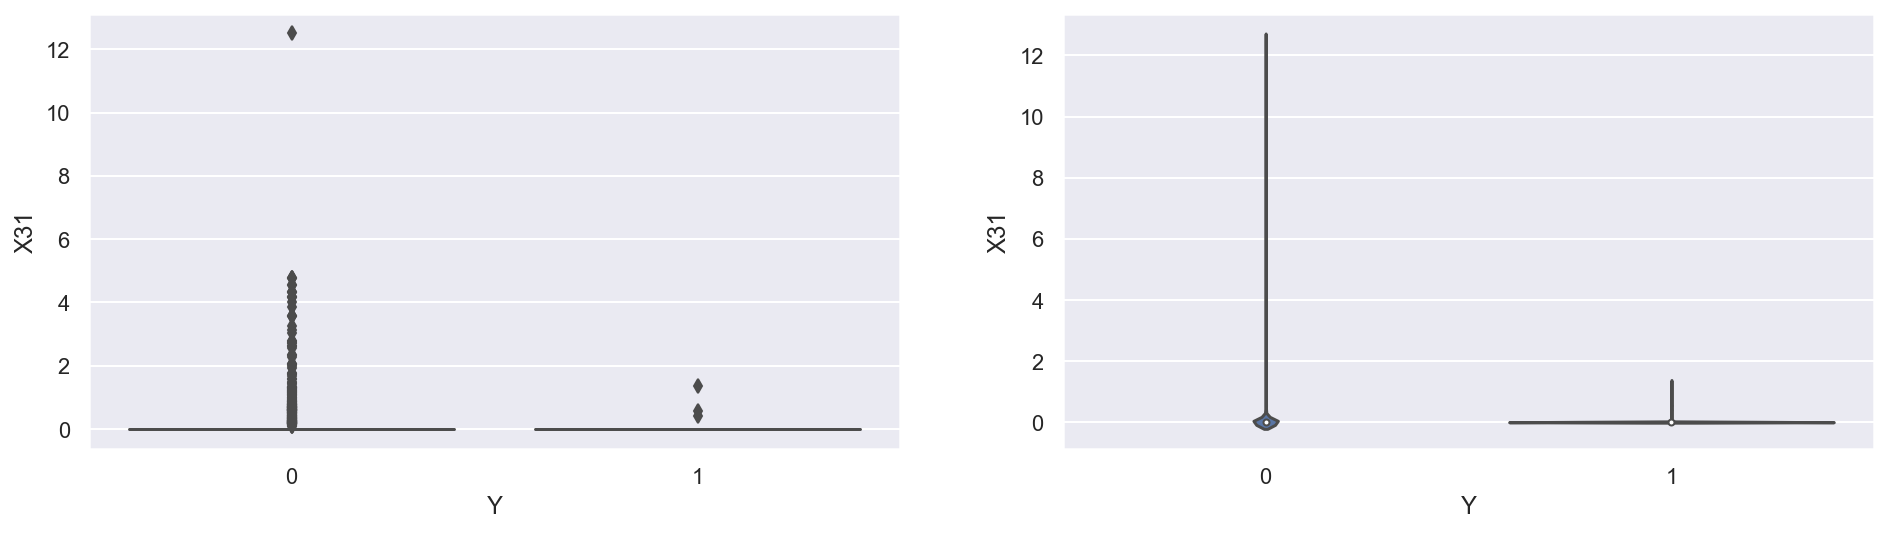

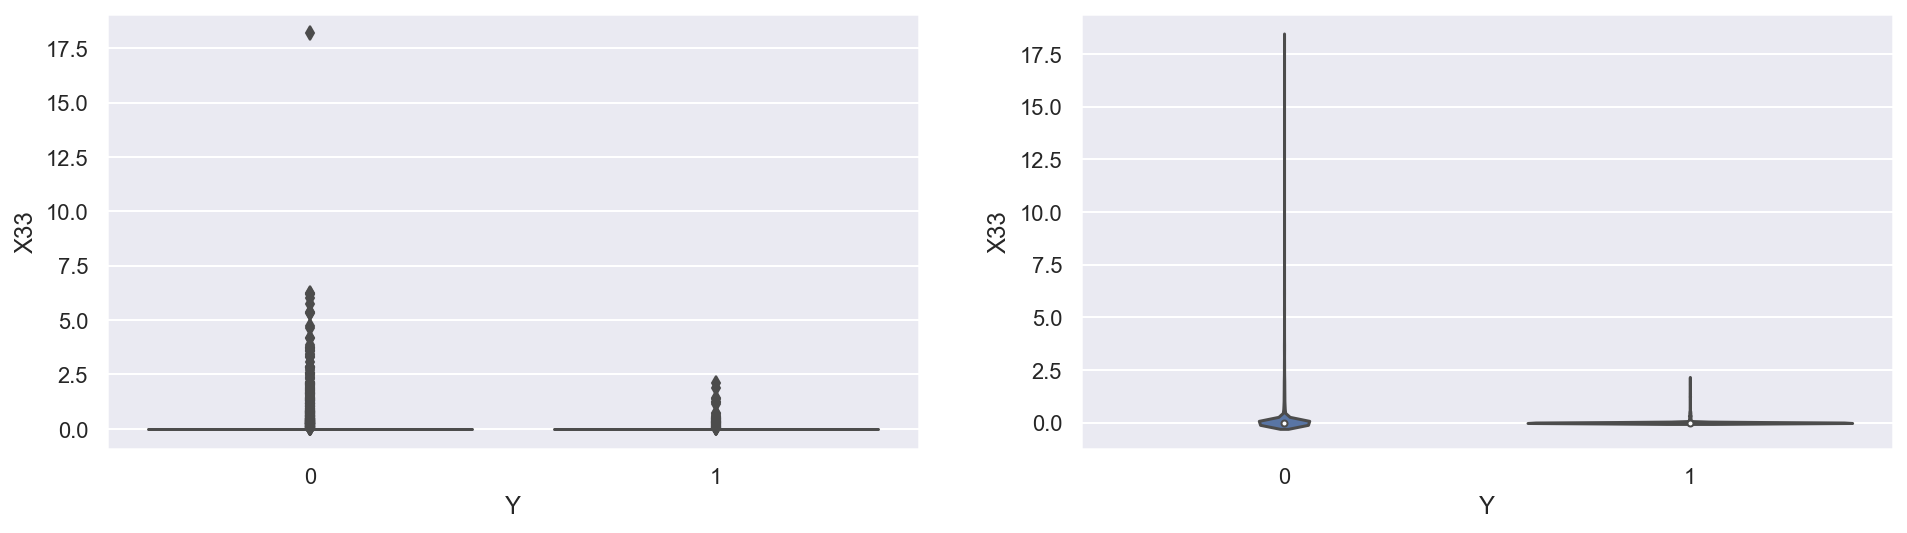

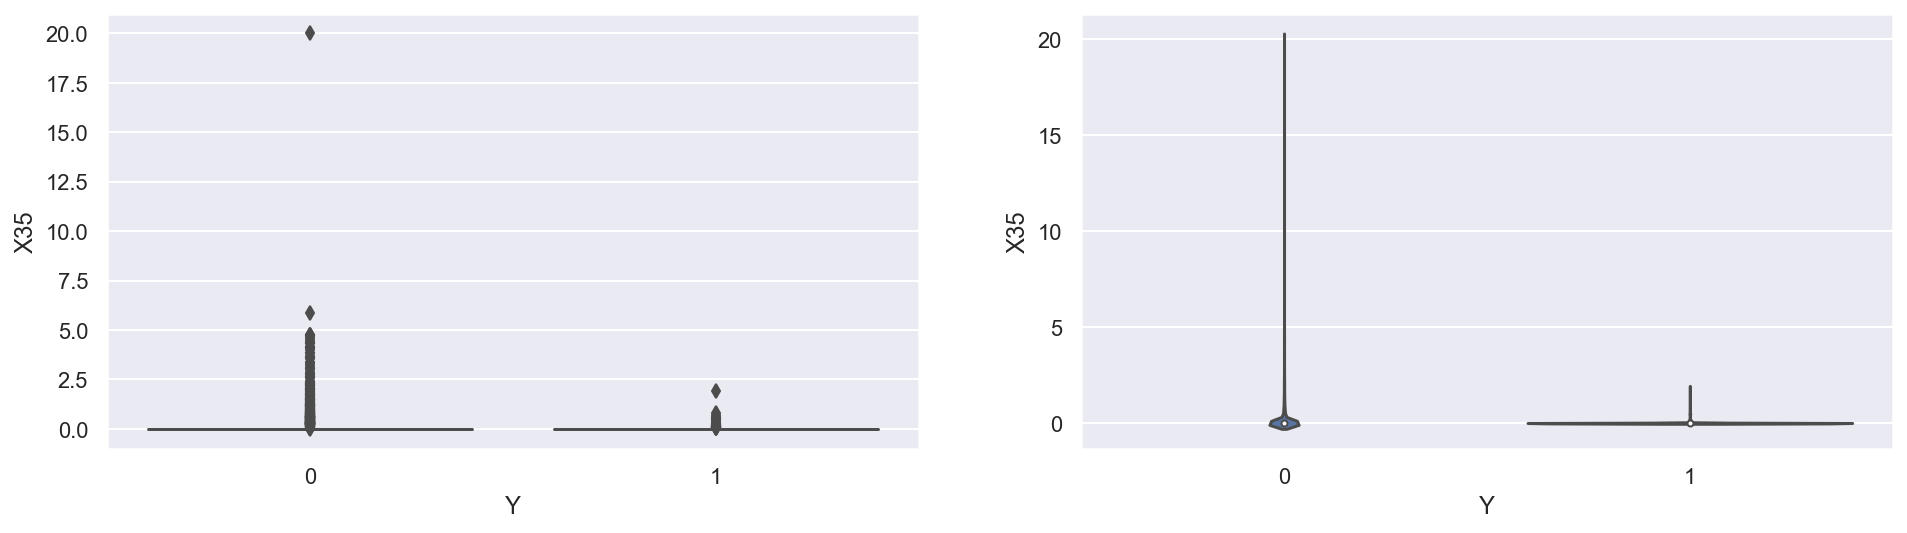

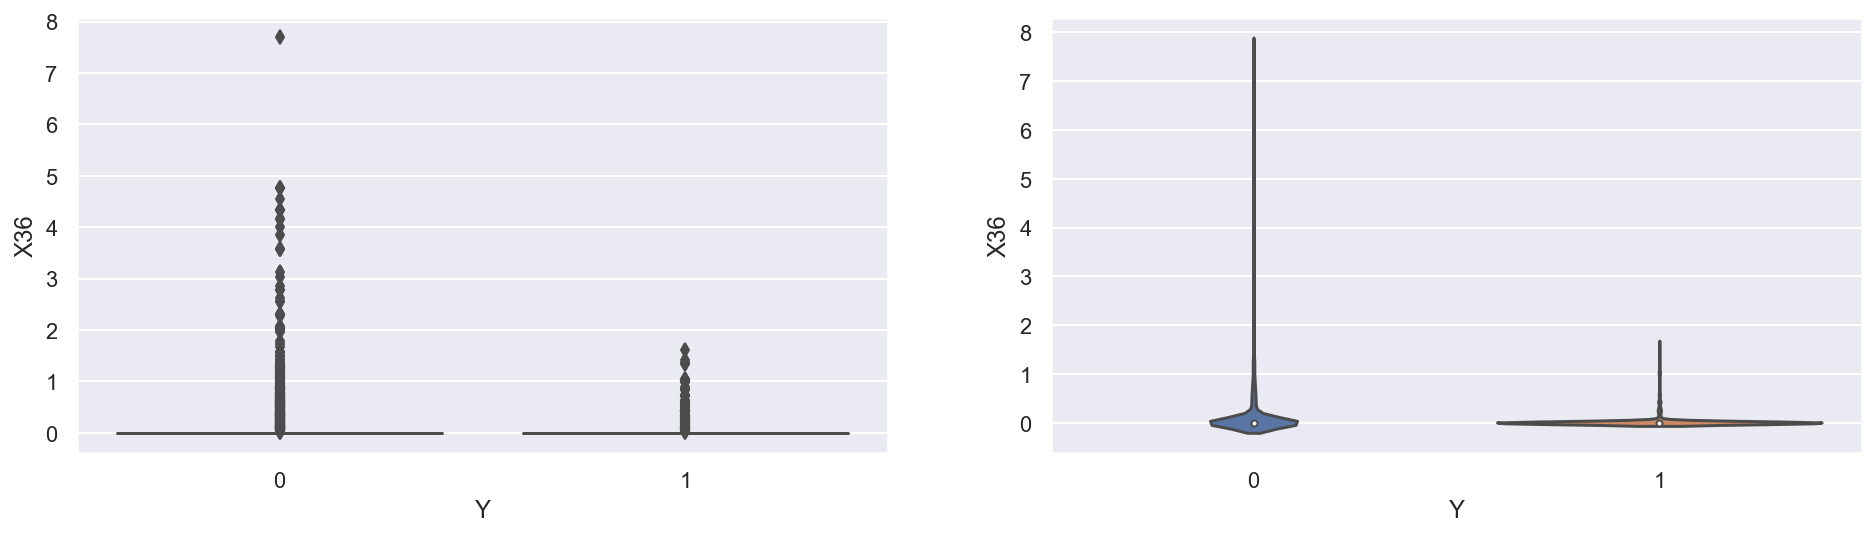

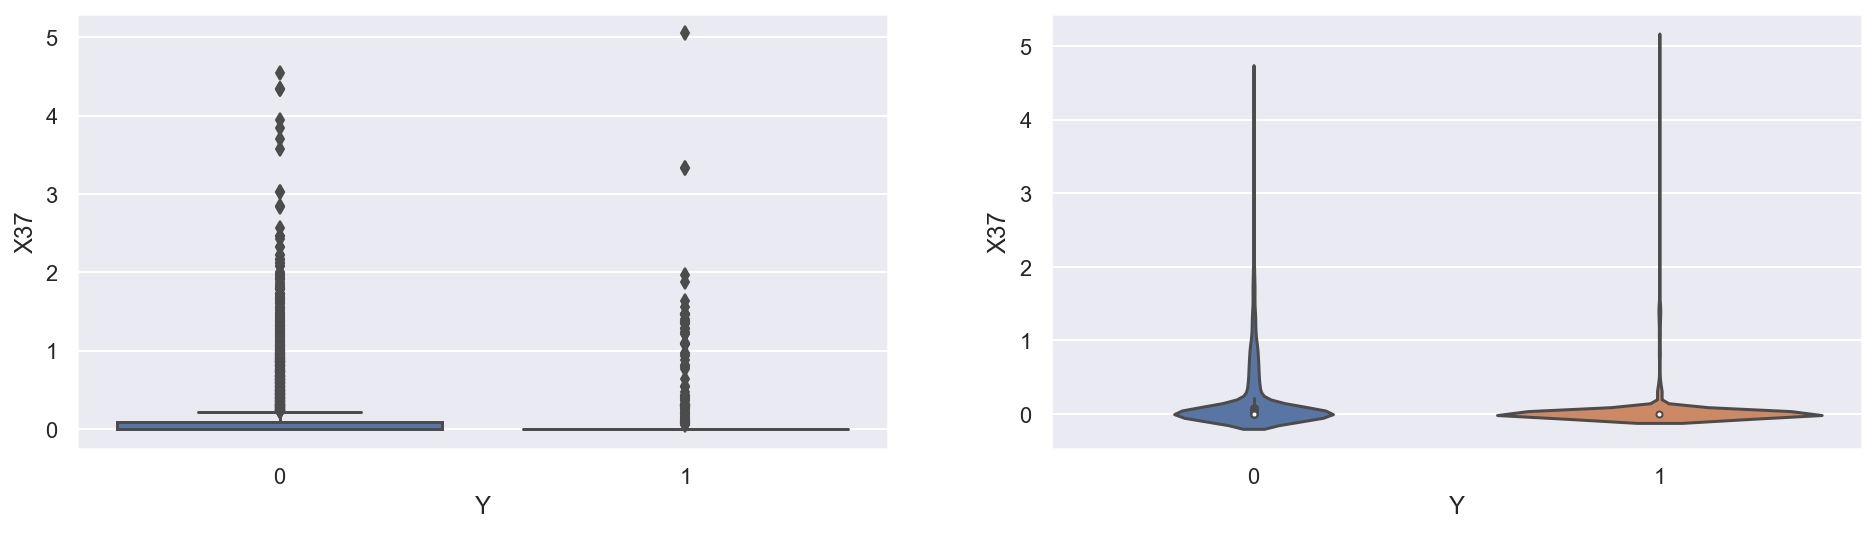

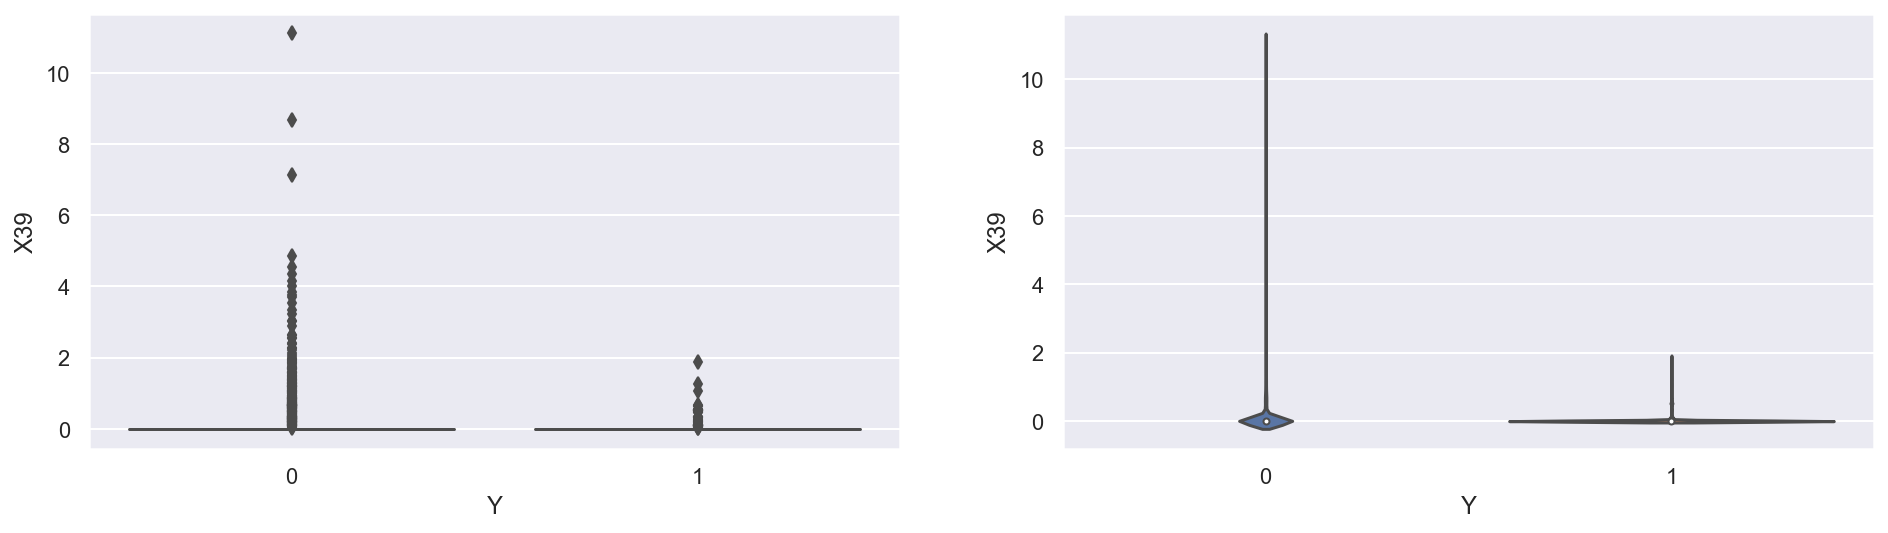

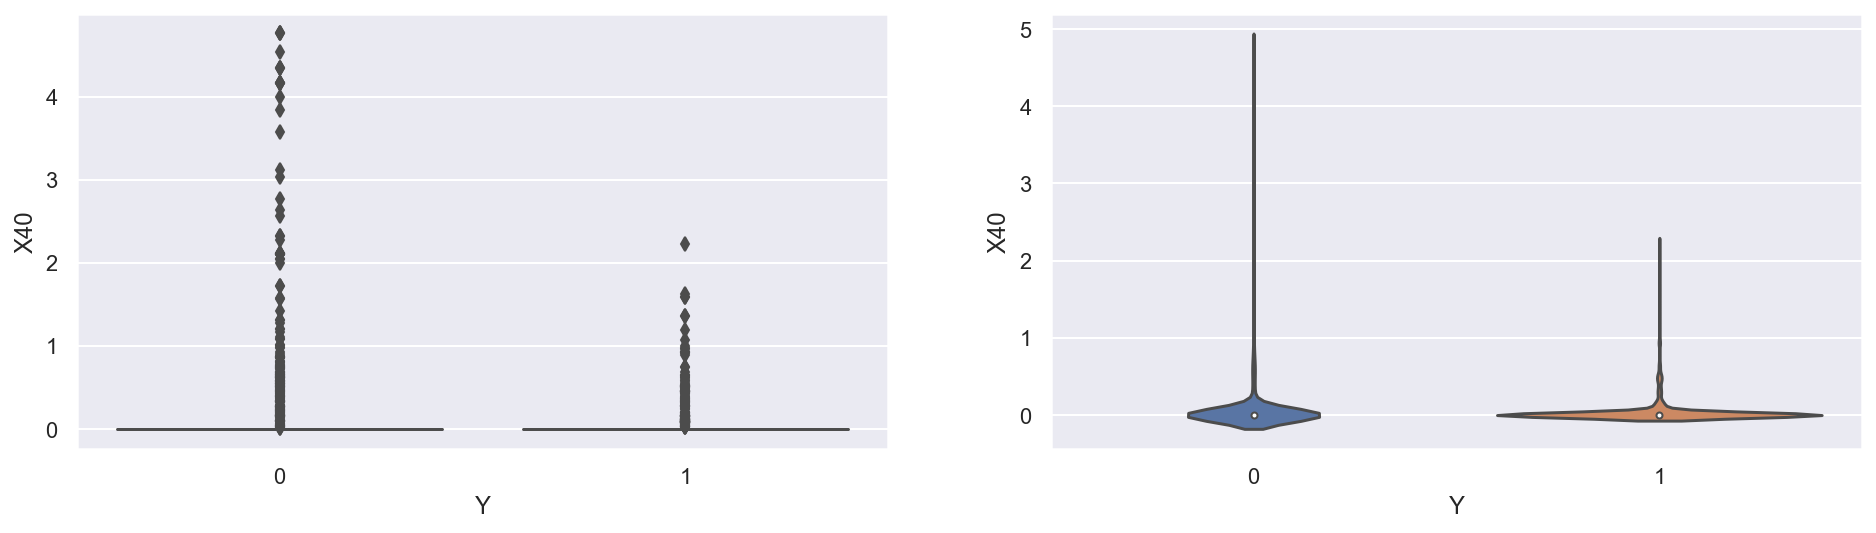

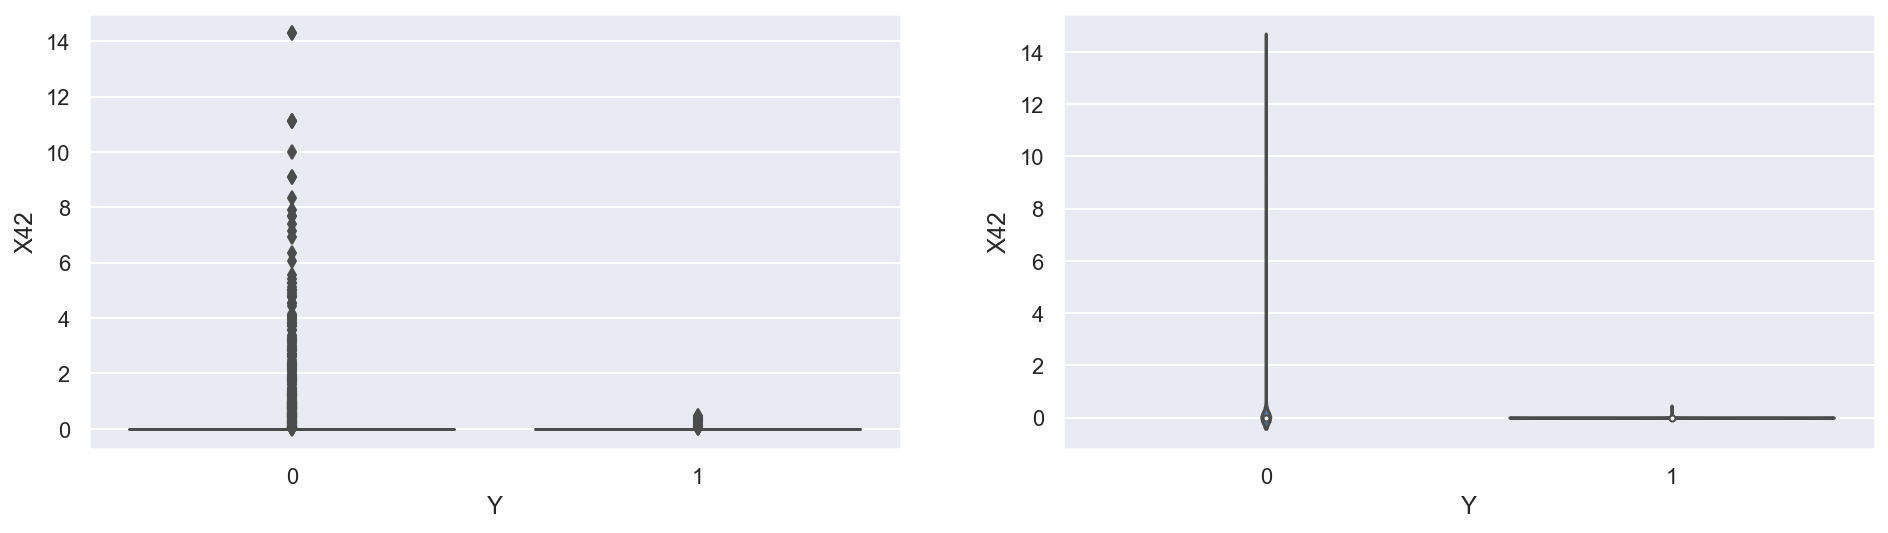

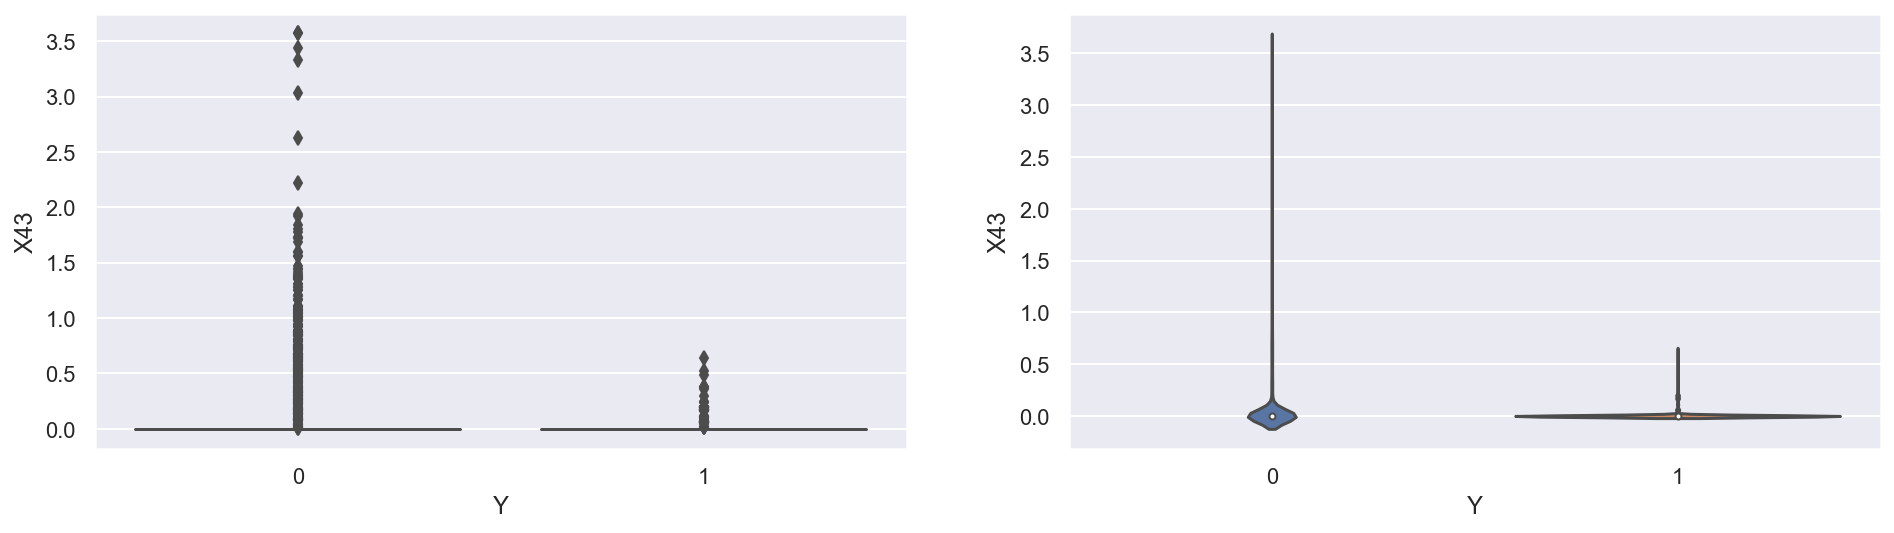

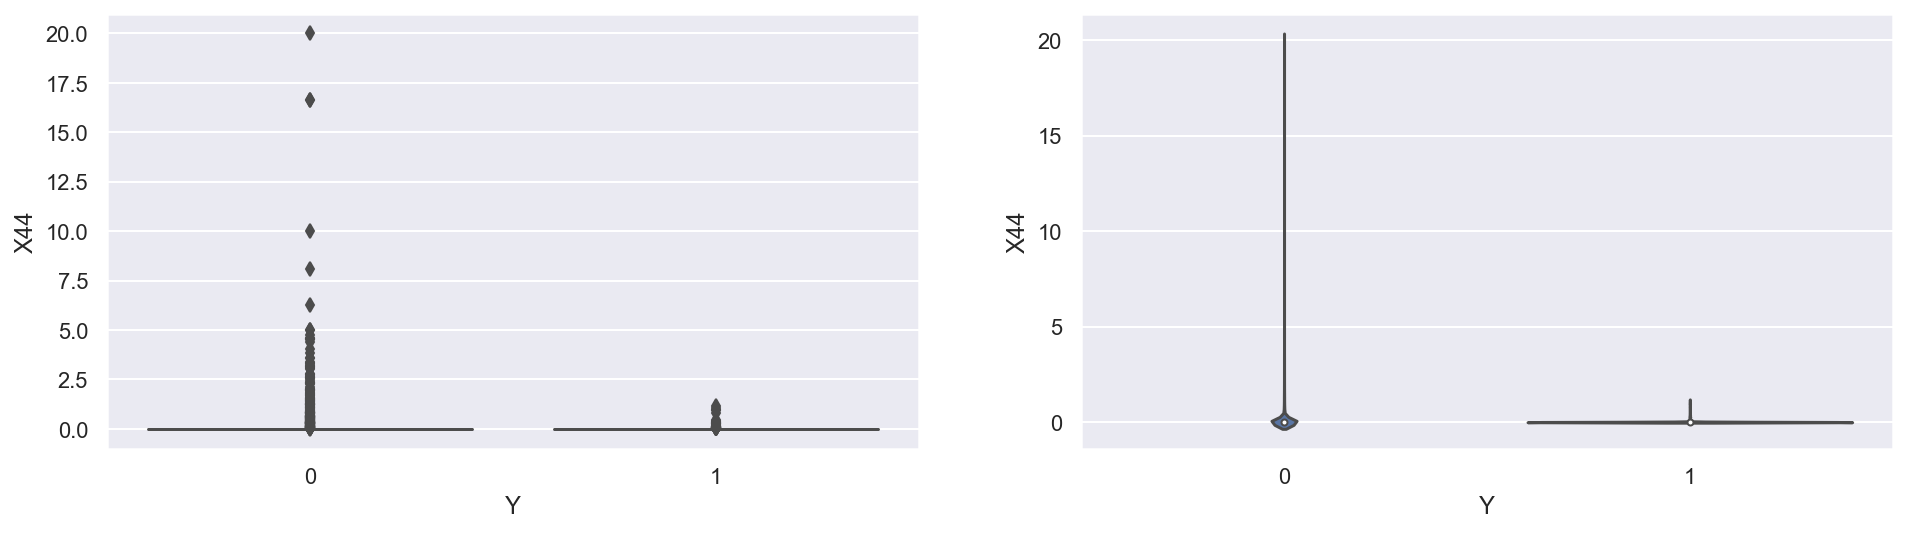

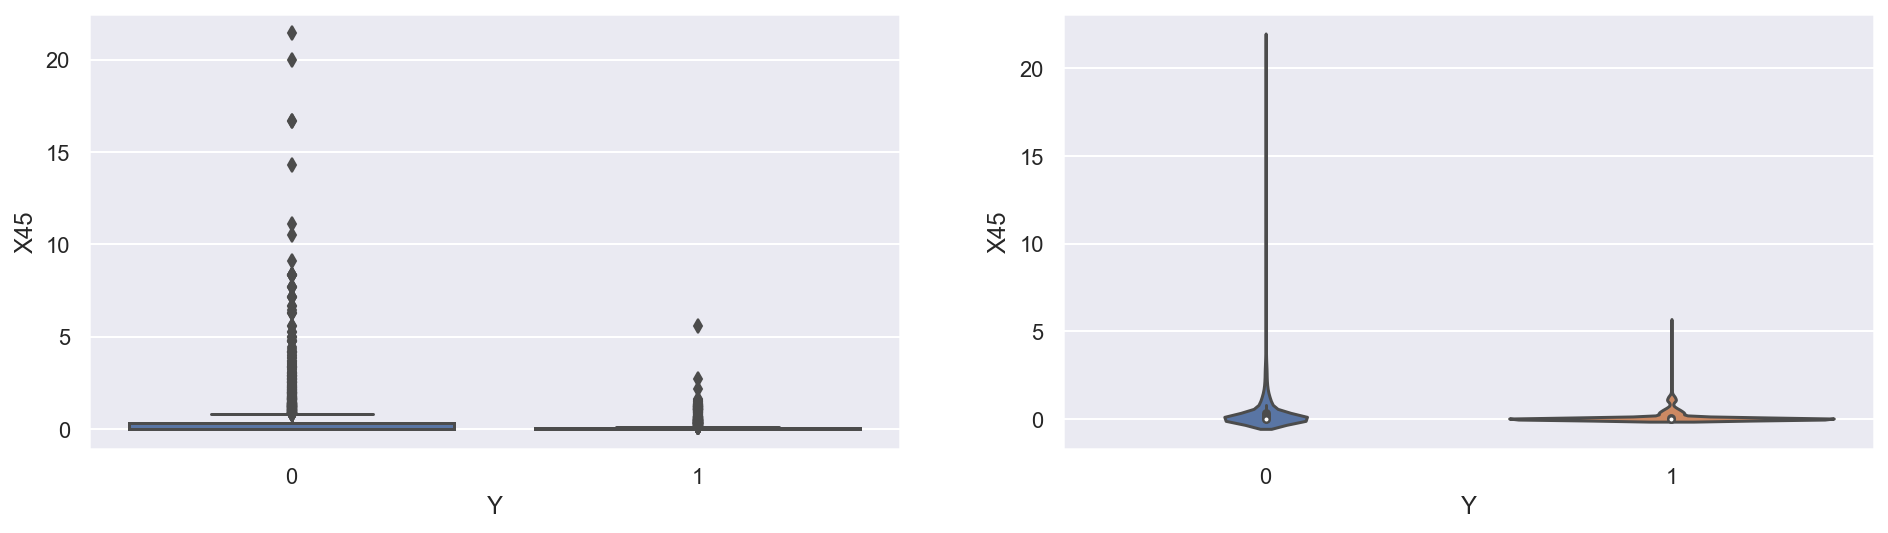

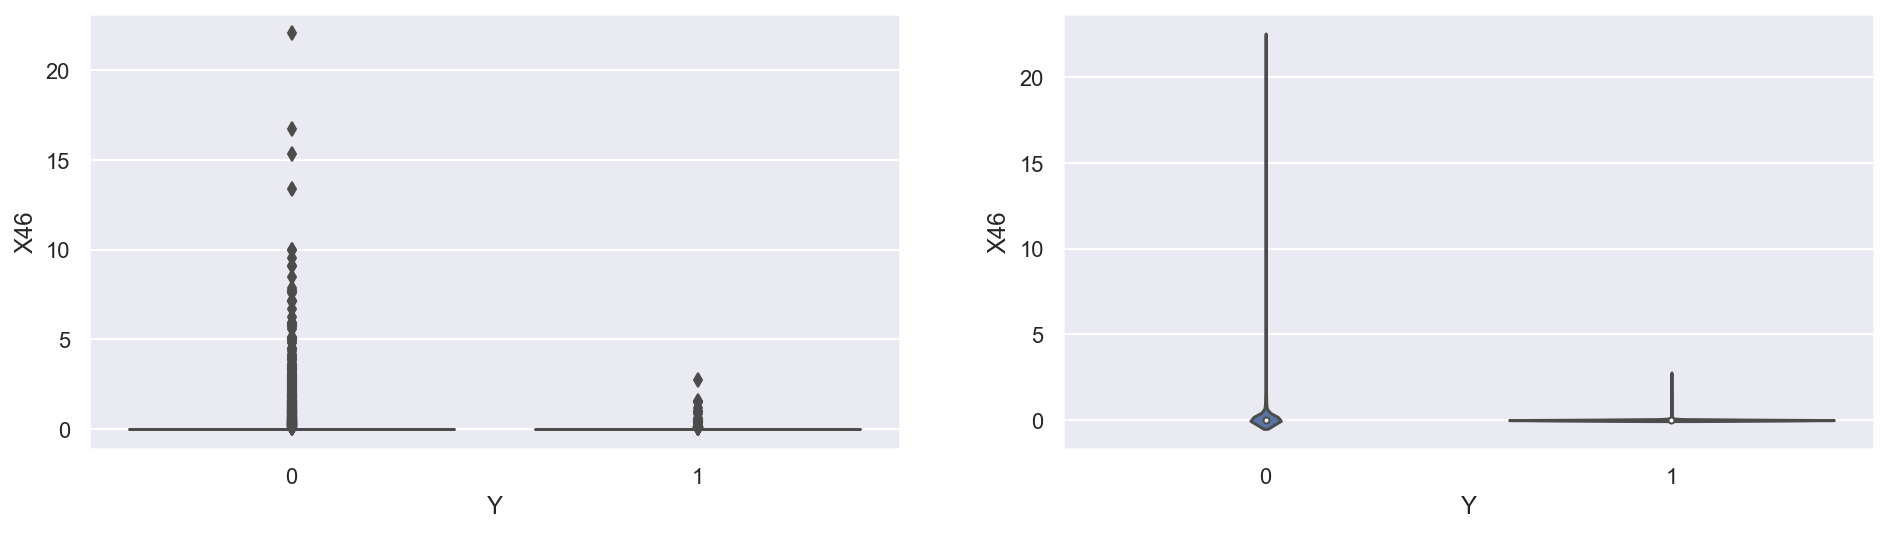

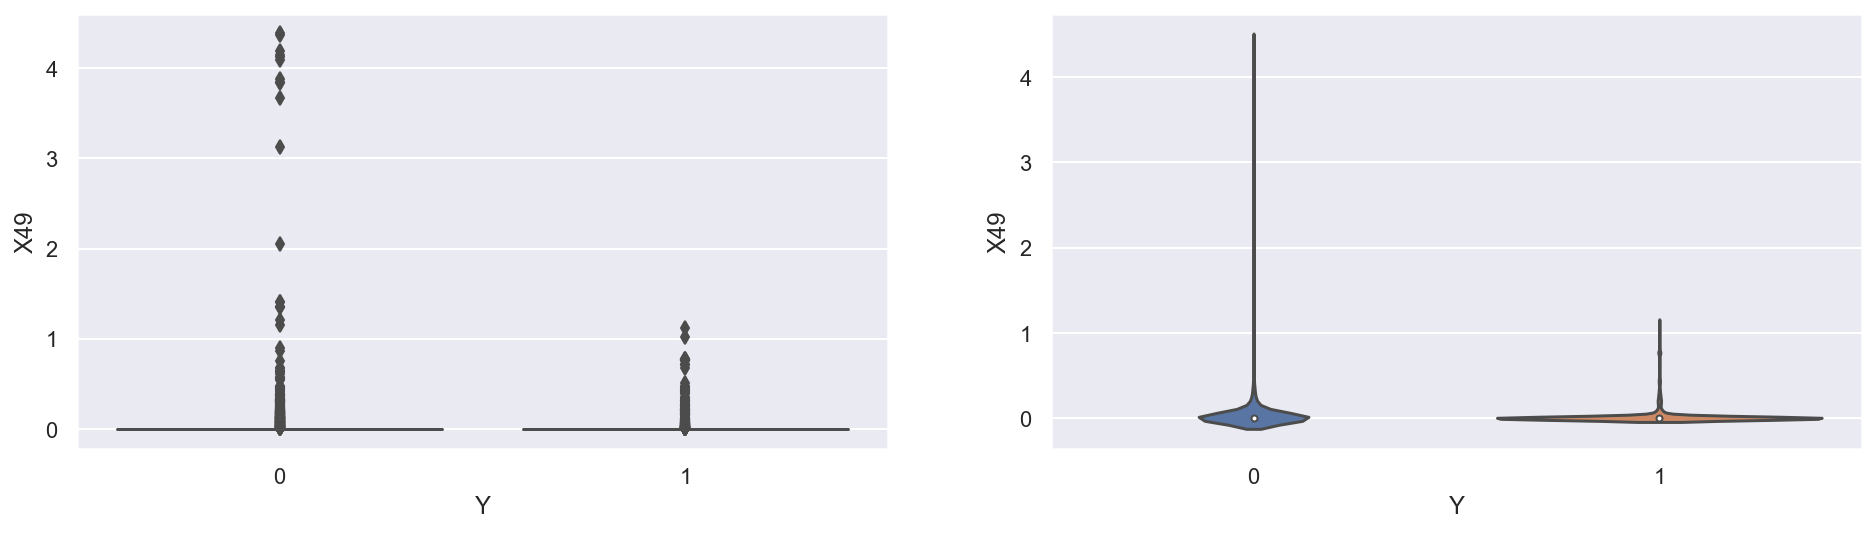

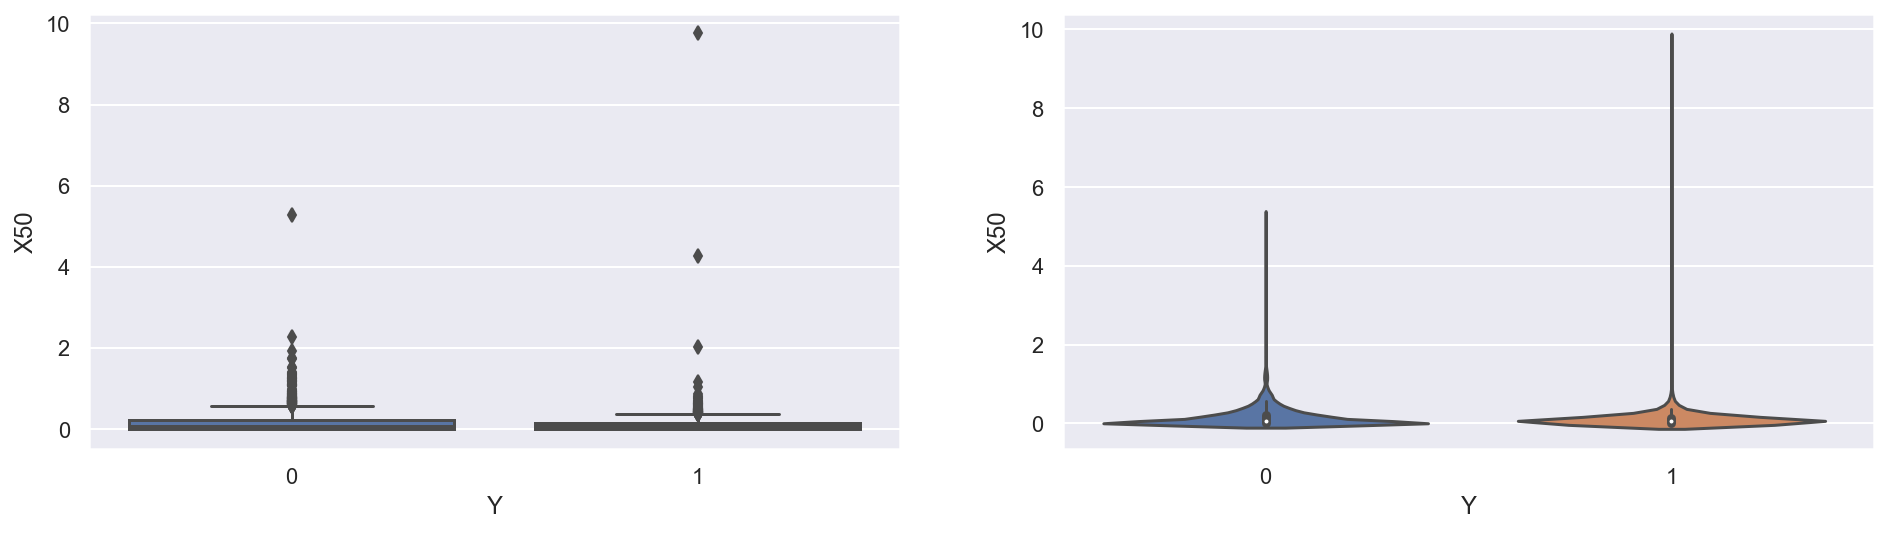

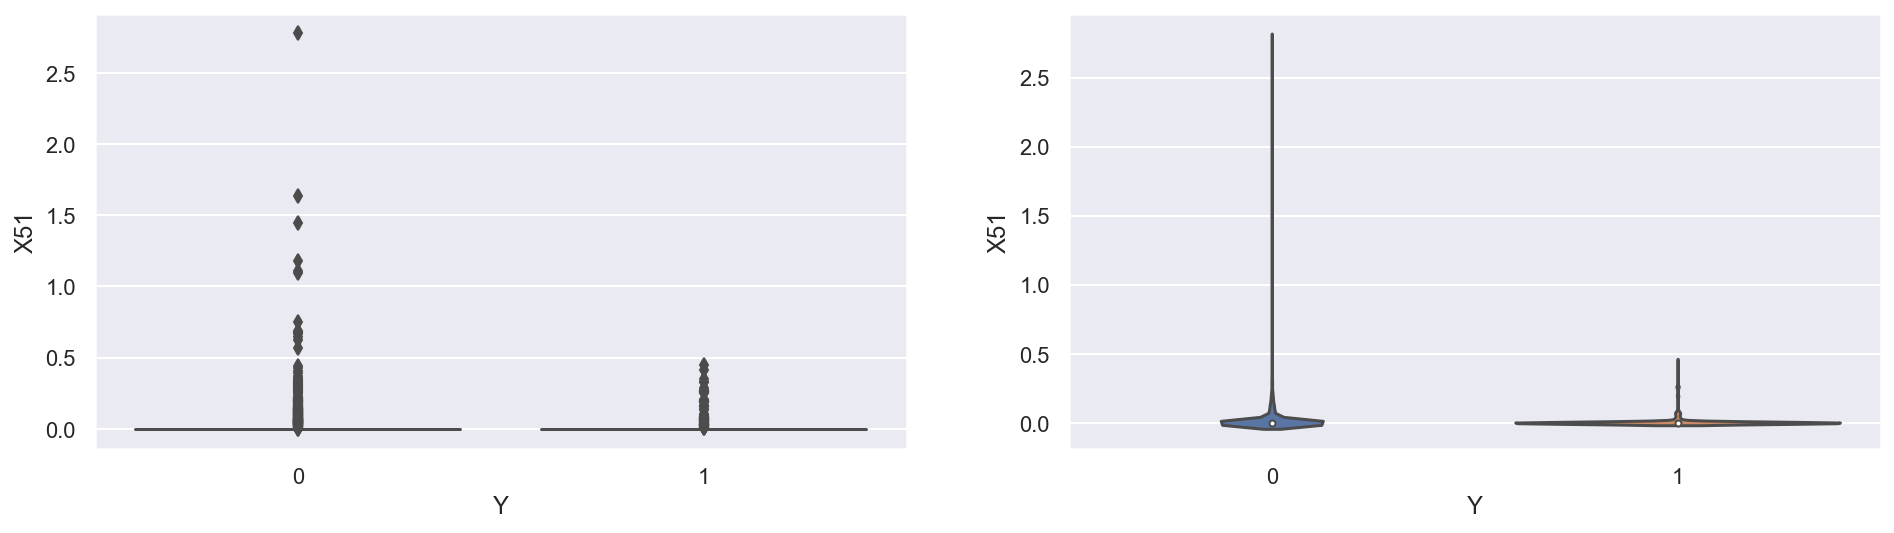

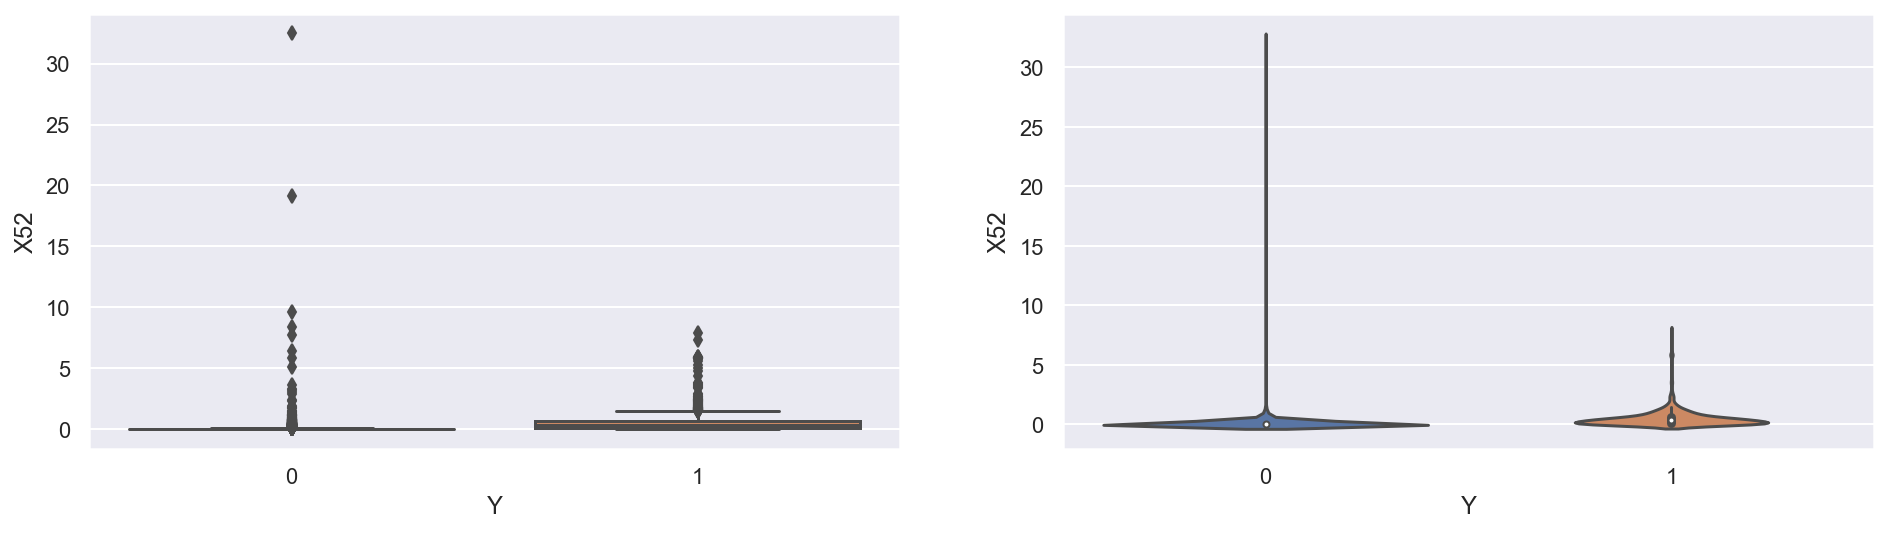

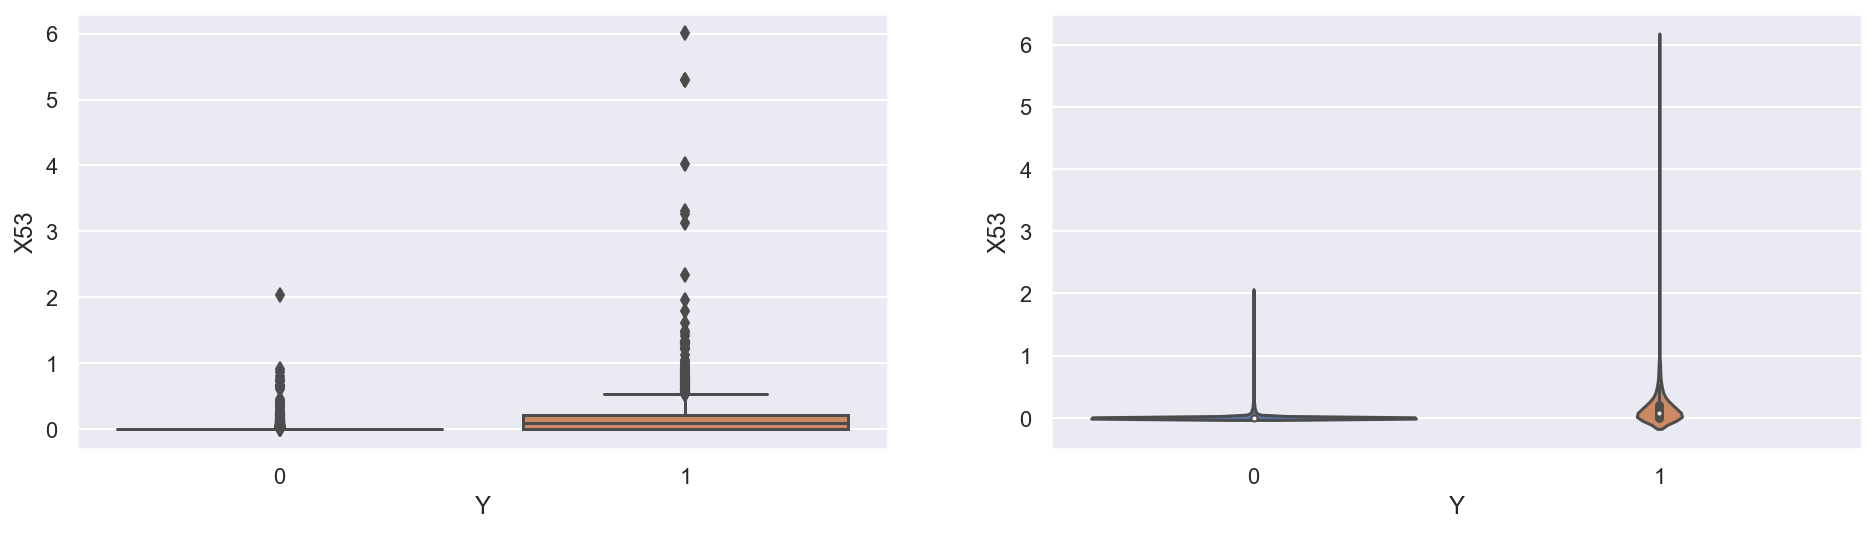

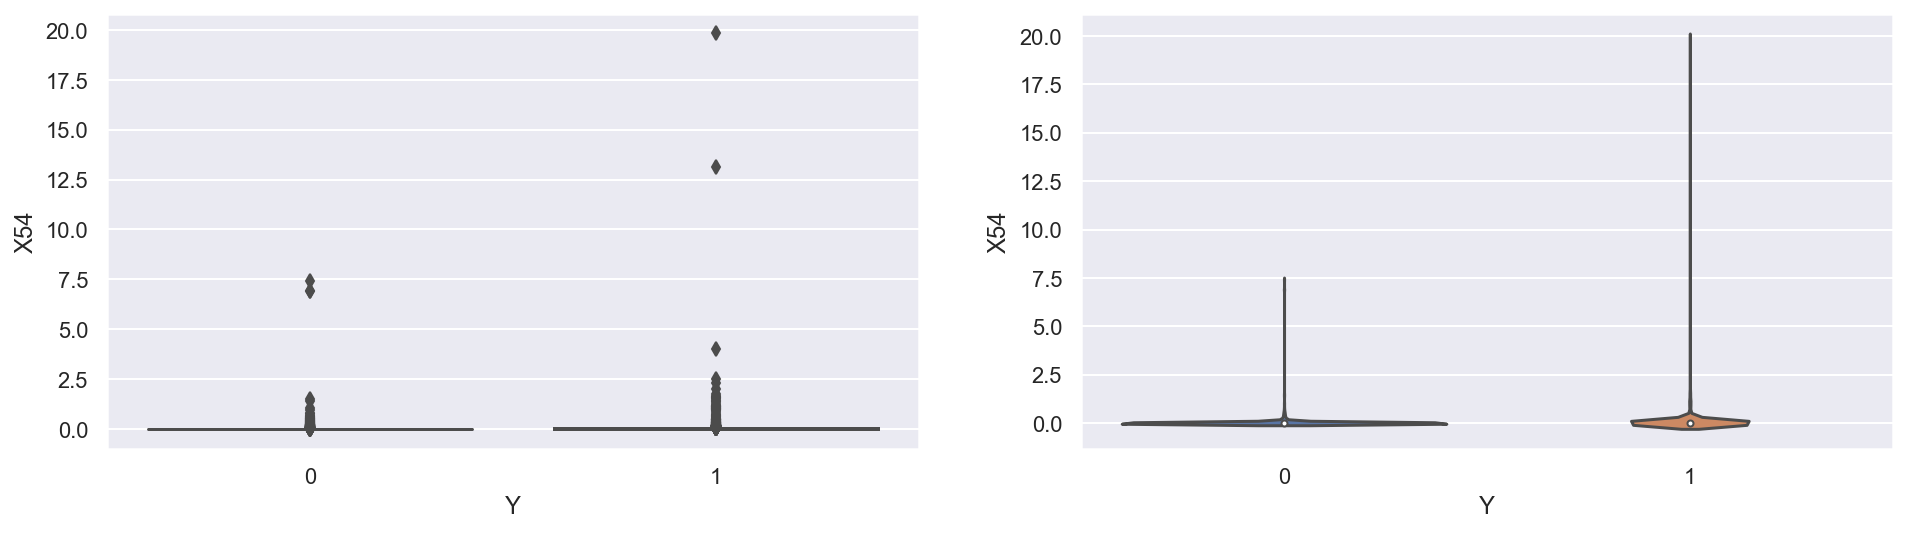

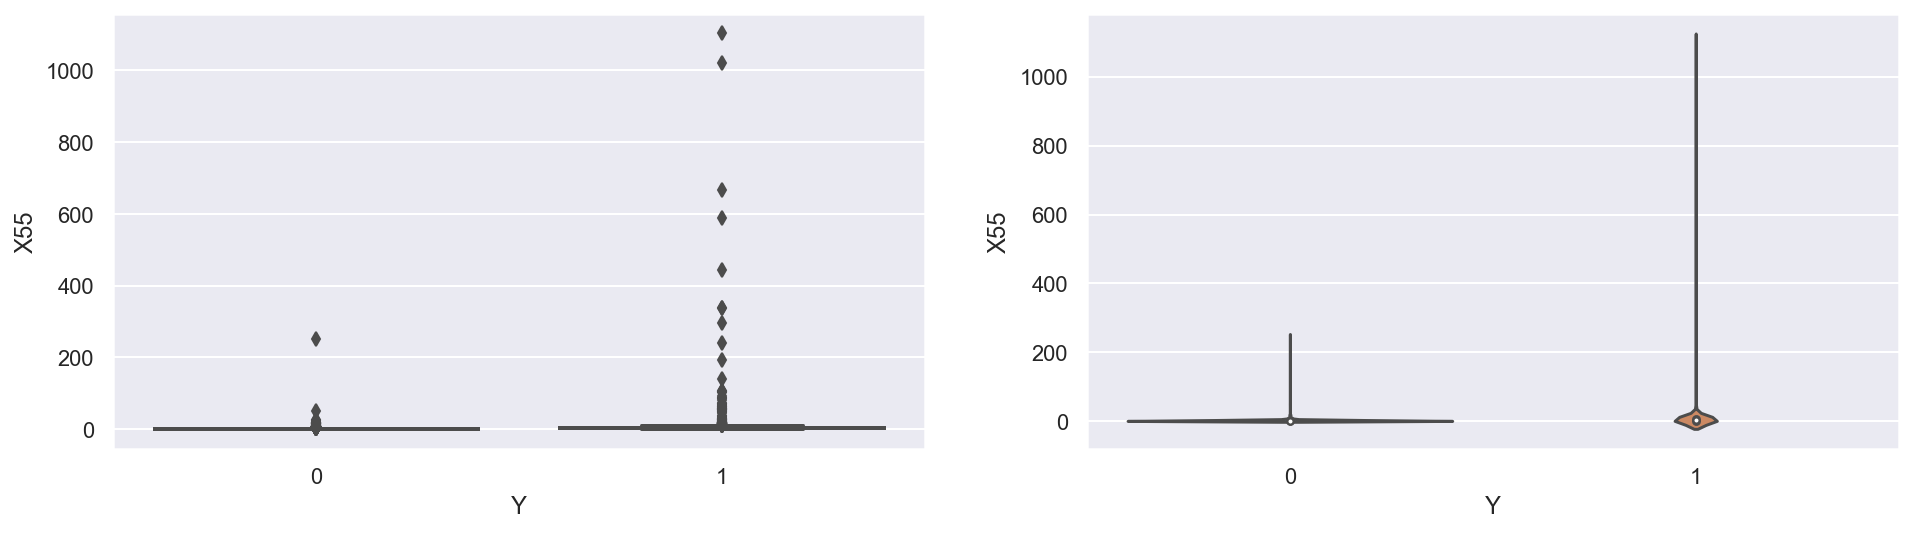

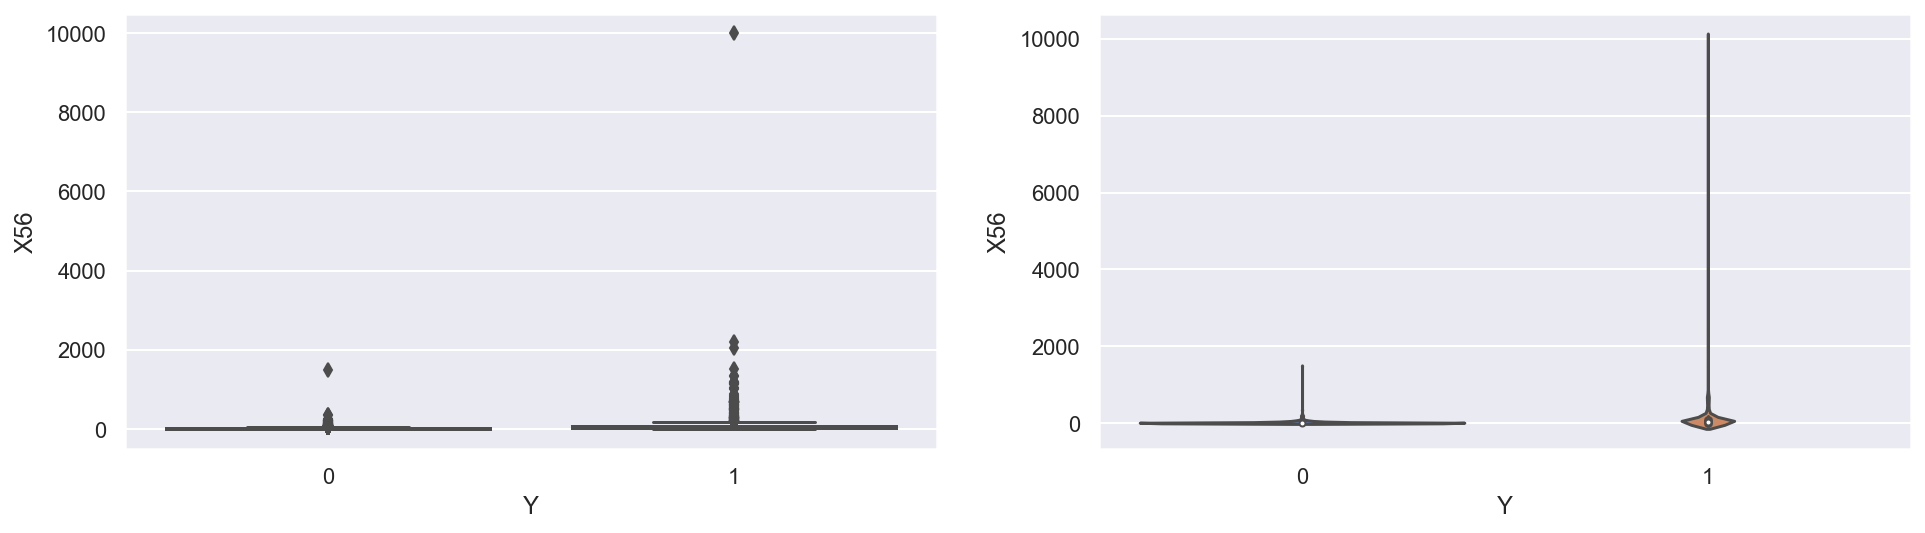

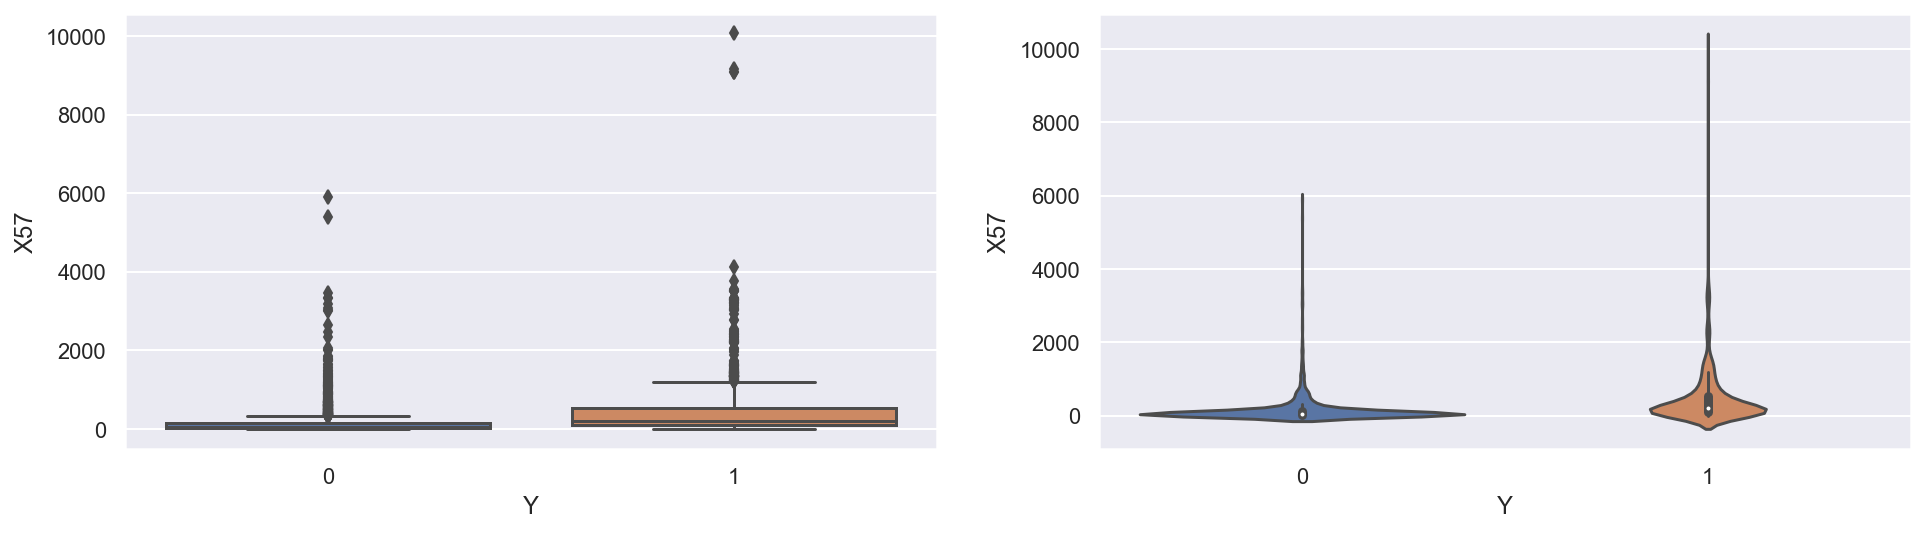

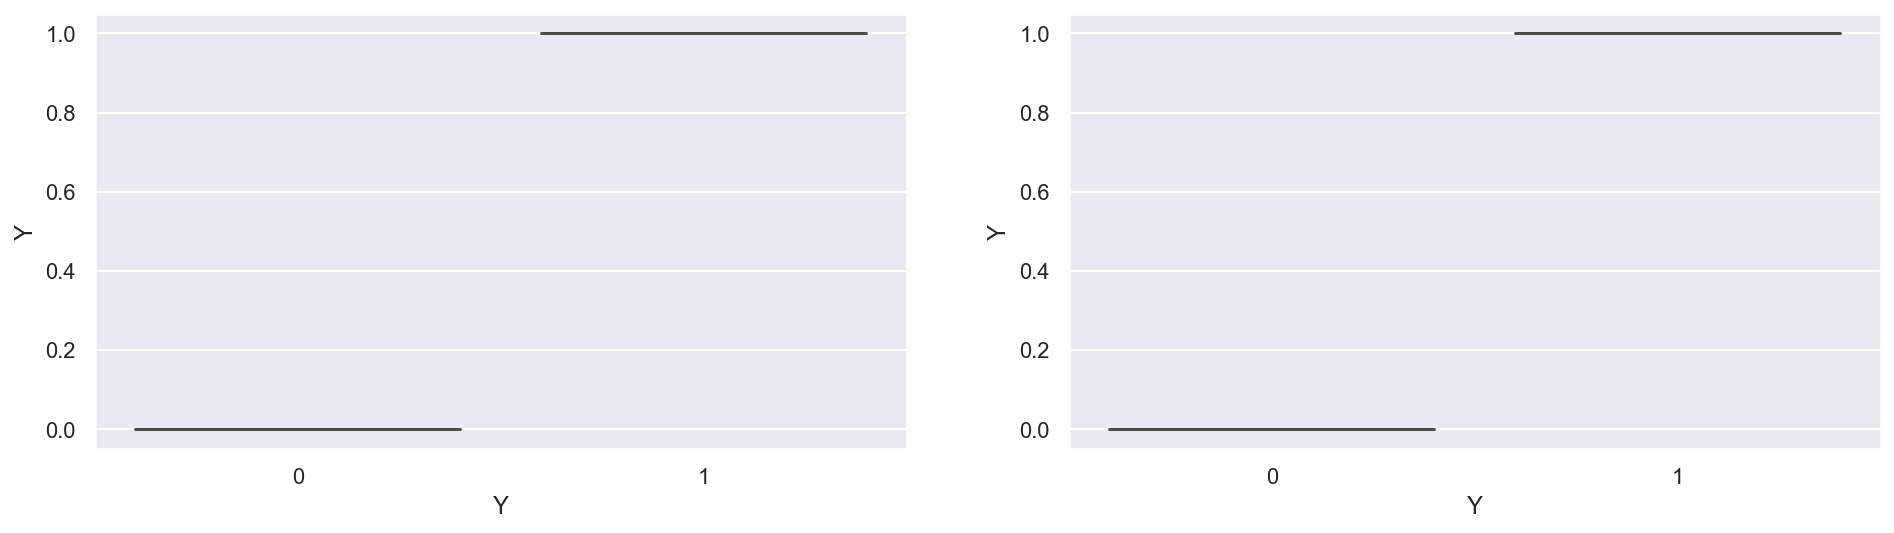

In [56]:
for col in train.keys():
    plt.figure(figsize=(16,4))
    plt.subplot(121)
    sns.boxplot(x="Y", y=col, data=df)
    plt.subplot(122)
    sns.violinplot(x="Y", y=col, data=df)
    plt.show()

**Observations:**
1. The target variable has almost balanced distribution.
2. Based on the segmented univariate analysis,following can be strong predictor of Y:
    - X1, X3, X5, X6, X7, X9, X11, X17, X18, X19, X21, X23, X53
3. Based on the segmented univariate analysis,following can be mild predictor of Y:
    - X2, X8, X10, X12, X13, X16, X24, X25, X26, X37, X45, X52, X57